# 폰트 설치

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Mac: 시스템 기본 한글 폰트로 설정 (예: AppleGothic)
mpl.rc('font', family='AppleGothic')

In [ ]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정
mpl.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 수질 데이터 불러오기
df = pd.read_excel('지하수기초조사_수질DB.xlsx', sheet_name=1)
df.head()

,구분,연도,시도,시군구,읍면동,리,번지,MW_NAME,SW_NAME,수문지질,...,갈륨,저마늄,몰리브덴,세슘,라듐,토륨,톨륨,총대장균군,1_4_다이옥산,크롬
0,대구지역,2004,대구광역시,북구,국우동,-,661,금호강,팔거천,쇄설성 퇴적암,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,대구지역,2004,대구광역시,북구,국우동,-,382,금호강,팔거천,쇄설성 퇴적암,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,대구지역,2004,대구광역시,북구,노곡동,-,367,금호강,금호강하류,비다공질 화산암,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,대구지역,2004,대구광역시,북구,도남동,-,720-2,금호강,팔거천,쇄설성 퇴적암,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,대구지역,2004,대구광역시,북구,도남동,-,361,금호강,팔거천,쇄설성 퇴적암,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['연도'] = pd.to_numeric(df['연도'], errors='coerce')
df_filtered = df[(df['연도'] >= 2018) & (df['연도'] <= 2024)]

In [ ]:
df_filtered.head()

,구분,연도,시도,시군구,읍면동,리,번지,MW_NAME,SW_NAME,수문지질,...,갈륨,저마늄,몰리브덴,세슘,라듐,토륨,톨륨,총대장균군,1_4_다이옥산,크롬
734,서울지역,2023.0,서울특별시,용산구,효창동,-,255,중랑천,홍제천합류점,변성암,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,서울지역,2023.0,서울특별시,용산구,한강로3가,-,40-147,중랑천,홍제천합류점,변성암,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
736,서울지역,2023.0,서울특별시,용산구,한남동,-,726-180,중랑천,한강대교수위표,"관입화성암(트라이아스기, 쥐라기)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,서울지역,2023.0,서울특별시,용산구,서빙고동,-,249-3,중랑천,한강대교수위표,변성암,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738,서울지역,2023.0,서울특별시,용산구,청암동,-,168-38,중랑천,홍제천합류점,미고결 쇄설성 퇴적층,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#불필요한 열 제거

In [ ]:
# 삭제할 컬럼 리스트 정의
drop_columns = [
    '리', '번지', 'SW_NAME', 'TM_X_5186', 'TM_Y_5186',
    '공번호', '조사횟수', '조사차수', '조사시기', '표고', '관정심도', '관정구경', 'TM_X_5186.1'
]

# 불필요한 컬럼 삭제
df = df_filtered.drop(columns=drop_columns, errors='ignore')

#범주형 변수 원핫 인코딩

In [ ]:
# 범주형 변수
onehot_columns = ['수문지질', '대수층', '구분']

# 원핫 인코딩 수행
df = pd.get_dummies(df, columns=onehot_columns, drop_first=False)

In [ ]:
# 결과 확인
print(df.head())

         연도     시도  시군구    읍면동 MW_NAME 수문지질_상세   Temp    pH      EC    DO  \
734  2023.0  서울특별시  용산구    효창동     중랑천     h-2  26.02  7.33   496.0  3.30   
735  2023.0  서울특별시  용산구  한강로3가     중랑천     h-2  24.58  7.95   200.0  4.05   
736  2023.0  서울특별시  용산구    한남동     중랑천     e-2  15.71  7.14  1323.0  3.39   
737  2023.0  서울특별시  용산구   서빙고동     중랑천     h-2  18.72  6.91  1020.0  3.52   
738  2023.0  서울특별시  용산구    청암동     중랑천       a  18.47  7.54   754.0  3.68   

     ...  구분_철원지역  구분_청송지역  구분_청양지역  구분_통영거제지역  구분_하동지역  구분_함안지역  구분_함평지역  \
734  ...    False    False    False      False    False    False    False   
735  ...    False    False    False      False    False    False    False   
736  ...    False    False    False      False    False    False    False   
737  ...    False    False    False      False    False    False    False   
738  ...    False    False    False      False    False    False    False   

     구분_합천지역  구분_화순지역  구분_화천지역  
734    False    False    False  
735    F

In [ ]:
df.to_csv('지하수_전처리완료.csv', index=False, encoding='utf-8-sig')

#전처리 완료 파일

In [ ]:
import pandas as pd
data = pd.read_csv('지하수_전처리완료.csv')
data.head()

/tmp/ipython-input-10-2734079231.py:2: DtypeWarning: Columns (39,65,77,96) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('지하수_전처리완료.csv')


,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2023.0,서울특별시,용산구,효창동,중랑천,h-2,26.02,7.33,496.0,3.30,...,False,False,False,False,False,False,False,False,False,False
1,2023.0,서울특별시,용산구,한강로3가,중랑천,h-2,24.58,7.95,200.0,4.05,...,False,False,False,False,False,False,False,False,False,False
2,2023.0,서울특별시,용산구,한남동,중랑천,e-2,15.71,7.14,1323.0,3.39,...,False,False,False,False,False,False,False,False,False,False
3,2023.0,서울특별시,용산구,서빙고동,중랑천,h-2,18.72,6.91,1020.0,3.52,...,False,False,False,False,False,False,False,False,False,False
4,2023.0,서울특별시,용산구,청암동,중랑천,a,18.47,7.54,754.0,3.68,...,False,False,False,False,False,False,False,False,False,False


# 지표 등급 생성

In [ ]:
def get_pH_score(pH):
    if 6.5 <= pH <= 8.5:
        return 0
    elif (6.0 <= pH <= 6.5) or (8.5 <= pH <= 9.0):
        return 1
    else:
        return 2

In [ ]:
def get_DO_score(DO):
    if DO >= 7.5:
        return 0
    elif (5.0 <= DO <= 7.5):
        return 1
    else:
        return 2

In [ ]:
def get_TDS_score(TDS):
    if TDS <= 300:
        return 0
    elif (300 <= TDS <= 1000):
        return 1
    else:
        return 2

In [ ]:
def get_EC_score(EC):
    if EC <= 500:
        return 0
    elif (500 <= EC <= 1500):
        return 1
    else:
        return 2

In [ ]:
def get_Temp_score(Temp):
    if (8 <= Temp <= 20):
        return 0
    elif (4 <= Temp <= 8) or (20 <= Temp <= 25):
        return 1
    else:
        return 2

In [ ]:
# 측정 임의 값 (각자 자료에 맞게 값 수정)
pH = 7.0
DO = 6.5
TDS = 400
EC = 700
Temp = 18

In [ ]:
# 점수 함수 호출
ph_score = get_pH_score(pH)
do_score = get_DO_score(DO)
tds_score = get_TDS_score(TDS)
ec_score = get_EC_score(EC)
temp_score = get_Temp_score(Temp)

In [ ]:
# 평균 점수 산출
avg_score = np.mean([ph_score, do_score, tds_score, ec_score, temp_score])
if avg_score <= 0.5:
    label = 0
elif avg_score <= 1.5:
    label = 1
else:
    label = 2

#시도별로 나누기 및 csv 저장

In [ ]:
# 시도 칼럼의 고유값 확인
sido_list = data['시도'].unique()
print(sido_list)

['서울특별시' '경기도' '강원도' '충청북도' '충청남도' '전라북도' '전라남도' '경상북도' '경상남도' '제주도']


In [ ]:
# 각 시도별로 데이터 분리해서 딕셔너리에 저장
sido_dfs = {}

In [ ]:
for sido in sido_list:
    sido_dfs[sido] = data[data['시도'] == sido]

# **서울특별시**

In [ ]:
sido_dfs['서울특별시']
# csv로 저장
sido_dfs['서울특별시'].to_csv('서울특별시.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_seoul = pd.read_csv('서울특별시.csv')
df_seoul

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2023.0,서울특별시,용산구,효창동,중랑천,h-2,26.02,7.33,496.0,3.30,...,False,False,False,False,False,False,False,False,False,False
1,2023.0,서울특별시,용산구,한강로3가,중랑천,h-2,24.58,7.95,200.0,4.05,...,False,False,False,False,False,False,False,False,False,False
2,2023.0,서울특별시,용산구,한남동,중랑천,e-2,15.71,7.14,1323.0,3.39,...,False,False,False,False,False,False,False,False,False,False
3,2023.0,서울특별시,용산구,서빙고동,중랑천,h-2,18.72,6.91,1020.0,3.52,...,False,False,False,False,False,False,False,False,False,False
4,2023.0,서울특별시,용산구,청암동,중랑천,a,18.47,7.54,754.0,3.68,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2023.0,서울특별시,강동구,둔촌동,중랑천,h-2,17.60,7.10,767.0,2.58,...,False,False,False,False,False,False,False,False,False,False
236,2023.0,서울특별시,강동구,성내동,중랑천,h-2,16.50,6.57,834.0,1.71,...,False,False,False,False,False,False,False,False,False,False
237,2023.0,서울특별시,광진구,능동,중랑천,h-2,16.10,7.27,173.8,1.72,...,False,False,False,False,False,False,False,False,False,False
238,2023.0,서울특별시,성동구,도선동,중랑천,e-2,16.60,6.45,663.0,1.52,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 대상 컬럼 리스트
cols = ['pH', 'Temp', 'EC', 'DO', 'TDS']

# 5개 컬럼이 모두 null인 행 제거
df_seoul = df_seoul.dropna(subset=cols, how='all')

# 각 컬럼의 null을 해당 컬럼 평균으로 대체
for col in cols:
    mean_value = df_seoul[col].mean()
    df_seoul[col] = df_seoul[col].fillna(mean_value)

# 결과 확인
df_seoul.head()

/tmp/ipython-input-23-4121402315.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul[col] = df_seoul[col].fillna(mean_value)


,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2023.0,서울특별시,용산구,효창동,중랑천,h-2,26.02,7.33,496.0,3.30,...,False,False,False,False,False,False,False,False,False,False
1,2023.0,서울특별시,용산구,한강로3가,중랑천,h-2,24.58,7.95,200.0,4.05,...,False,False,False,False,False,False,False,False,False,False
2,2023.0,서울특별시,용산구,한남동,중랑천,e-2,15.71,7.14,1323.0,3.39,...,False,False,False,False,False,False,False,False,False,False
3,2023.0,서울특별시,용산구,서빙고동,중랑천,h-2,18.72,6.91,1020.0,3.52,...,False,False,False,False,False,False,False,False,False,False
4,2023.0,서울특별시,용산구,청암동,중랑천,a,18.47,7.54,754.0,3.68,...,False,False,False,False,False,False,False,False,False,False


null 값 상위 30% 칼럼 모두 제외

In [ ]:
numeric_df = df_seoul.select_dtypes(include=['number'])

# 전체 행 수 기준으로 30% 이상 결측치가 있는 컬럼 찾기
threshold = len(df_seoul) * 0.3

# 수치형 컬럼 중 결측치 수가 30% 이상인 컬럼 이름 추출
cols_to_drop = numeric_df.columns[numeric_df.isnull().sum() >= threshold]

# 원본 df_seoul에서 해당 컬럼 제거
df_filtered_seoul = df_seoul.drop(columns=cols_to_drop)

30% 제외한 컬럼에서 수치형 변수의 null 값은 중앙값으로 대체

In [ ]:
# 수치형 컬럼만 선택
numeric_cols = df_filtered_seoul.select_dtypes(include=['number']).columns

# 수치형 컬럼의 null 값을 해당 컬럼의 중앙값으로 대체
df_filtered_seoul[numeric_cols] = df_filtered_seoul[numeric_cols].fillna(df_filtered_seoul[numeric_cols].median())

df_filtered_seoul

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2023.0,서울특별시,용산구,효창동,중랑천,h-2,26.02,7.33,496.0,3.30,...,False,False,False,False,False,False,False,False,False,False
1,2023.0,서울특별시,용산구,한강로3가,중랑천,h-2,24.58,7.95,200.0,4.05,...,False,False,False,False,False,False,False,False,False,False
2,2023.0,서울특별시,용산구,한남동,중랑천,e-2,15.71,7.14,1323.0,3.39,...,False,False,False,False,False,False,False,False,False,False
3,2023.0,서울특별시,용산구,서빙고동,중랑천,h-2,18.72,6.91,1020.0,3.52,...,False,False,False,False,False,False,False,False,False,False
4,2023.0,서울특별시,용산구,청암동,중랑천,a,18.47,7.54,754.0,3.68,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2023.0,서울특별시,강동구,둔촌동,중랑천,h-2,17.60,7.10,767.0,2.58,...,False,False,False,False,False,False,False,False,False,False
236,2023.0,서울특별시,강동구,성내동,중랑천,h-2,16.50,6.57,834.0,1.71,...,False,False,False,False,False,False,False,False,False,False
237,2023.0,서울특별시,광진구,능동,중랑천,h-2,16.10,7.27,173.8,1.72,...,False,False,False,False,False,False,False,False,False,False
238,2023.0,서울특별시,성동구,도선동,중랑천,e-2,16.60,6.45,663.0,1.52,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# csv로 저장
df_filtered_seoul.to_csv('df_filtered_seoul.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_filtered_seoul.describe()

,연도,Temp,pH,EC,DO,TDS,Ca,Mg,Na,K,...,염소이온_Cl_,사염화탄소,과망간산칼륨소비량,벤젠_Benzene,테트라클로로에틸렌,1_2_디브로모_3_클로로프로판,스트론튬,TBAC,아질산이온,브롬
count,239.0,239.000000,239.000000,239.000000,239.000000,239.000000,239.00000,239.000000,239.000000,239.000000,...,239.000000,239.0,239.000000,239.0,239.000000,239.0,239.000000,239.000000,239.000000,239.000000
mean,2023.0,18.432845,6.837322,501.410042,3.167741,303.773109,59.28046,12.496088,34.932008,4.155649,...,62.219665,0.0,0.836402,0.0,0.000356,0.0,0.477305,0.046653,17.011297,0.030544
std,0.0,2.640234,0.472564,246.633617,2.204823,91.674591,29.08727,8.927486,25.261275,4.077696,...,36.827862,0.0,1.047673,0.0,0.002842,0.0,0.441305,0.107276,15.079682,0.344263
min,2023.0,14.140000,5.970000,53.400000,0.210000,51.000000,0.92000,0.000000,6.820000,0.400000,...,1.500000,0.0,0.300000,0.0,0.000000,0.0,0.011000,0.000000,0.300000,0.000000
25%,2023.0,16.800000,6.490000,317.200000,2.005000,303.773109,43.81000,5.290000,20.300000,2.100000,...,35.950000,0.0,0.300000,0.0,0.000000,0.0,0.293500,0.000000,4.500000,0.000000
50%,2023.0,17.770000,6.780000,476.500000,2.900000,303.773109,58.16000,10.645000,29.780000,2.700000,...,58.700000,0.0,0.400000,0.0,0.000000,0.0,0.397000,0.000000,12.000000,0.000000
75%,2023.0,19.260000,7.160000,672.500000,3.600000,308.500000,71.77000,18.485000,43.140000,4.450000,...,80.800000,0.0,1.000000,0.0,0.000000,0.0,0.530500,0.060000,24.600000,0.000000
max,2023.0,31.800000,8.770000,1323.000000,20.350000,661.000000,228.10000,49.120000,222.100000,34.200000,...,186.900000,0.0,10.300000,0.0,0.034000,0.0,4.445000,1.180000,80.600000,5.100000


### 이상치

In [ ]:
# 이상치 탐지 함수 정의 (IQR 기준)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [ ]:
# 전체 수치형 변수에서 이상치 탐지
numeric_cols = df_filtered_seoul.select_dtypes(include='number').columns

outlier_summary = []

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df_filtered_seoul, col)
    outlier_count = len(outliers)
    total_count = df_filtered_seoul[col].count()
    outlier_ratio = outlier_count / total_count if total_count != 0 else 0
    outlier_summary.append({
        '변수명1': col,
        '전체값 개수': total_count,
        '이상치 개수': outlier_count,
        '이상치 비율(%)': round(outlier_ratio * 100, 2)
    })

# DataFrame으로 정리
outlier_df = pd.DataFrame(outlier_summary).sort_values(by='이상치 비율(%)', ascending=False)
outlier_df.head(15)

,변수명1,전체값 개수,이상치 개수,이상치 비율(%)
5,TDS,239,110,46.03
14,Mn,239,45,18.83
40,트리클로로에틸렌_TCE,239,44,18.41
42,탁도,239,43,17.99
24,망간_Mn,239,42,17.57
30,에틸벤젠_Ethylbenzene,239,37,15.48
31,철_Fe,239,37,15.48
18,알루미늄_Al,239,36,15.06
41,아연_Zn,239,33,13.81
9,K,239,29,12.13


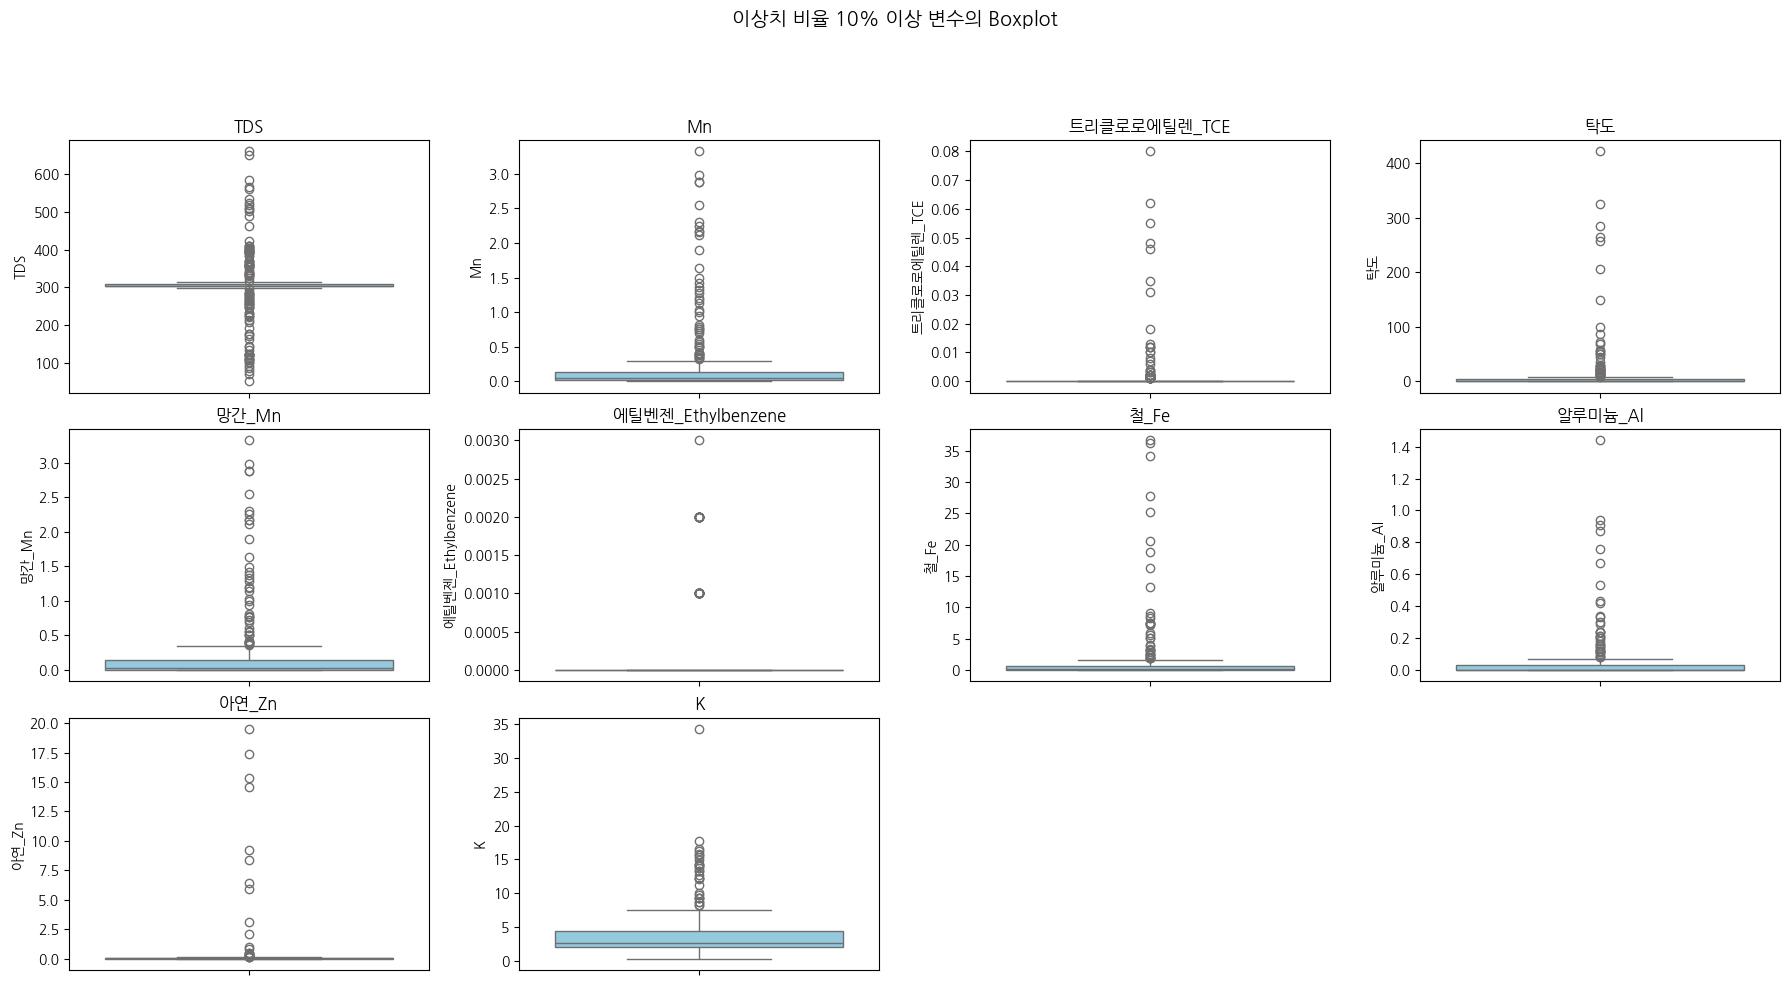

In [ ]:
# 이상치 비율 10% 이상 변수
top_cols = outlier_df[outlier_df['이상치 비율(%)'] >= 10]['변수명1'].tolist()

# Boxplot 시각화
plt.figure(figsize=(18, 10))
for i, col in enumerate(top_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_filtered_seoul[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("이상치 비율 10% 이상 변수의 Boxplot", fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()

<이상치 10% 이상인 물질리스트>

- TDS
- Mn
- 트리클로로에틸렌_TCE
- 탁도
- 망간_Mn
- 철_Fe
- 에틸벤젠_Ethylbenzene
- 알루미늄_Al
- 아연_Zn
- K

### 모델링

In [ ]:
def calculate_label(row):
    scores = [
        get_pH_score(row['pH']),
        get_DO_score(row['DO']),
        get_TDS_score(row['TDS']),
        get_EC_score(row['EC']),
        get_Temp_score(row['Temp'])
    ]
    avg_score = np.mean(scores)
    if avg_score <= 0.5:
        return 0
    elif avg_score <= 1.5:
        return 1
    else:
        return 2

In [ ]:
def preprocess_and_label(df):
    df = df.copy()

    # 기준 5개 변수
    columns_to_check = ['pH', 'DO', 'TDS', 'EC', 'Temp']

    # 모든 값이 NaN인 행 제거
    df = df.dropna(subset=columns_to_check, how='all')

    # 각 열의 평균으로 NaN 대체
    for col in columns_to_check:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mean())

    # 수질 등급 계산
    df['수질등급'] = df.apply(calculate_label, axis=1)

    return df

In [ ]:
df_filtered_seoul = preprocess_and_label(df_filtered_seoul)
df_filtered_seoul.head()

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역,수질등급
0,2023.0,서울특별시,용산구,효창동,중랑천,h-2,26.02,7.33,496.0,3.30,...,False,False,False,False,False,False,False,False,False,1
1,2023.0,서울특별시,용산구,한강로3가,중랑천,h-2,24.58,7.95,200.0,4.05,...,False,False,False,False,False,False,False,False,False,1
2,2023.0,서울특별시,용산구,한남동,중랑천,e-2,15.71,7.14,1323.0,3.39,...,False,False,False,False,False,False,False,False,False,1
3,2023.0,서울특별시,용산구,서빙고동,중랑천,h-2,18.72,6.91,1020.0,3.52,...,False,False,False,False,False,False,False,False,False,1
4,2023.0,서울특별시,용산구,청암동,중랑천,a,18.47,7.54,754.0,3.68,...,False,False,False,False,False,False,False,False,False,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

# 일반 변수
basic_vars = ['Temp', 'pH', 'EC', 'DO', 'TDS']
# 이상치 변수
substance_vars = ['TDS', 'Mn', '트리클로로에틸렌_TCE', '탁도', '망간_Mn', '철_Fe', '에틸벤젠_Ethylbenzene', '알루미늄_Al', '아연_Zn', 'K']

# 수치형 변수
numeric_cols = df_filtered_seoul.select_dtypes(include='number').columns.tolist()

# 최종 선택 변수: 기본 변수 + 이상치 물질 변수 중 실제 있는 컬럼만
final_vars = basic_vars + substance_vars

# X, y split
X = df_filtered_seoul[final_vars]
y = df_filtered_seoul['수질등급']

# train/test splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 모델 선언
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42)
lgbm_clf = lgb.LGBMClassifier(verbose=-1, random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

voting = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('gbc', gbc)],
    voting='soft'
)

# 모델 정의
models = [
    ('RandomForest', rf),
    ('LogisticRegression', lr),
    ('KNN', knn),
    ('XGBoost', xgb_clf),
    ('LightGBM', lgbm_clf),
    ('GradientBoosting', gbc),
    ('SoftVoting', voting)
]

results = []

for name, model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc))

results.sort(key=lambda x: x[1], reverse=True)

print("모델 정확도 높은 순:")
for name, acc in results:
    print(f"{name}: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


모델 정확도 높은 순:
GradientBoosting: 0.9167
SoftVoting: 0.9167
RandomForest: 0.8958
LightGBM: 0.8958
LogisticRegression: 0.8750
XGBoost: 0.8750
KNN: 0.8333


- 모델 정확도 상위 2가지에 대해 하이퍼파라미터 튜닝 및 시각화 실행

#### GradientBoosting

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# GridSearchCV 객체 생성
grid_gbc = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold 교차검증
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 학습
grid_gbc.fit(X_train, y_train)

# 결과 출력
print("Best Parameters:", grid_gbc.best_params_)
print("Best CV Accuracy:", grid_gbc.best_score_)

# 테스트 세트 정확도
best_gbc = grid_gbc.best_estimator_
test_acc = accuracy_score(y_test, best_gbc.predict(X_test))
print("Test Accuracy with Best Estimator:", test_acc)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
Best CV Accuracy: 0.9843454790823213
Test Accuracy with Best Estimator: 0.9166666666666666


- 튜닝 후 성능 유지

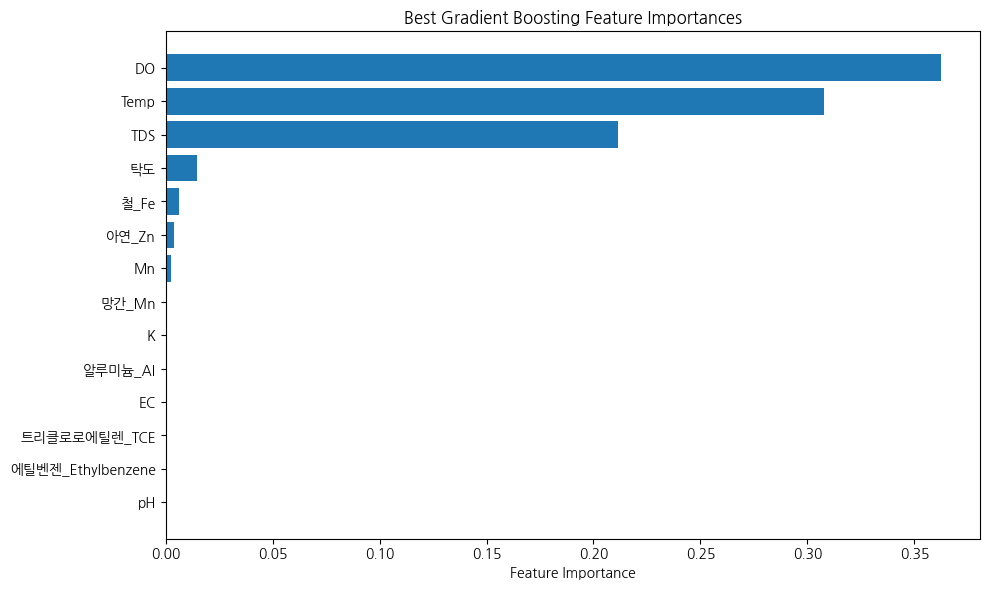

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 중요도 추출 및 정렬
importances = best_gbc.feature_importances_
features = np.array(X.columns)

sorted_idx = np.argsort(importances)[::-1]
sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("Best Gradient Boosting Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### SoftVoting

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb

# 원래 X 데이터프레임에서 중복된 열 제거
X = X.loc[:, ~X.columns.duplicated()]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 개별 모델 정의
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Soft Voting 정의
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('gb', gb_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft',
    n_jobs=-1
)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 7],
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.05, 0.1],
    'gb__max_depth': [3, 4],
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.05, 0.1]
}

# GridSearchCV 객체 생성
grid_voting = GridSearchCV(
    estimator=voting_clf,
    param_grid=param_grid,
    cv=5,  # 5-fold 교차검증
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# 학습
grid_voting.fit(X_train.values, y_train)

# 결과 출력
print("Best Parameters:", grid_voting.best_params_)
print("Best CV Accuracy:", grid_voting.best_score_)

# 테스트 셋 평가
best_voting = grid_voting.best_estimator_
test_acc = accuracy_score(y_test, best_voting.predict(X_test))
print("Test Accuracy with Best Estimator:", test_acc)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Parameters: {'gb__learning_rate': 0.05, 'gb__max_depth': 3, 'gb__n_estimators': 100, 'rf__max_depth': 5, 'rf__n_estimators': 100, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 3, 'xgb__n_estimators': 200}
Best CV Accuracy: 0.9790823211875844
Test Accuracy with Best Estimator: 0.8958333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


- 테스트셋 정확도 감소 → 이는 오버튜닝 또는 모델 조합의 불균형 가능성이 있음.

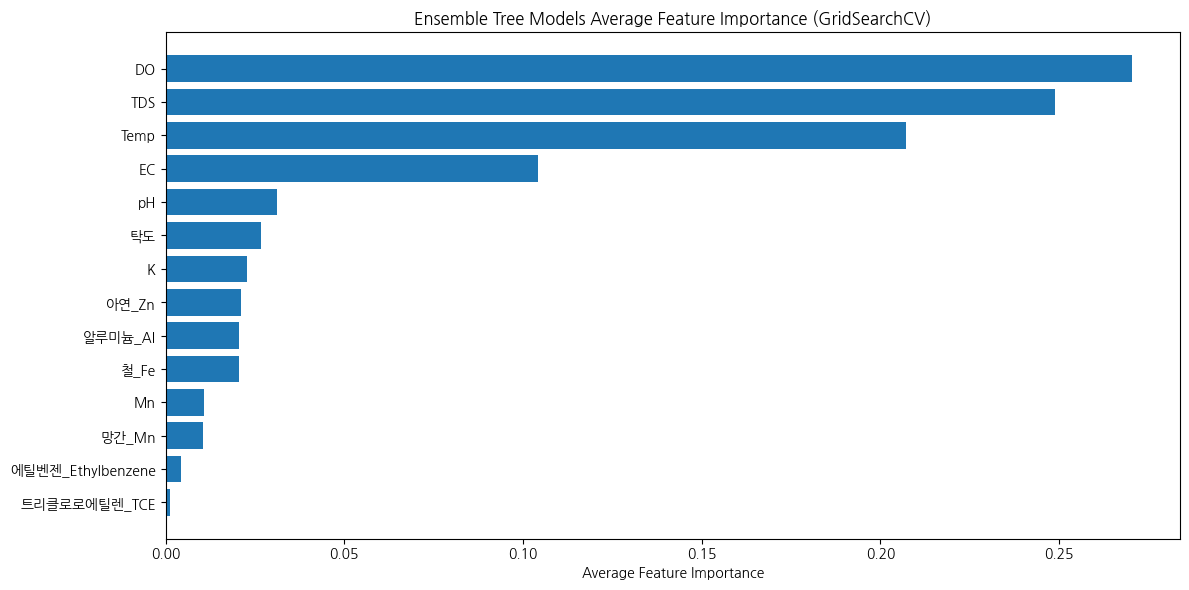

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature Importance 평균
importances = []
for name in ['rf', 'gb', 'xgb']:
    model = best_voting.named_estimators_[name]
    importances.append(model.feature_importances_)

avg_importance = np.mean(importances, axis=0)

# 시각화
features = np.array(X.columns)
sorted_idx = np.argsort(avg_importance)[::-1]
sorted_features = features[sorted_idx]
sorted_importances = avg_importance[sorted_idx]

plt.figure(figsize=(12, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Average Feature Importance")
plt.title("Ensemble Tree Models Average Feature Importance (GridSearchCV)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### [해석]

1. 상위 주요 변수: DO, Temp, TDS  
해석:  
- DO (용존산소): 지하수 내 산소 농도를 나타내는 가장 핵심적인 지표로, 생물학적 오염 및 수질 안정성 판단에 필수적임. 도심지의 인공 구조물 및 침투수 영향으로 유입된 산소 농도 변화가 민감하게 나타남.  
- Temp (수온): 도시 열섬 현상, 하수 유입, 지표 열전달 등의 영향을 반영하며, 용존산소(DO)와 밀접한 연관을 가짐. 도심 지하수에서는 일반적으로 수온이 상대적으로 높고 계절 편차가 작음.  
- TDS (총용존고형물): 지하수 내 무기염류, 이온성 물질 등의 총합으로 생활하수, 도로 유출수, 건설 잔류물 등 다양한 도시 오염원을 반영함. 높은 TDS는 장기적으로 수도관, 보일러 등에 영향을 줄 수 있음.

→ 서울 지하수 수질 예측에서는 물리화학적 지표(DO, Temp, TDS)가 수질 등급 결정에 핵심적인 예측 변수로 작용하고 있으며, 이는 도시화 환경 및 지표 활동의 영향과 직결된다.

2. 중간 주요 변수: 탁도, Fe, Zn, Mn  
해석:  
- 탁도: 공사장, 도심 침투수, 노후 배관 등의 영향으로 입자성 물질이 유입될 가능성이 높음. 서울처럼 고밀도 도시에서는 탁도 변화가 도심 공사 활동 및 유사시 오염 유입을 시사하는 중요한 지표임.  
- Fe, Zn, Mn (철, 아연, 망간): 도심 배관 부식, 노후된 수송관, 지하 매설 배관의 산화반응 등과 관련되어 미량 중금속이 지하수로 유입될 수 있음. 주거지역보다 상업 및 재개발 구역에서 변화폭이 클 수 있음.

→ 이들 항목은 평시에는 큰 영향을 미치지 않지만, 건설 공사·도심 침투수 등의 사건성 오염 탐지에 효과적이며, 조기경보 시스템의 핵심 변수로 활용 가능하다.

3. 하위 주요 변수: K, Al, EC, TCE, 에틸벤젠, pH  
해석:  
- K, Al, EC: 생활오염 또는 비료 성분, 수도관 부식 등의 다양한 기원을 가질 수 있으나, 현재 서울시 지하수에서는 영향력이 제한적임.  
- TCE, 에틸벤젠: 휘발성 유기화합물(VOCs)로, 공업지역 및 주유소, 폐기물 매립지 인근에서 간헐적 검출될 수 있음.  
- pH: 보통 완충 능력이 있어 급변하지 않으나, TDS 및 중탄산 이온과 함께 장기적인 지하수 산도 안정성에 영향을 줄 수 있음.

→ 해당 변수들은 현재 영향력은 낮지만, 사고·누출 등 특수 상황 시 예기치 않은 급증 가능성이 존재해, 비상 감시 체계에 포함되어야 한다.

### [정책 제안]

1. 배경 및 필요성  
서울 지하수는 도시화, 도심 공사, 열섬현상, 생활오염 등 다양한 도시 환경 요인에 의해 지속적으로 변화하고 있다.  
이번 분석 결과, DO, Temp, TDS 등 물리화학적 항목이 주요 예측 변수로 도출되었으며, 탁도 및 중금속(Fe, Zn, Mn)도 도심 환경에서의 비정상 오염 유입을 조기 탐지할 수 있는 지표로 기능함이 확인되었다.  
이에 따라, 서울형 수질 예측 시스템 및 이상 감시체계의 고도화가 시급히 필요하다.

2. 정책 제안

2-1. 서울형 물리화학 기반 지하수 예측 시스템 구축

- 목표:  
DO, Temp, TDS 등 핵심 물리화학 지표 기반으로 한 지하수 수질 예측 시스템 고도화

- 내용:  
물리화학적 항목에 대해 실시간 데이터를 수집·분석하고, 이를 기반으로 지하수 수질의 예측 정확도를 향상

- 세부:  
  - 주요 변수 자동 측정을 위한 스마트 센서 설치 (DO, Temp, TDS 중심)  
  - 지역별 모델 보정 및 표준 수질 등급 분류 기준 정립  
  - 예측 결과를 행정기관 정책 자료 및 지역 주민 대상 서비스로 연계

- 추진:  
서울시 물환경정책과·수도사업본부와 협력해 시범 지역 선정 → 점진적 확대  
환경부 지하수관측망 고도화 사업과 연계하여 예산 확보 및 기술지원

2-2. 중금속 및 탁도 기반 조기경보 체계 도입

- 목표:  
Fe, Zn, Mn 및 탁도 변화에 대한 실시간 경보 체계를 통해 오염사고 조기 탐지 및 즉시 대응

- 내용:  
도심 공사, 배관 교체, 침투수 증가 등에 따라 변화하는 중금속 및 탁도 농도 이상 징후를 실시간 감지하여 대응 체계 마련

- 세부:  
  - 중금속 및 탁도 항목 중심의 실시간 측정 및 초과 기준 알림 알고리즘 개발  
  - 공사현장, 재개발지구 등 우선 순위 지역에 시범 설치  
  - 주민-행정기관 연계형 알림 시스템 운영 (앱·문자 서비스 등)

- 추진:  
서울시 물관리과, 도시계획국과 연계하여 정책화 추진  
건설·개발사업 환경영향평가 기준에도 연동하여 제도화

3. 기대 효과

- 고위험 지표(DO, Temp, TDS 등) 기반의 선제적 예측 체계 구축  
- 공사 등 사건성 오염에 대한 조기 감지 및 대응 속도 향상  
- 지하수 수질 신뢰도 제고 및 주민 체감형 환경행정 구현  
- 수질 예측 데이터 기반 정책 수립 → 예산·행정 계획의 정량적 근거 확보

# **경기도**

In [ ]:
sido_dfs['경기도']
# csv로 저장
sido_dfs['경기도'].to_csv('경기도.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_gyeonggi = pd.read_csv('경기도.csv')
df_gyeonggi

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2023.0,경기도,가평군,설악면,청평댐,h-2,14.65,7.17,182.0,4.42,...,False,False,False,False,False,False,False,False,False,False
1,2023.0,경기도,가평군,가평읍,의암댐,a,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,2023.0,경기도,가평군,가평읍,의암댐,h-2,12.75,7.14,177.0,6.73,...,False,False,False,False,False,False,False,False,False,False
3,2023.0,경기도,가평군,가평읍,의암댐,h-2,12.88,7.56,127.0,5.96,...,False,False,False,False,False,False,False,False,False,False
4,2023.0,경기도,가평군,가평읍,의암댐,a,13.78,7.10,310.0,4.28,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,2018.0,경기도,용인시,-,안성천,e-2,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1470,2018.0,경기도,용인시,-,남한강하류,e-2,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1471,2018.0,경기도,용인시,-,안성천,a,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1472,2018.0,경기도,용인시,-,남한강하류,e-2,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


null 값 상위 30% 칼럼 모두 제외

In [ ]:
numeric_df2 = df_gyeonggi.select_dtypes(include=['number'])

# 전체 행 수 기준으로 30% 이상 결측치가 있는 컬럼 찾기
threshold2 = len(df_gyeonggi) * 0.3

# 수치형 컬럼 중 결측치 수가 30% 이상인 컬럼 이름 추출
cols_to_drop2 = numeric_df2.columns[numeric_df2.isnull().sum() >= threshold2]

# 원본 df_gyeonggi에서 해당 컬럼 제거
df_filtered_gyeonggi = df_gyeonggi.drop(columns=cols_to_drop2)

30% 제외한 컬럼에서 수치형 변수의 null 값은 중앙값으로 대체

In [ ]:
# 수치형 컬럼만 선택
numeric_cols2 = df_filtered_gyeonggi.select_dtypes(include=['number']).columns

# 수치형 컬럼의 null 값을 해당 컬럼의 중앙값으로 대체
df_filtered_gyeonggi[numeric_cols2] = df_filtered_gyeonggi[numeric_cols2].fillna(df_filtered_gyeonggi[numeric_cols2].median())

df_filtered_gyeonggi

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Ca,Mg,Na,K,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2023.0,경기도,가평군,설악면,청평댐,h-2,29.3450,9.6050,4.9305,1.9878,...,False,False,False,False,False,False,False,False,False,False
1,2023.0,경기도,가평군,가평읍,의암댐,a,22.8070,4.9588,13.4330,2.3143,...,False,False,False,False,False,False,False,False,False,False
2,2023.0,경기도,가평군,가평읍,의암댐,h-2,50.7400,2.1162,19.3760,2.1231,...,False,False,False,False,False,False,False,False,False,False
3,2023.0,경기도,가평군,가평읍,의암댐,h-2,8.1627,2.3273,2.4147,1.6886,...,False,False,False,False,False,False,False,False,False,False
4,2023.0,경기도,가평군,가평읍,의암댐,a,6.2792,1.6679,3.9082,2.1360,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,2018.0,경기도,용인시,-,안성천,e-2,26.9000,5.7000,13.5000,1.8395,...,False,False,False,False,False,False,False,False,False,False
1470,2018.0,경기도,용인시,-,남한강하류,e-2,26.9000,5.7000,13.5000,1.8395,...,False,False,False,False,False,False,False,False,False,False
1471,2018.0,경기도,용인시,-,안성천,a,26.9000,5.7000,13.5000,1.8395,...,False,False,False,False,False,False,False,False,False,False
1472,2018.0,경기도,용인시,-,남한강하류,e-2,26.9000,5.7000,13.5000,1.8395,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# csv로 저장
df_filtered_gyeonggi.to_csv('df_filtered_gyeonggi.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_filtered_gyeonggi.describe()

,연도,Ca,Mg,Na,K,HCO3,Cl,SO4,NO3,Si,...,탁도,염소이온_Cl_,사염화탄소,과망간산칼륨소비량,벤젠_Benzene,대장균군,테트라클로로에틸렌,1_2_디브로모_3_클로로프로판,브롬,이산화질소
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,...,1474.000000,1474.000000,1474.000000,1474.000000,1474.0,1.474000e+03,1474.000000,1474.0,1474.000000,1474.0
mean,2019.782225,31.372825,7.286261,19.817557,2.947950,92.966431,25.115388,19.864384,31.999033,13.873622,...,2.670393,28.188547,0.000004,1.982572,0.0,4.206736e+03,0.000027,0.0,0.099939,0.0
std,1.868940,22.808161,6.144023,20.530047,6.317961,59.881429,29.066278,26.952993,64.905909,9.829173,...,22.673064,31.351378,0.000156,1.737032,0.0,1.123997e+05,0.000668,0.0,0.242555,0.0
min,2018.000000,0.140000,0.000000,1.250200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.020000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.0,0.000000,0.0
25%,2018.000000,16.010000,3.700000,8.375450,1.100000,54.900000,6.200000,7.005000,4.402273,9.076671,...,0.200000,7.717250,0.000000,1.300000,0.0,0.000000e+00,0.000000,0.0,0.000000,0.0
50%,2019.000000,26.900000,5.700000,13.500000,1.839500,83.200000,16.000000,13.000000,12.555068,11.379149,...,0.320000,18.700000,0.000000,1.800000,0.0,1.000000e+00,0.000000,0.0,0.000000,0.0
75%,2022.000000,40.180000,8.993575,23.200000,2.834850,119.600000,33.500000,24.000000,35.275000,14.816503,...,0.660000,37.350000,0.000000,2.200000,0.0,1.600000e+01,0.000000,0.0,0.000000,0.0
max,2023.000000,228.600000,81.630000,174.500000,122.900000,348.900000,303.700000,585.860000,1781.200000,74.801309,...,709.280000,322.200000,0.006000,27.400000,0.0,4.200000e+06,0.024000,0.0,1.850000,0.0


### 이상치

In [ ]:
# 전체 수치형 변수에서 이상치 탐지
numeric_cols2 = df_filtered_gyeonggi.select_dtypes(include='number').columns

outlier_summary = []

for col in numeric_cols2:
    outliers, lower, upper = detect_outliers_iqr(df_filtered_gyeonggi, col)
    outlier_count = len(outliers)
    total_count = df_filtered_gyeonggi[col].count()
    outlier_ratio = outlier_count / total_count if total_count != 0 else 0
    outlier_summary.append({
        '변수명2': col,
        '전체값 개수': total_count,
        '이상치 개수': outlier_count,
        '이상치 비율(%)': round(outlier_ratio * 100, 2)
    })

# DataFrame으로 정리
outlier_df2 = pd.DataFrame(outlier_summary).sort_values(by='이상치 비율(%)', ascending=False)
outlier_df2.head(15)

,변수명2,전체값 개수,이상치 개수,이상치 비율(%)
22,암모니아성질소_NH3_N,1474,272,18.45
45,대장균군,1474,267,18.11
48,브롬,1474,265,17.98
20,망간_Mn,1474,236,16.01
14,알루미늄_Al,1474,225,15.26
40,탁도,1474,212,14.38
39,아연_Zn,1474,210,14.25
8,NO3,1474,188,12.75
11,NO3_N,1474,186,12.62
9,Si,1474,176,11.94


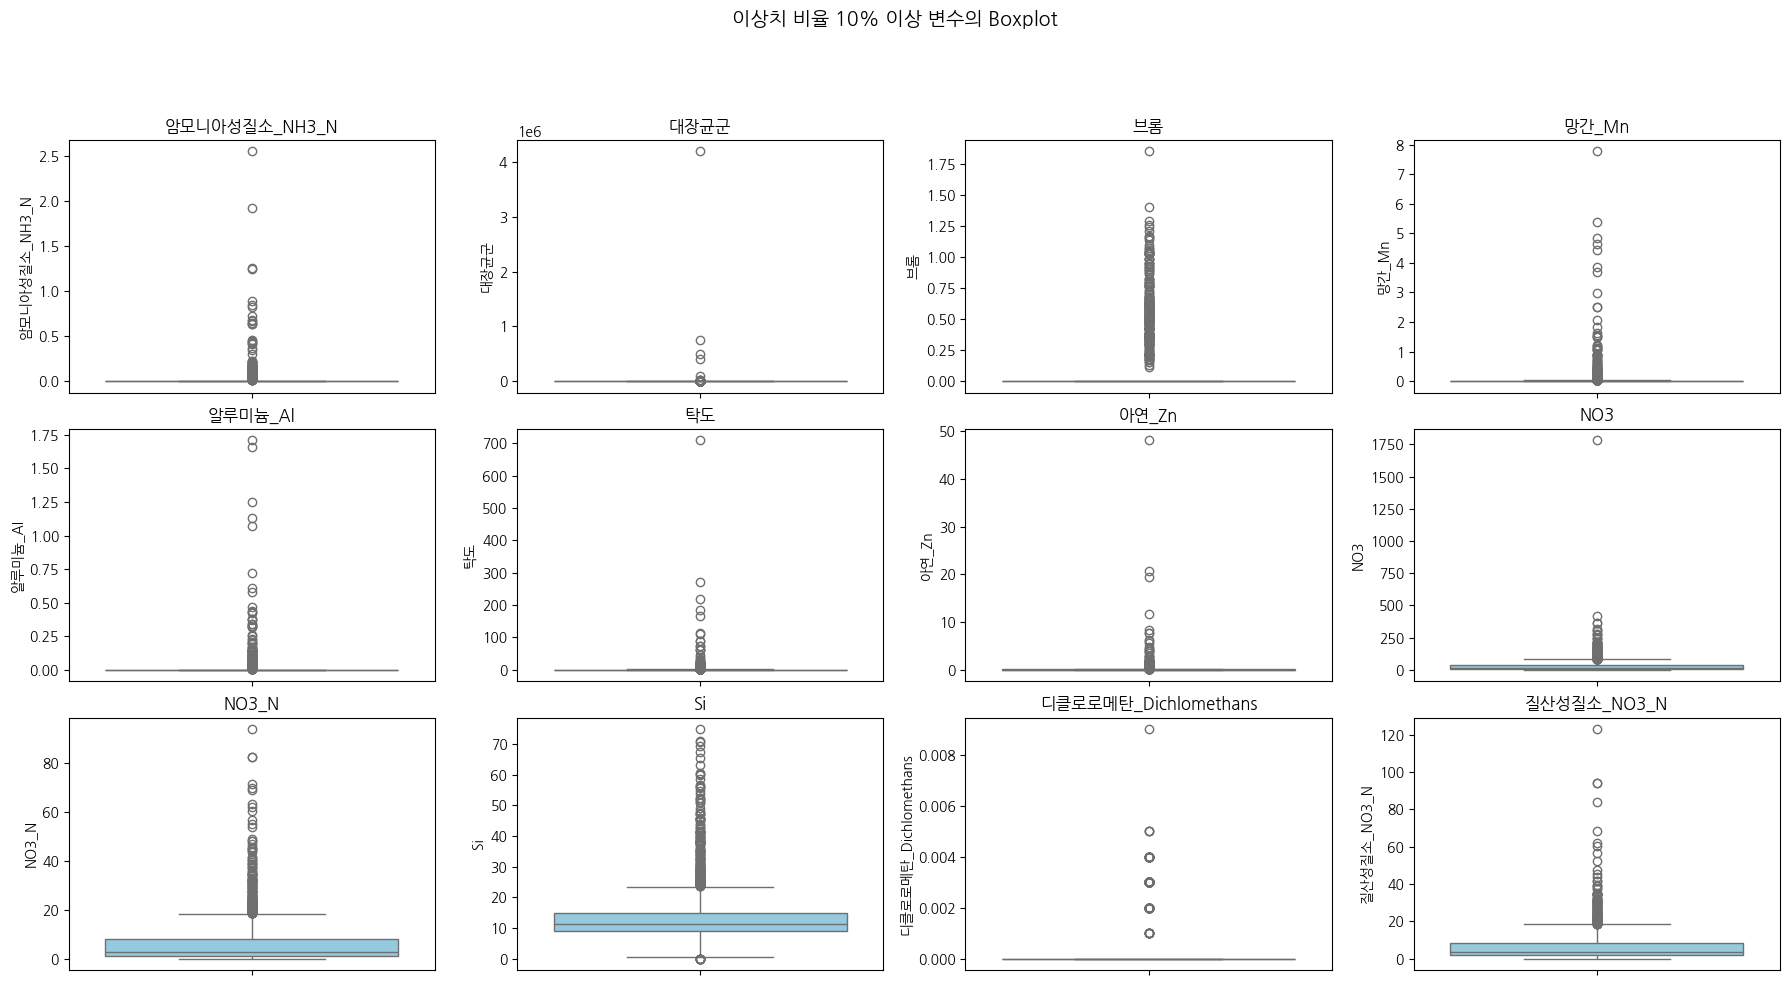

In [ ]:
# 이상치 비율 10% 이상 변수
top_cols2 = outlier_df2[outlier_df2['이상치 비율(%)'] >= 10]['변수명2'].tolist()

# Boxplot 시각화
plt.figure(figsize=(18, 10))
for i, col in enumerate(top_cols2, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_filtered_gyeonggi[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("이상치 비율 10% 이상 변수의 Boxplot", fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()

<이상치 10% 이상인 물질리스트>

- 암모니아성질소_NH3_N
- 대장균군
- 브롬
- 망간_Mn
- 알루미늄_Al
- 탁도
- 아연_Zn
- NO3
- NO3_N
- Si
- 디클로로메탄_Dichlomethans
- 질산성질소_NO3_N

### 모델링

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import numpy as np

# 타겟 변수 리스트
target_cols = ['암모니아성질소_NH3_N', '대장균군', '브롬', '망간_Mn', '알루미늄_Al', '탁도', '아연_Zn', 'NO3', 'NO3_N', 'Si', '디클로로메탄_Dichlomethans', '질산성질소_NO3_N']

# X, y 분리
X = df_filtered_gyeonggi.select_dtypes(include='number').drop(columns=target_cols)
y = df_filtered_gyeonggi[target_cols]

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
models = {
    "DecisionTree": MultiOutputRegressor(DecisionTreeRegressor(random_state=42)),
    "RandomForest": MultiOutputRegressor(RandomForestRegressor(random_state=42)),
    "GradientBoosting": MultiOutputRegressor(GradientBoostingRegressor(random_state=42)),
    "XGBoost": MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', random_state=42)),
    "LightGBM": MultiOutputRegressor(lgb.LGBMRegressor(random_state=42)),
}

# 개별 모델 학습 및 평가 결과 저장용
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmses = []
    r2s = []
    for i, col in enumerate(target_cols):
        rmse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
        r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
        rmses.append(rmse)
        r2s.append(r2)
    results[name] = {"RMSE_mean": np.mean(rmses), "R2_mean": np.mean(r2s)}

# Voting Regressor 생성 (개별 모델들을 모아서 앙상블)
voting = VotingRegressor([
    ('dt', models["DecisionTree"].estimator),
    ('rf', models["RandomForest"].estimator),
    ('xgb', models["XGBoost"].estimator)
])

voting_multi = MultiOutputRegressor(voting)
voting_multi.fit(X_train, y_train)
y_pred_voting = voting_multi.predict(X_test)

rmses_voting = []
r2s_voting = []
for i, col in enumerate(target_cols):
    rmse = mean_squared_error(y_test.iloc[:, i], y_pred_voting[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred_voting[:, i])
    rmses_voting.append(rmse)
    r2s_voting.append(r2)
results["VotingRegressor"] = {"RMSE_mean": np.mean(rmses_voting), "R2_mean": np.mean(r2s_voting)}

# RMSE 오름차순 정렬 후 출력
print("\n=== 모델별 평균 점수 (RMSE 오름차순) ===")
for model_name, scores in sorted(results.items(), key=lambda x: x[1]['RMSE_mean']):
    print(f"{model_name} - 평균 RMSE: {scores['RMSE_mean']:.4f}, 평균 R2: {scores['R2_mean']:.4f}")


=== 모델별 평균 점수 (RMSE 오름차순) ===
LightGBM - 평균 RMSE: 70875596.0286, 평균 R2: 0.3034
GradientBoosting - 평균 RMSE: 188765354.6686, 평균 R2: -0.0133
RandomForest - 평균 RMSE: 238018246.2819, 평균 R2: -0.0195
VotingRegressor - 평균 RMSE: 2691214404.2305, 평균 R2: -4.3865
XGBoost - 평균 RMSE: 4993713961.9970, 평균 R2: -8.6063
DecisionTree - 평균 RMSE: 5148098697.5429, 평균 R2: -8.9470


- 모델 평균 RMSE 상위 3가지에 대해 하이퍼파라미터 튜닝 및 시각화 실행

#### LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 하이퍼파라미터 그리드 정의
param_grid = {
    'estimator__n_estimators': [100],
    'estimator__learning_rate': [0.05, 0.1],
    'estimator__max_depth': [3, 5],
    'estimator__num_leaves': [31, 50],
}

# 기본 모델
lgbm = LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)
multi_lgbm = MultiOutputRegressor(lgbm, n_jobs=-1)

# GridSearchCV 적용
grid_search_lgbm = GridSearchCV(
    estimator=multi_lgbm,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# 학습
grid_search_lgbm.fit(X_train, y_train)

# 예측
y_pred_lgbm = grid_search_lgbm.predict(X_test)

# 평가
# RMSE 수동 계산
rmses = [np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred_lgbm[:, i])) for i in range(len(target_cols))]
r2s = [r2_score(y_test.iloc[:, i], y_pred_lgbm[:, i]) for i in range(len(target_cols))]

# 출력
print(f"\nBest Parameters for LightGBM: {grid_search_lgbm.best_params_}")
print(f"평균 RMSE: {np.mean(rmses):.4f}")
print(f"평균 R²: {np.mean(r2s):.4f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best Parameters for LightGBM: {'estimator__learning_rate': 0.05, 'estimator__max_depth': 5, 'estimator__n_estimators': 100, 'estimator__num_leaves': 31}
평균 RMSE: 2085.7645
평균 R²: 0.3365


- 튜닝 후 성능 향상

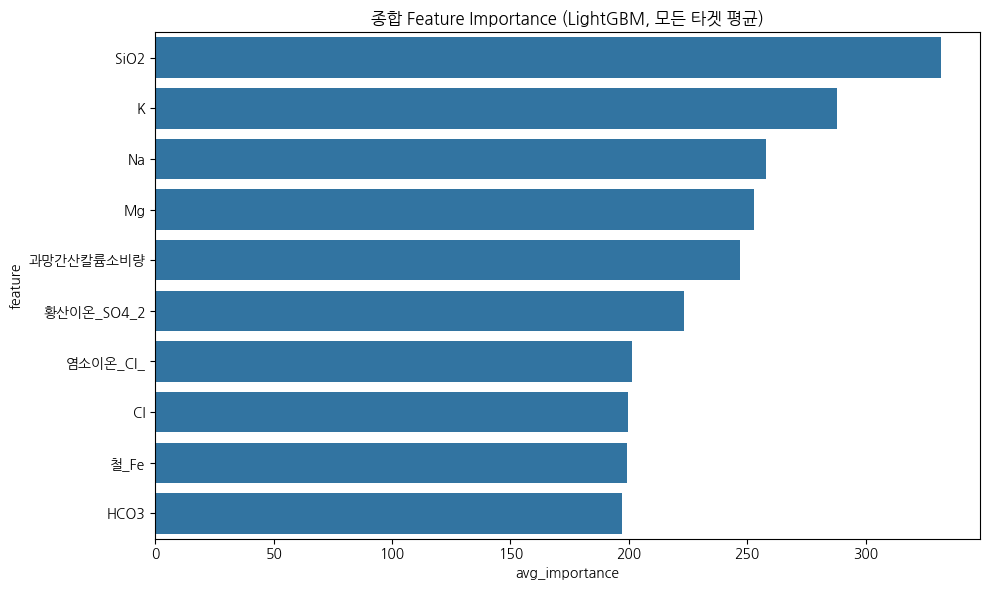

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor
import numpy as np
import pandas as pd

# LightGBM 다중 출력 모델 학습
multi_lgbm = MultiOutputRegressor(LGBMRegressor(random_state=42))
multi_lgbm.fit(X_train, y_train)

# 모든 타겟에 대한 feature importance 저장
importances_all = []

for model in multi_lgbm.estimators_:
    importances_all.append(model.feature_importances_)

# 평균 중요도 계산
avg_importance = np.mean(importances_all, axis=0)

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'avg_importance': avg_importance
}).sort_values(by='avg_importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='avg_importance', y='feature')
plt.title("종합 Feature Importance (LightGBM, 모든 타겟 평균)")
plt.tight_layout()
plt.show()

#### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 하이퍼파라미터 그리드 정의
param_grid = {
    'estimator__max_depth': [3, 5, 7, 10, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': [None, 'sqrt', 'log2']
}

# 기본 모델
dt = DecisionTreeRegressor(random_state=42)
multi_dt = MultiOutputRegressor(dt)

# GridSearchCV 적용
grid_search_dt = GridSearchCV(
    estimator=multi_dt,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# 학습
grid_search_dt.fit(X_train, y_train)

# 예측
y_pred_dt = grid_search_dt.predict(X_test)

# 평가
# RMSE 수동 계산
rmses = [np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred_dt[:, i])) for i in range(len(target_cols))]
r2s = [r2_score(y_test.iloc[:, i], y_pred_dt[:, i]) for i in range(len(target_cols))]

# 출력
print(f"\nBest Parameters for DecisionTree: {grid_search_dt.best_params_}")
print(f"평균 RMSE: {np.mean(rmses):.4f}")
print(f"평균 R²: {np.mean(r2s):.4f}")

Fitting 3 folds for each of 135 candidates, totalling 405 fits

Best Parameters for DecisionTree: {'estimator__max_depth': 3, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 10}
평균 RMSE: 74.9614
평균 R²: 0.2111


- 튜닝 후 성능 향상

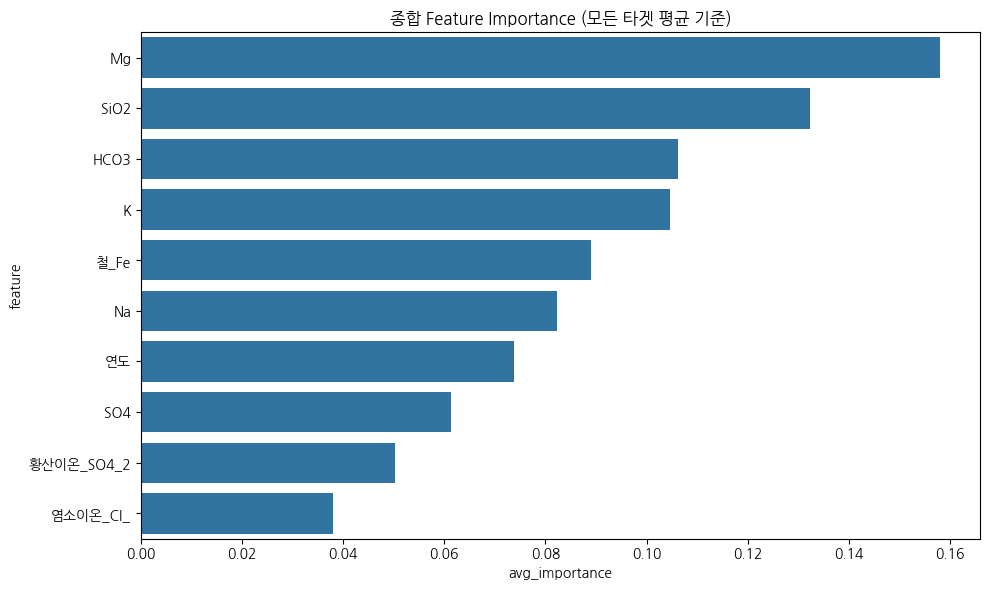

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

multi_dt = MultiOutputRegressor(DecisionTreeRegressor(random_state=42))
multi_dt.fit(X_train, y_train)

# 모든 타겟에 대해 feature importance 평균내기
importances_all = []

for model in multi_dt.estimators_:
    importances_all.append(model.feature_importances_)

# 평균 중요도 계산
avg_importance = np.mean(importances_all, axis=0)

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'avg_importance': avg_importance
}).sort_values(by='avg_importance', ascending=False)

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='avg_importance', y='feature')
plt.title("종합 Feature Importance (모든 타겟 평균 기준)")
plt.tight_layout()
plt.show()

#### GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 하이퍼파라미터 그리드 정의
param_grid = {
    'estimator__n_estimators': [100],
    'estimator__learning_rate': [0.1],
    'estimator__max_depth': [3, 5],
    'estimator__min_samples_split': [2],
    'estimator__min_samples_leaf': [1],
    'estimator__max_features': ['sqrt']
}

# 기본 모델 정의
gbr = GradientBoostingRegressor(random_state=42)
multi_gbr = MultiOutputRegressor(gbr)

# GridSearchCV 적용
grid_search_gbr = GridSearchCV(
    estimator=multi_gbr,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# 학습
grid_search_gbr.fit(X_train, y_train)

# 예측
y_pred_gbr = grid_search_gbr.predict(X_test)

# 평가
rmses = [np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred_gbr[:, i])) for i in range(y_test.shape[1])]
r2s = [r2_score(y_test.iloc[:, i], y_pred_gbr[:, i]) for i in range(y_test.shape[1])]

# 출력
print(f"\nBest Parameters for GradientBoostingRegressor: {grid_search_gbr.best_params_}")
print(f"평균 RMSE: {np.mean(rmses):.4f}")
print(f"평균 R²: {np.mean(r2s):.4f}")

Fitting 3 folds for each of 2 candidates, totalling 6 fits

Best Parameters for GradientBoostingRegressor: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 100}
평균 RMSE: 3591.0565
평균 R²: 0.1203


- 튜닝 후 성능 향상

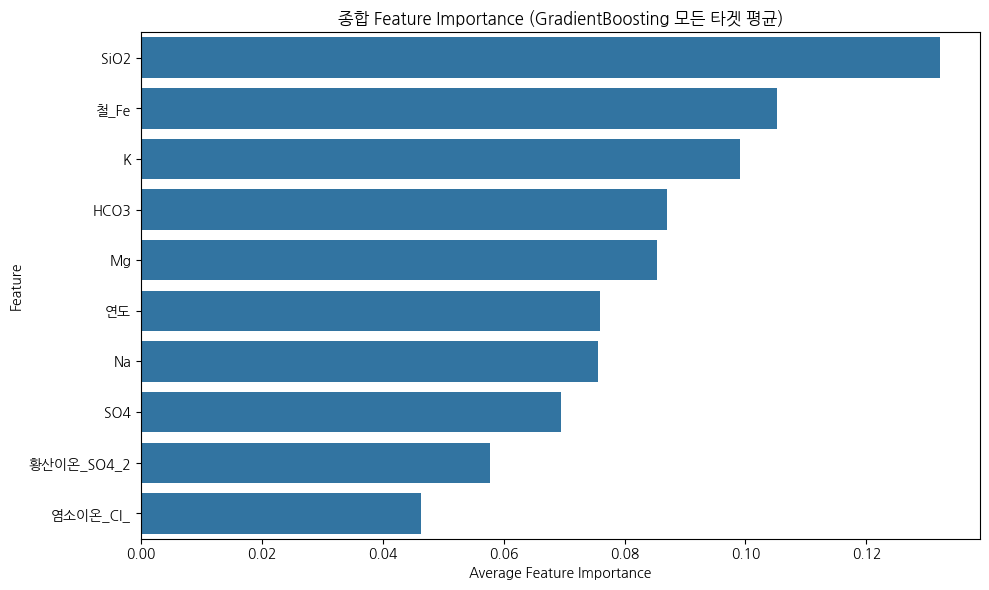

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 모델 학습
multi_gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
multi_gbr.fit(X_train, y_train)

# 모든 타겟별 feature importance 수집
importances_all = []

for model in multi_gbr.estimators_:
    importances_all.append(model.feature_importances_)

# 평균 중요도 계산
avg_importance = np.mean(importances_all, axis=0)

# DataFrame 생성 및 정렬
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'avg_importance': avg_importance
}).sort_values(by='avg_importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='avg_importance', y='feature')
plt.title("종합 Feature Importance (GradientBoosting 모든 타겟 평균)")
plt.xlabel("Average Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

--------

### [해석]

1. 상위 주요 변수: Mg, SiO₂, HCO₃

해석:  
- Mg (마그네슘): 지하수 내 자연적으로 존재하는 미네랄로, 물의 경도(hardness)에 크게 기여함. 화강암 등 암반에서 용출되며, 농도가 높을수록 오래된 심층수일 가능성 또는 특정 암반 접촉 가능성을 시사함  
- SiO₂ (이산화규소): 규산염암, 화강암 등 지질 구조에서 유래되며, 지하수의 지질학적 기원을 나타내는 지시자 역할을 함  
- HCO₃ (중탄산이온): 지하수의 pH 안정성과 완충능을 결정하는 핵심 항목. 탄산염 광물과의 반응성이 높은 환경을 의미하며, 산성비나 오염원 유입에 대한 저항성을 나타냄  

→ 경기도 지하수 수질 예측에서는 암반 기원 물질(Mg, SiO₂, HCO₃)이 결정적 예측 변수로 작용하며, 이는 지하 지질 특성과의 밀접한 연관성을 시사함

2. 중간 주요 변수: K, Fe, Na, 연도(온도)

해석:  
- K (칼륨): 지질 기원 외에도 비료 등 농업 오염 가능성을 시사하며, 농경지 인근 지하수에서 중요한 지표로 작용함  
- Fe (철): 자연 기원 외에도 관정 및 배관 부식과 관련됨. 산화환원 환경에 민감하고, 심미적 문제 및 배관 손상을 유발할 수 있음  
- Na (나트륨): 해수 침투, 염수 혼입 또는 하수 영향 등을 시사. K와 함께 이온 교환 반응을 통해 기원을 분석할 수 있음  
- 연도(온도): 지하수의 체류 시간, 수심, 유입 경로 등에 영향을 받으며, 금속 용해도와 반응성을 좌우함. 시계열적 수질 변화를 반영하는 지표 역할을 함  

→ 생활 오염 및 농업 활동의 영향을 반영하는 변수들로, 도시화·계절성 요인의 신호를 담고 있음

3. 하위 주요 변수: SO₄, SO₄_2, Cl

해석:  
- SO₄ (황산이온): 황화물 광물의 산화 또는 산성광산배수(AMD)와 관련되어 있으며, 산업지역이나 광산 인근에서 오염 추적 지표로 활용됨  
- SO₄_2: SO₄의 파생형 변수로, 특정 기준 초과 여부 등을 표시하는 더미 변수로 추정됨  
- Cl (염소이온): 일반적인 생활하수, 산업 폐수 또는 염수 유입 등 오염의 지표로 작용함. 파생 변수일 가능성 있음  

→ 현재 예측력은 낮지만, 산업 활동 또는 비점오염 유입 시 급격한 변화가 발생할 수 있어 비상 감시체계에 포함할 필요가 있음




### [정책 제안]

1. 배경 및 필요성  
경기도 지하수 분석 결과, 암반 기원 물질(Mg, SiO₂, HCO₃ 등)이 수질 등급 예측에 크게 기여하며,  
이는 지질 및 지표 환경과의 밀접한 상관성을 시사한다.  
또한 중간 영향 항목으로 생활·농업 오염원의 영향이 감지되며, 일부 항목은 시계열 변화에 따라 수질이 변동됨이 확인되어  
지속적이고 계절성을 반영한 모니터링 체계가 필요하다.

2. 정책 제안

2-1. 자연기원 주요 이온(Mg, SiO₂, HCO₃) 기반의 지역별 지질연계 수질 예측 플랫폼 구축

목표:  
경기도 내 다양한 지질 조건을 반영한 맞춤형 지하수 수질 예측 체계 마련

- 내용:  
지질 기반 주요 이온(Mg, SiO₂, HCO₃)을 활용한 수질 등급 시뮬레이션 및 사전 진단 체계 구축

- 세부:  
암반 기원 이온 농도 분석을 통해 지하수 오염 취약성 예측  
SiO₂ 기반으로 표토-지하수 연결성 평가 및 위험 지역 사전 예보  
예측 플랫폼을 통해 채취 전 수질 시뮬레이션 제공  
지역 지질 특성을 고려한 차등 수질 기준 설정 검토

- 추진:  
경기도 및 시군 환경부서 협력으로 시범 지역 선정  
예측 플랫폼 시범 적용 → 활용성 검증 후 도 전역으로 단계적 확산  
수자원공사, 학계(지질학 등)와 협력하여 모델 정교화 및 정책 연계

2-2. 중간·하위 영향항목(Fe, Na, SO₄, Cl 등)을 활용한 농업·생활 오염원 비상 감시 체계 강화

목표:  
예기치 않은 오염 유입 또는 계절성 영향에 대한 신속 대응체계 구축  
농업·도시화 영향 반영된 지속가능한 지하수 수질 관리 체계 정착

- 내용:  
K, Na, SO₄, Cl 등 항목 중심 센서 기반 실시간 감시망 구축  
시계열 분석 기반 계절성 이상 징후 탐지 시스템 도입  
Fe 급증 시 배관 부식 등으로 간주하여 긴급경보 및 조사체계 가동

- 세부:  
농업지역: K, Na 이온 변화 중심 모니터링  
도시/산업지역: SO₄, Cl 급변 감지 및 원인 추적  
연도별 수질 데이터 기반 비정상 패턴 자동 탐지 알고리즘 개발  
Fe 기준 초과 시 배관 부식 여부 및 공사 영향 정밀 추적 절차 수립

- 추진:  
초기에는 오염 민감도 높은 농업지대·공업지대 중심으로 센서 설치  
추후 도 전역에 단계적 확대 적용  
경기도 수자원본부, 환경부 등과 연계해 법·제도적 기반 마련

3. 기대 효과

- 주요 이온 기반 지역 맞춤 수질 예측 정확도 향상  
- 농업·생활 오염원에 의한 단기 수질 악화 감지 시간 단축  
- 주민 대상 지질 기반 수질 안내 강화 → 수질 불안 해소 및 음용수 신뢰도 향상  
- 지역 여건을 반영한 지하수 관리 정책 설계 → 행정 효율성 및 정책 수용성 제고


# **강원도**


In [ ]:
sido_dfs['강원도']
# csv로 저장
sido_dfs['강원도'].to_csv('강원도.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_gangwon = pd.read_csv("강원도.csv")
df_gangwon.head()

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2018.0,강원도,동해시,부곡동,강릉남대천,h-2,6.3,7.7,107.0,7.80,...,False,False,False,False,False,False,False,False,False,False
1,2018.0,강원도,동해시,천곡동,강릉남대천,g,11.7,6.4,259.8,6.71,...,False,False,False,False,False,False,False,False,False,False
2,2018.0,강원도,동해시,괴란동,강릉남대천,g,14.2,7.4,364.0,2.03,...,False,False,False,False,False,False,False,False,False,False
3,2018.0,강원도,동해시,괴란동,강릉남대천,g,12.6,6.3,259.9,5.66,...,False,False,False,False,False,False,False,False,False,False
4,2018.0,강원도,동해시,괴란동,강릉남대천,g,16.2,7.2,237.0,5.70,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_gangwon.isnull().sum().sort_values(ascending=True)

,0
연도,0
시도,0
시군구,0
읍면동,0
수문지질_상세,0
...,...
일반세균_저온,1825
NH4,1825
NH4_N,1825
일반세균,1825


null 값 상위 30% 칼럼 모두 제외

In [ ]:
# 예외로 두고 싶은 컬럼 리스트
exceptions = ['DO','TDS']

# 수치형 컬럼 추출
numeric_df = df_gangwon.select_dtypes(include=['number'])

# 전체 행 수 기준으로 결측치 30% 이상인 컬럼 추출
threshold = len(df_gangwon) * 0.3
high_null_cols = numeric_df.columns[numeric_df.isnull().sum() >= threshold]

# 예외 컬럼 제외
cols_to_drop = [col for col in high_null_cols if col not in exceptions]

# 원본에서 해당 컬럼 제거
df_filtered_gangwon = df_gangwon.drop(columns=cols_to_drop)

# 결과 확인
print(f"삭제된 컬럼: {cols_to_drop}")

삭제된 컬럼: ['F', 'Fe', 'Mn', 'Si', 'CO3', 'NH4_N', 'NH4', '유기인', '일반세균', '일반세균_저온', '일반세균_중온', '용존산소량_DO', '화학적산소요구량_COD', '맛', '구리_Cu', '말라티온_Malathion', '총트리할로메탄_THM', '증발잔류물_R.E', '색도_Color', '6가크롬_Cr+6', '냄새', '세제_ABS', '경도', '대장균군', '분원성연쇄상구균', '녹농균', '아황산환원혐기성포자형성균', '살모넬라', '쉬겔라', '여시니아', '보론', '유리잔류염소', '클로로포름', '리튬', '바륨', '니켈', '코발트', '총용존성고형물질', '분원성대장균군', 'TBAC', 'DBRO', '아질산이온', '티타늄', '바나듐', '갈륨', '저마늄', '몰리브덴', '세슘', '라듐', '토륨', '톨륨', '1_4_다이옥산', '크롬']


30% 제외한 컬럼에서 수치형 변수의 null 값은 중앙값으로 대체

In [ ]:
# 수치형 칼럼만 선택
numeric_cols = df_filtered_gangwon.select_dtypes(include=['number']).columns

# 수치형 칼럼의 null값을 해당 칼럼의 중앙값으로 대체
df_filtered_gangwon[numeric_cols] = df_filtered_gangwon[numeric_cols].fillna(df_filtered_gangwon[numeric_cols].median())

df_filtered_gangwon

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2018.0,강원도,동해시,부곡동,강릉남대천,h-2,6.3,7.70,107.00,7.80,...,False,False,False,False,False,False,False,False,False,False
1,2018.0,강원도,동해시,천곡동,강릉남대천,g,11.7,6.40,259.80,6.71,...,False,False,False,False,False,False,False,False,False,False
2,2018.0,강원도,동해시,괴란동,강릉남대천,g,14.2,7.40,364.00,2.03,...,False,False,False,False,False,False,False,False,False,False
3,2018.0,강원도,동해시,괴란동,강릉남대천,g,12.6,6.30,259.90,5.66,...,False,False,False,False,False,False,False,False,False,False
4,2018.0,강원도,동해시,괴란동,강릉남대천,g,16.2,7.20,237.00,5.70,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2024.0,강원도,인제군,상남면,소양강,e-2,16.9,7.28,136.00,7.40,...,False,False,False,False,False,False,False,False,False,False
1821,2024.0,강원도,인제군,상남면,소양강,e-2,14.9,6.89,96.00,5.30,...,False,False,False,False,False,False,False,False,False,False
1822,2024.0,강원도,인제군,상남면,소양강,h-2,16.3,6.95,194.00,3.90,...,False,False,False,False,False,False,False,False,False,False
1823,2024.0,강원도,인제군,인제읍,소양강,h-2,14.8,7.00,246.75,5.56,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# csv로 저장
df_filtered_gangwon.to_csv('df_filtered_gangwon.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_filtered_gangwon.describe()

,연도,Temp,pH,EC,DO,TDS,Ca,Mg,Na,K,...,염소이온_Cl_,사염화탄소,과망간산칼륨소비량,벤젠_Benzene,테트라클로로에틸렌,1_2_디브로모_3_클로로프로판,스트론튬,인산염인,브롬,이산화질소
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,...,1825.000000,1.825000e+03,1825.000000,1825.000000,1825.0,1825.0,1825.000000,1825.000000,1825.000000,1825.0
mean,2020.705205,14.980493,7.061841,280.889644,5.477814,128.183502,25.686573,5.840024,14.538801,3.238673,...,19.686102,9.315068e-07,1.770882,0.000022,0.0,0.0,0.197394,0.047327,0.004906,0.0
std,1.978420,2.230973,0.666649,195.022672,1.285936,80.713923,20.673081,7.784902,26.024035,5.944105,...,37.681720,2.932367e-05,3.279611,0.000083,0.0,0.0,0.332824,0.537785,0.053746,0.0
min,2018.000000,5.800000,4.550000,4.000000,0.720000,2.200000,0.200000,0.050000,0.700000,0.000000,...,1.200000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,2020.000000,13.900000,6.630000,186.000000,5.560000,105.000000,12.700000,2.400000,5.854200,1.100000,...,5.603000,0.000000e+00,0.500000,0.000000,0.0,0.0,0.070000,0.000000,0.000000,0.0
50%,2021.000000,14.800000,7.000000,246.750000,5.560000,115.800000,20.500000,4.200000,8.895700,1.700000,...,10.800000,0.000000e+00,1.150000,0.000000,0.0,0.0,0.130000,0.000000,0.000000,0.0
75%,2022.000000,15.900000,7.470000,317.000000,5.560000,127.000000,31.400000,6.950000,13.900000,2.400000,...,21.900000,0.000000e+00,2.030000,0.000000,0.0,0.0,0.210000,0.000000,0.000000,0.0
max,2024.000000,29.900000,9.240000,2781.000000,11.530000,1362.600000,210.800000,244.700000,447.100000,60.700000,...,694.600000,1.200000e-03,97.400000,0.001000,0.0,0.0,7.940000,21.000000,1.081000,0.0


### 이상치

In [ ]:
# 이상치 탐지 함수 정의 (IQR 기준)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [ ]:
# 전체 수치형 변수에서 이상치 탐지
numeric_cols = df_filtered_gangwon.select_dtypes(include='number').columns

outlier_summary = []

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df_filtered_gangwon, col)
    outlier_count = len(outliers)
    total_count = df_filtered_gangwon[col].count()
    outlier_ratio = outlier_count / total_count if total_count != 0 else 0
    outlier_summary.append({
        '변수명3': col,
        '전체값 개수': total_count,
        '이상치 개수': outlier_count,
        '이상치 비율(%)': round(outlier_ratio * 100, 2)
    })

# DataFrame으로 정리
outlier_df = pd.DataFrame(outlier_summary).sort_values(by='이상치 비율(%)', ascending=False)
outlier_df.head(60)

,변수명3,전체값 개수,이상치 개수,이상치 비율(%)
4,DO,1825,756,41.42
19,알루미늄_Al,1825,440,24.11
17,비소_As,1825,439,24.05
5,TDS,1825,438,24.00
27,암모니아성질소_NH3_N,1825,427,23.40
25,망간_Mn,1825,308,16.88
28,납_Pb,1825,307,16.82
18,세레늄_Se,1825,294,16.11
44,탁도,1825,273,14.96
43,아연_Zn,1825,239,13.10


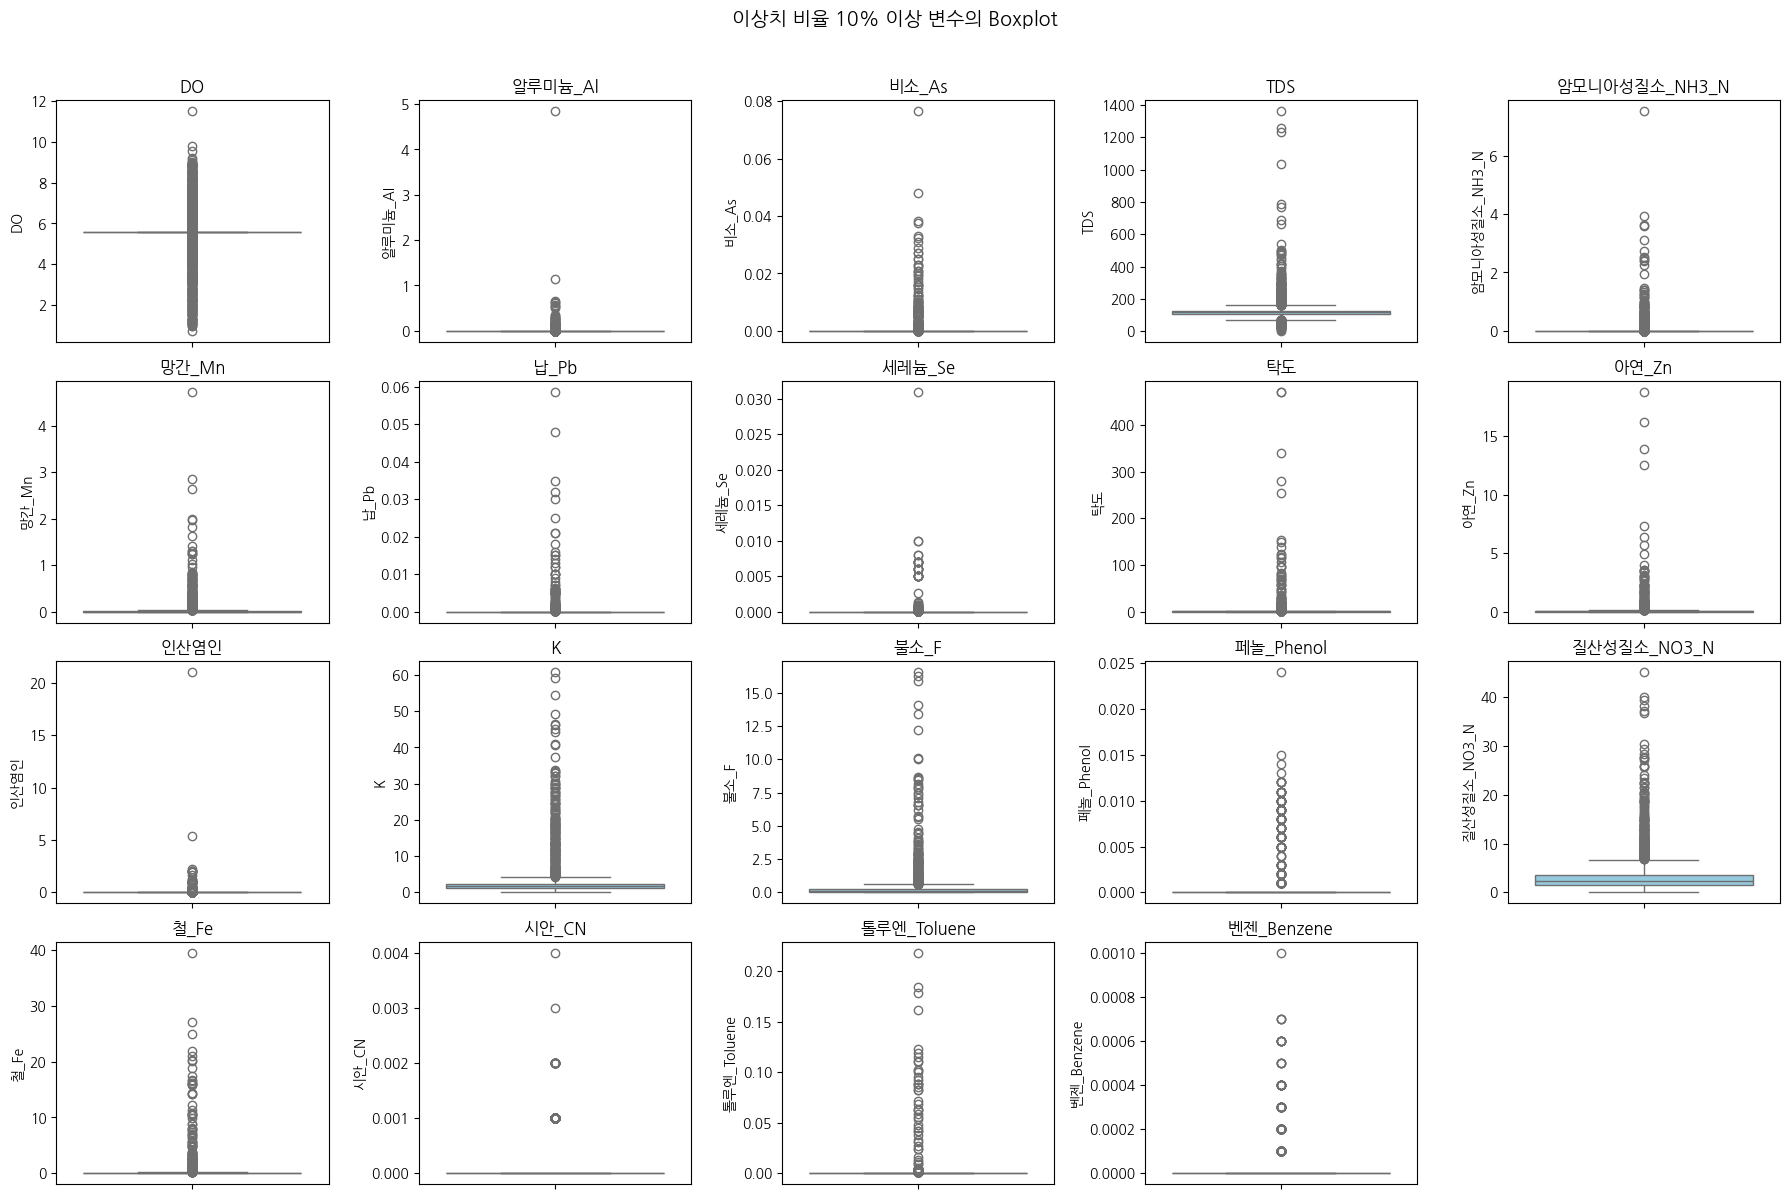

In [ ]:
# 이상치 비율 10% 이상 변수
top_cols = outlier_df[outlier_df['이상치 비율(%)'] >= 10]['변수명3'].tolist()

# Boxplot 시각화
plt.figure(figsize=(18, 15)) # Increased figure height to accommodate 5 rows
for i, col in enumerate(top_cols, 1):
    plt.subplot(5, 5, i) # Changed grid to 5 rows and 5 columns
    sns.boxplot(y=df_filtered_gangwon[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("이상치 비율 10% 이상 변수의 Boxplot", fontsize=14)
plt.subplots_adjust(top=0.92) # Adjusted suptitle position
plt.show()

<이상치 10% 이상인 물질리스트>

- DO
- 알루미늄_Al
- 비소_As
- TDS
- 암모니아성질소_NH3_N
- 망간_Mn
- 납_Pb
- 세레늄_Se
- 탁도
- 아연_Zn
- 인산염인
- K
- 불소_F
- 페놀_Phenol
- 질산성질소_NO3_N
- 철_Fe
- 시안_CN
- 벤젠_Benzene

### 모델링

In [ ]:
cols = ['pH', 'Temp', 'EC', 'DO', 'TDS']
df_filtered_gangwon = df_filtered_gangwon.dropna(subset=cols, how='all')

for col in cols:
    df_filtered_gangwon[col] = pd.to_numeric(df_filtered_gangwon[col], errors='coerce')
    mean_val = df_filtered_gangwon[col].mean()
    df_filtered_gangwon[col].fillna(mean_val, inplace=True)

/tmp/ipython-input-121-398662585.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered_gangwon[col].fillna(mean_val, inplace=True)


In [ ]:
if 'pH' in df_filtered_gangwon.columns:
    df_filtered_gangwon['ph_score'] = df_filtered_gangwon['pH'].apply(get_pH_score)
if 'Temp' in df_filtered_gangwon.columns:
    df_filtered_gangwon['temp_score'] = df_filtered_gangwon['Temp'].apply(get_Temp_score)
if 'EC' in df_filtered_gangwon.columns:
    df_filtered_gangwon['ec_score'] = df_filtered_gangwon['EC'].apply(get_EC_score)
if 'DO' in df_filtered_gangwon.columns:
    df_filtered_gangwon['do_score'] = df_filtered_gangwon['DO'].apply(get_DO_score)
if 'TDS' in df_filtered_gangwon.columns:
    df_filtered_gangwon['tds_score'] = df_filtered_gangwon['TDS'].apply(get_TDS_score)

In [ ]:
df_filtered_gangwon['avg_score'] = df_filtered_gangwon[['ph_score', 'do_score', 'tds_score', 'ec_score', 'temp_score']].mean(axis=1)

def classify_label(avg_score):
    if avg_score <= 0.5:
        return 0  # 좋음
    elif avg_score <= 1.5:
        return 1  # 보통
    else:
        return 2  # 나쁨

df_filtered_gangwon['Water_Quality'] = df_filtered_gangwon['avg_score'].apply(classify_label)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

In [ ]:
X = df_filtered_gangwon[['알루미늄_Al',
 '비소_As',
 '암모니아성질소_NH3_N',
 '망간_Mn',
 '납_Pb',
 '세레늄_Se',
 '탁도',
 '아연_Zn',
 '페놀_Phenol',
 '철_Fe',
 '시안_CN',
 '톨루엔_Toluene',
 '벤젠_Benzene',
 'pH', 'DO', 'TDS', 'EC', 'Temp']]

y = df_filtered_gangwon['Water_Quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 선언
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42)
lgbm_clf = lgb.LGBMClassifier(verbose=-1, random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

voting = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('gbc', gbc)],
    voting='soft'
)

# 모델 정의
models = [
    ('RandomForest', rf),
    ('LogisticRegression', lr),
    ('KNN', knn),
    ('XGBoost', xgb_clf),
    ('LightGBM', lgbm_clf),
    ('GradientBoosting', gbc),
    ('SoftVoting', voting)
]

results = []

for name, model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc))

results.sort(key=lambda x: x[1], reverse=True)

print("모델 정확도 높은 순:")
for name, acc in results:
    print(f"{name}: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

모델 정확도 높은 순:
LightGBM: 0.9863
GradientBoosting: 0.9863
XGBoost: 0.9808
RandomForest: 0.9781
SoftVoting: 0.9753
LogisticRegression: 0.9260
KNN: 0.9123


- LightGBM & GradientBoosting 정확도가 0.9863으로 제일 높음

#### LightGBM

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# LightGBM 모델
lgbm_clf = lgb.LGBMClassifier(random_state=42, verbose=-1)

# 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
}

# GridSearchCV 설정
grid_lgb = GridSearchCV(
    estimator=lgbm_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# 모델 학습
grid_lgb.fit(X_train, y_train)

# 최적 파라미터 및 정확도 출력
print("Best LightGBM Parameters:", grid_lgb.best_params_)
print("Best CV Accuracy:", grid_lgb.best_score_)

# 테스트 정확도
best_lgbm = grid_lgb.best_estimator_
test_acc = accuracy_score(y_test, best_lgbm.predict(X_test))
print("Test Accuracy with Best Estimator:", test_acc)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best LightGBM Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'num_leaves': 15}
Best CV Accuracy: 0.991095890410959
Test Accuracy with Best Estimator: 0.9917808219178083


- 튜닝 후 성능 더 좋아짐

#### GradientBoosting

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# GridSearchCV 객체 생성
grid_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 모델 학습
grid_gb.fit(X_train, y_train)

# 결과 출력
print("Best Parameters:", grid_gb.best_params_)
print("Best CV Accuracy:", grid_gb.best_score_)

# 테스트 세트 정확도
best_gb = grid_gb.best_estimator_
test_acc = accuracy_score(y_test, best_gb.predict(X_test))
print("Test Accuracy with Best Estimator:", test_acc)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
Best CV Accuracy: 0.9890410958904109
Test Accuracy with Best Estimator: 0.989041095890411


- 튜닝 후 성능 좋아짐
- 하지만 LightGBM 성능보다 낮음

#### 피처 중요도 확인

- LightGBM

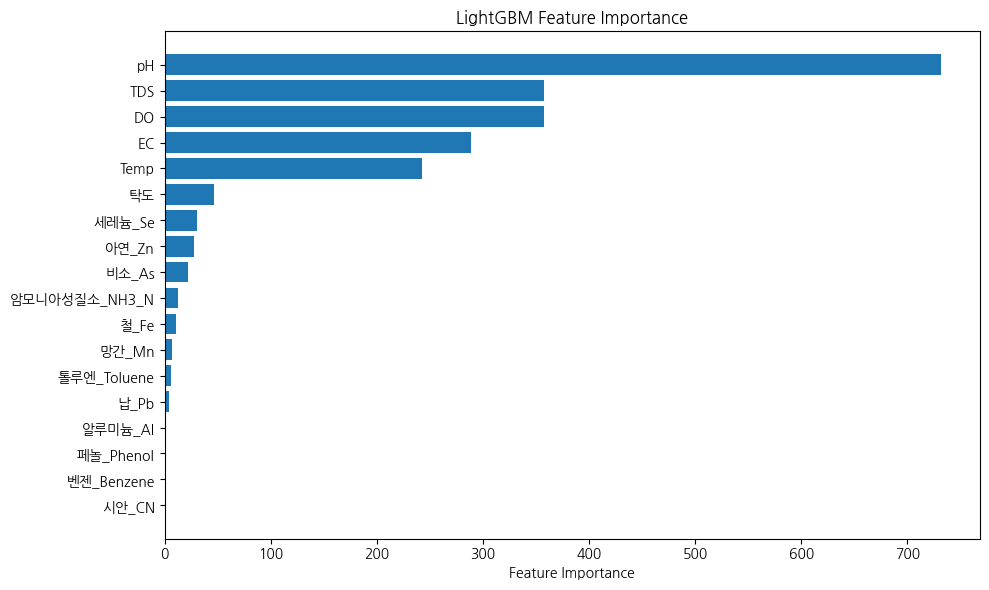

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# feature importance 가져오기
importances = best_lgbm.feature_importances_
features = np.array(X.columns)

# 중요도 기준 내림차순 정렬
sorted_idx = np.argsort(importances)[::-1]
sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### [해석]

1. 상위 주요 변수: pH, TDS, DO, EC, Temp, 탁도

해석:  
- pH(수소이온 농도): 강원도의 석회암 기반 지질로 인해 높은 경향. 이는 중금속의 용출 가능성과 직결됨  
- TDS, EC: 지하수의 전반적인 오염 정도와 경도, 농업·산업용수로의 적합도를 판단하는 핵심 지표  
- DO: 유기물 분해 및 금속 산화에 영향을 미치며, 부족 시 금속 용출을 유발하는 혐기성 환경으로 전환됨  
- Temp: 수온은 생물학적 반응성과 용존산소 농도를 결정하며, 오염원 유입 시 간접적인 변화 감지 가능  
- 탁도: 표토 침식, 암반 파쇄, 인위적 교란 등으로 상승하며, DO 및 중금속과 밀접한 변동 관계를 가짐

2. 중간 주요 변수: 세레늄_Se, 아연_Zn, 비소_As, 암모니아성질소_NH3_N, 철_Fe, 망간_Mn

해석:  
- 세레늄(Se): 자연기원 또는 산업 배출로 유입, 과잉 시 독성 유발  
- 아연(Zn): 공업용 배출, 관정 부식 등에서 발생. 고농도는 급성 독성을 가짐  
- 비소(As): 광물 용출, 농약 잔류 등으로 유입되며, 1급 발암물질로 장기 노출 시 심각한 건강 문제 유발  
- 암모니아성질소(NH3-N): 유기물 분해 부산물로, 오수나 분뇨 침투 시 상승하며 마시는 물에서는 오염 가능성 지표  
- 철(Fe), 망간(Mn): 지질기반에서 자연적으로 용출되나 고농도일 경우 색·취·이취 유발 및 배관 문제 야기





### [정책 제안]

1. 배경 및 필요성  
강원도는 산악 지형이 많고 강수량이 풍부하여 지하수가 생활용수, 농업용수, 공업용수 등 다양한 목적으로 광범위하게 활용되고 있다.  
그러나 최근 국립환경과학원의 표본조사 결과, 강원도 원주, 홍천 등 일부 지역에서 지하수의 수질이 법적 기준을 초과하여 부적합 판정을 받은 사례가 확인되었다.  
특히 이들 지역의 지하수에서는 비소(As)가 다량 검출되었는데, 이는 인체에 매우 유해한 1급 발암물질로 분류되며, 장기간 섭취 시 피부병, 암, 신경계 장애 등을 유발할 수 있어 신속하고 체계적인 대응이 필요하다.  
비소 외에도 중금속 및 유기화합물 등 다양한 독성 오염물질이 지하수에 유입될 가능성이 있으며, 특히 산업체 주변, 농경지, 폐광 지역 등 오염원 상류 지역은 지하수 오염에 취약한 구조를 가지고 있다.  
따라서 오염물질의 원천 차단과 지속적인 모니터링 체계가 절실히 요구된다.

2. 정책 제안

2-1. 오염 취약 지역 전수조사

목표:  
지하수 오염 가능성이 높은 지역의 실태 파악 및 지도화

- 내용:  
중금속 농도, 토양 특성, 유속 흐름, 지하수 유입 경로 등 정밀 조사

- 세부:  
조사 결과 기반으로 GIS 시스템을 통해 오염 우려 지역 시각화

- 추진:  
환경부-지자체 협업 하에 조사단 구성 및 단계별 지역조사 시행

2-2. 중금속 배출 산업체 관리 강화

목표:  
산업체에서의 오염 유입 원천 차단

- 내용:  
수질 및 배출물 정기 점검, 기준 초과 시 행정처분

- 세부:  
오염방지시설 설치 의무화 및 기술·재정 지원 병행

- 추진:  
중소기업 대상 오염 저감 설비 도입을 위한 지원 프로그램 운영

2-3. 공학적 유입 차단 조치 시행

목표:  
지질학적으로 취약 지역에서의 물리적 차단 확보

- 내용:  
방수층, 차단벽, 차집 배수시설 등 설치

- 세부:  
침출수 유입 우려 지역에 물리적·자연기반 시설 동시 도입

- 추진:  
환경 전문기관의 설계·시공 주도로 시범사업 후 전국 확대

3. 기대효과

1) 지하수 수질 개선 및 지속가능한 수자원 관리  
- 오염원 차단과 지속적인 모니터링 체계 구축으로 지하수 고갈 및 오염 방지  
- 청정 수자원 보존을 통해 향후 물 부족 문제 대응 기반 확보

2) 정책 신뢰성과 지역경제 안정화  
- 주민이 신뢰할 수 있는 과학 기반의 환경 정책 실행으로 지역사회와의 갈등 최소화  
- 안전한 지하수 확보로 인해 농업·관광·주거 등 지역경제 활동에 긍정적 영향


# **충청북도**

In [ ]:
sido_dfs['충청북도']
# csv로 저장
sido_dfs['충청북도'].to_csv('충청북도.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_chungbuk = pd.read_csv("충청북도.csv")
df_chungbuk.head()

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2021.0,충청북도,단양군,가곡면,충주댐,f,NaN,8.24,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2021.0,충청북도,단양군,가곡면,충주댐,g,NaN,8.58,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,2021.0,충청북도,단양군,가곡면,충주댐,f,NaN,8.04,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,2021.0,충청북도,단양군,가곡면,충주댐,f,NaN,8.29,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,2021.0,충청북도,단양군,가곡면,충주댐,g,NaN,8.20,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_chungbuk.isnull().sum().sort_values(ascending=True)

,0
연도,0
시도,0
시군구,0
읍면동,0
MW_NAME,0
...,...
유기인,436
NH4,436
NH4_N,436
SiO2,436


null 값 상위 30% 칼럼 모두 제외

In [ ]:
numeric_df2 = df_chungbuk.select_dtypes(include=['number'])

# 전체 행 수 기준으로 30% 이상 결측치가 있는 칼럼 찾기
threshold2 = len(df_chungbuk) * 0.3

# 수치형 칼럼 중 결측치 수가 30% 이상인 칼럼 이름 추출
cols_to_drop2 = numeric_df2.columns[numeric_df2.isnull().sum() >= threshold2]

# 원본 df_gangwon에서 해당 칼럼 제거
df_filtered_chungbuk = df_chungbuk.drop(columns=cols_to_drop2)

30% 제외한 컬럼에서 수치형 변수의 null 값은 중앙값으로 대체

In [ ]:
# 수치형 칼럼만 선택
numeric_cols2 = df_filtered_chungbuk.select_dtypes(include=['number']).columns

# 수치형 칼럼의 null값을 해당 칼럼의 중앙값으로 대체
df_filtered_chungbuk[numeric_cols2] = df_filtered_chungbuk[numeric_cols2].fillna(df_filtered_chungbuk[numeric_cols2].median())

df_filtered_chungbuk

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,pH,Ca,Mg,Na,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2021.0,충청북도,단양군,가곡면,충주댐,f,8.24,9.9,5.7,6.9,...,False,False,False,False,False,False,False,False,False,False
1,2021.0,충청북도,단양군,가곡면,충주댐,g,8.58,20.2,23.2,4.8,...,False,False,False,False,False,False,False,False,False,False
2,2021.0,충청북도,단양군,가곡면,충주댐,f,8.04,14.4,14.4,10.6,...,False,False,False,False,False,False,False,False,False,False
3,2021.0,충청북도,단양군,가곡면,충주댐,f,8.29,11.4,12.2,45.0,...,False,False,False,False,False,False,False,False,False,False
4,2021.0,충청북도,단양군,가곡면,충주댐,g,8.20,13.2,8.4,9.1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2021.0,충청북도,단양군,적성면,충주댐,g,7.50,23.4,3.3,16.6,...,False,False,False,False,False,False,False,False,False,False
432,2021.0,충청북도,단양군,적성면,충주댐,g,7.75,20.1,1.6,1.4,...,False,False,False,False,False,False,False,False,False,False
433,2021.0,충청북도,단양군,적성면,충주댐,g,7.65,15.7,1.3,1.6,...,False,False,False,False,False,False,False,False,False,False
434,2021.0,충청북도,단양군,적성면,충주댐,g,7.46,24.2,40.2,9.5,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# csv로 저장
df_filtered_chungbuk.to_csv('df_filtered_chungbuk.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_filtered_chungbuk.describe()

,연도,pH,Ca,Mg,Na,K,HCO3,Cl,SO4,NO3,...,탁도,염소이온_Cl_,사염화탄소,과망간산칼륨소비량,벤젠_Benzene,테트라클로로에틸렌,1_2_디브로모_3_클로로프로판,스트론튬,브롬,이산화질소
count,436.0,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,...,436.000000,436.000000,436.0,436.000000,436.0,436.0,436.0,436.000000,436.000000,436.0
mean,2021.0,7.569702,16.500000,17.155046,11.155963,1.920872,93.069495,12.334862,19.490826,20.074083,...,1.171881,12.334862,0.0,1.438257,0.0,0.0,0.0,0.422507,0.060908,0.0
std,0.0,0.458265,10.895411,16.038830,20.249629,2.155954,72.101648,21.882179,27.401693,17.760990,...,10.158878,21.882179,0.0,0.733332,0.0,0.0,0.0,1.148102,0.182385,0.0
min,2021.0,6.090000,0.100000,0.100000,0.300000,0.100000,1.200000,1.600000,2.000000,0.640000,...,0.030000,1.600000,0.0,0.310000,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,2021.0,7.390000,9.275000,4.100000,1.600000,0.700000,29.300000,4.200000,9.000000,10.522500,...,0.130000,4.200000,0.0,0.970000,0.0,0.0,0.0,0.135750,0.000000,0.0
50%,2021.0,7.600000,18.600000,12.050000,4.100000,1.300000,75.600000,6.600000,15.000000,15.600000,...,0.190000,6.600000,0.0,1.310000,0.0,0.0,0.0,0.187000,0.000000,0.0
75%,2021.0,7.802500,22.500000,28.225000,10.800000,2.400000,136.600000,12.525000,24.000000,23.212500,...,0.320000,12.525000,0.0,1.687500,0.0,0.0,0.0,0.258000,0.000000,0.0
max,2021.0,9.730000,165.700000,143.500000,175.200000,18.300000,444.100000,307.300000,477.000000,192.400000,...,198.000000,307.300000,0.0,5.950000,0.0,0.0,0.0,14.640000,1.035000,0.0


### 이상치

In [ ]:
# 이상치 탐지 함수 (IQR 기준)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [ ]:
# 전체 수치형 변수에서 이상치 탐지
numeric_cols2 = df_filtered_chungbuk.select_dtypes(include='number').columns

outlier_summary = []

for col in numeric_cols2:
    outliers, lower, upper = detect_outliers_iqr(df_filtered_chungbuk, col)
    outlier_count = len(outliers)
    total_count = df_filtered_chungbuk[col].count()
    outlier_ratio = outlier_count / total_count if total_count != 0 else 0
    outlier_summary.append({
        '변수명4': col,
        '전체값 개수': total_count,
        '이상치 개수': outlier_count,
        '이상치 비율(%)': round(outlier_ratio * 100, 2)
    })

# DataFrame으로 정리
outlier_df = pd.DataFrame(outlier_summary).sort_values(by='이상치 비율(%)', ascending=False)
outlier_df.head(60)

,변수명4,전체값 개수,이상치 개수,이상치 비율(%)
47,스트론튬,436,64,14.68
24,불소_F,436,58,13.30
39,아연_Zn,436,55,12.61
40,탁도,436,50,11.47
20,망간_Mn,436,49,11.24
48,브롬,436,48,11.01
4,Na,436,46,10.55
1,pH,436,35,8.03
11,수소이온농도_pH,436,35,8.03
10,NO3_N,436,34,7.80


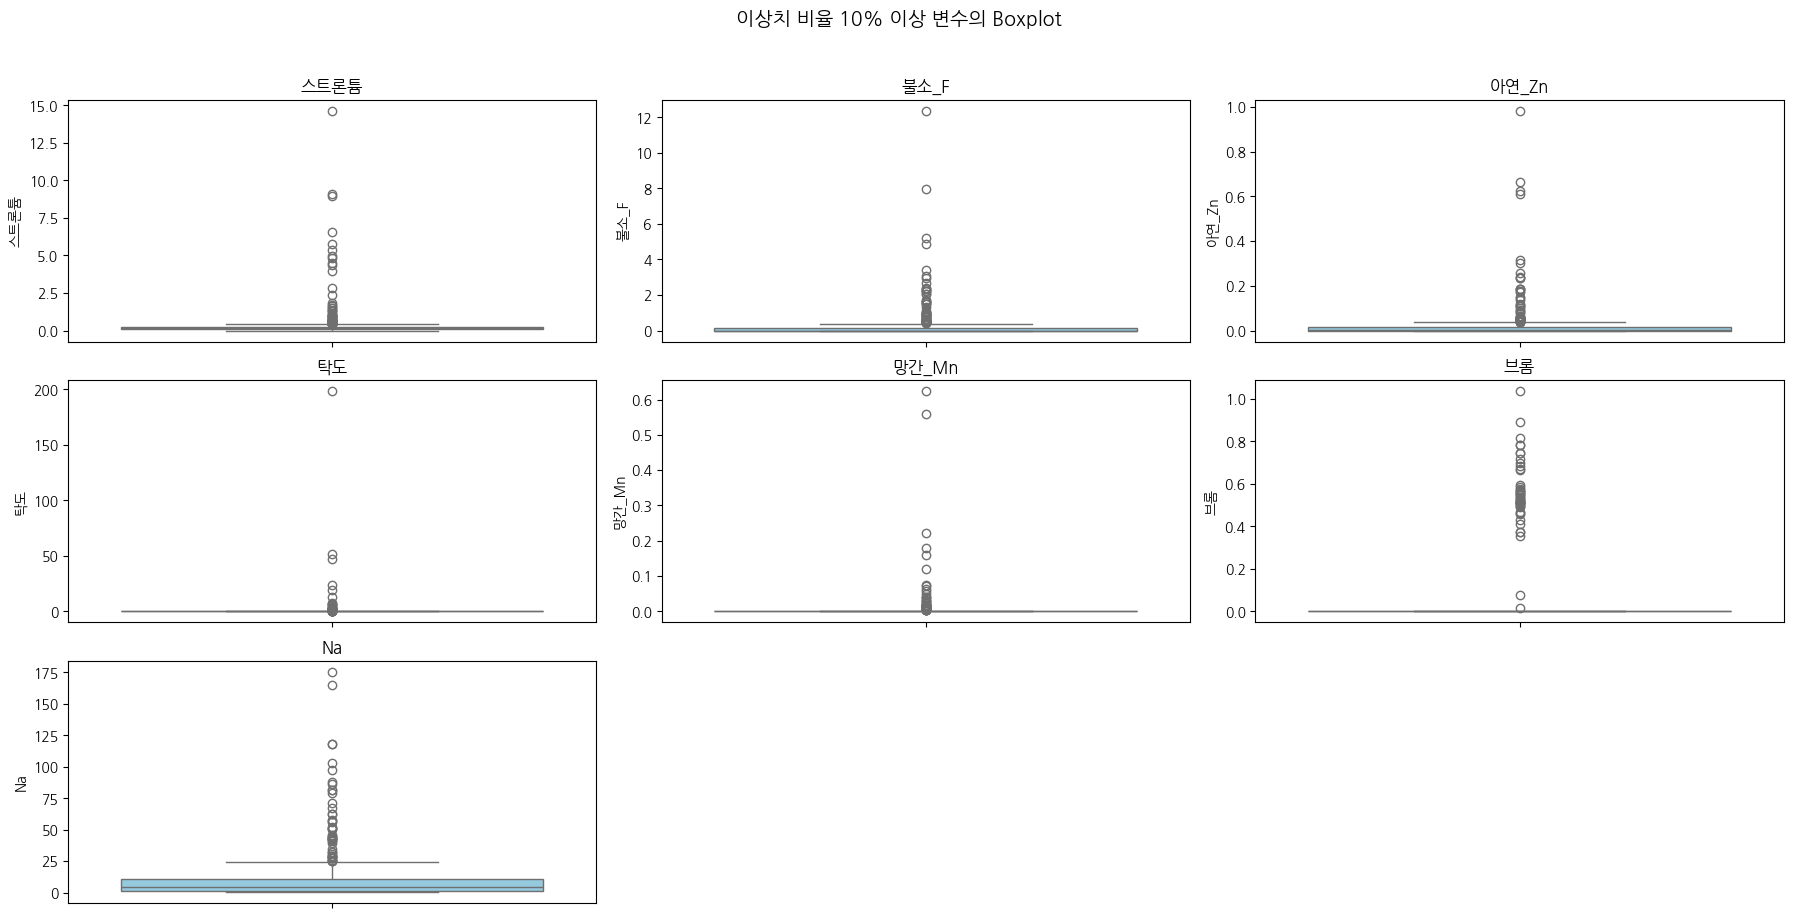

In [ ]:
# 이상치 비율 10% 이상 변수
top_cols = outlier_df[outlier_df['이상치 비율(%)'] >= 10]['변수명4'].tolist()

# Boxplot 시각화
plt.figure(figsize=(18, 15))
for i, col in enumerate(top_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df_filtered_chungbuk[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("이상치 비율 10% 이상 변수의 Boxplot", fontsize=14)
plt.subplots_adjust(top=0.92)
plt.show()

<이상치 10% 이상인 물질리스트>
- 스트론튬
- 불소_F
- 아연_Zn
- 탁도
- 망간_Mn
- 브롬
- Na


### 모델링

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

In [ ]:
if 'pH' in df_filtered_chungbuk.columns:
    df_filtered_chungbuk['ph_score'] = df_filtered_chungbuk['pH'].apply(get_pH_score)

In [ ]:
df_filtered_chungbuk['avg_score'] = df_filtered_chungbuk[['ph_score']].mean(axis=1)

def classify_label(avg_score):
    if avg_score <= 0.5:
        return 0  # 좋음
    elif avg_score <= 1.5:
        return 1  # 보통
    else:
        return 2  # 나쁨

df_filtered_chungbuk['Water_Quality'] = df_filtered_chungbuk['avg_score'].apply(classify_label)

In [ ]:
X = df_filtered_chungbuk[['스트론튬', '불소_F', '아연_Zn', '탁도', '망간_Mn', '브롬', 'Na','pH']]

y = df_filtered_chungbuk['Water_Quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 선언
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42)
lgbm_clf = lgb.LGBMClassifier(verbose=-1, random_state=42)

voting = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('gbc', gbc)],
    voting='soft'
)

# 모델 정의
models = [
    ('RandomForest', rf),
    ('LogisticRegression', lr),
    ('KNN', knn),
    ('XGBoost', xgb_clf),
    ('LightGBM', lgbm_clf),
    ('SoftVoting', voting)
]

results = []

for name, model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc))

results.sort(key=lambda x: x[1], reverse=True)

print("모델 정확도 높은 순:")
for name, acc in results:
    print(f"{name}: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

모델 정확도 높은 순:
XGBoost: 0.9886
LightGBM: 0.9886
RandomForest: 0.9773
SoftVoting: 0.9773
LogisticRegression: 0.9659
KNN: 0.9659


- XGBoost & LightGBM이 정확도 0.9886으로 가장 높음

#### LightGBM

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# LightGBM 모델 선언
lgbm_clf = lgb.LGBMClassifier(random_state=42, verbose=-1)

# 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
}

# GridSearchCV 설정
grid_lgb = GridSearchCV(
    estimator=lgbm_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# 모델 학습
grid_lgb.fit(X_train, y_train)

# 최적 파라미터 및 정확도 출력
print("Best LightGBM Parameters:", grid_lgb.best_params_)
print("Best CV Accuracy:", grid_lgb.best_score_)

# 테스트 정확도
best_lgbm = grid_lgb.best_estimator_
test_acc = accuracy_score(y_test, best_lgbm.predict(X_test))
print("Test Accuracy with Best Estimator:", test_acc)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best LightGBM Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 15}
Best CV Accuracy: 0.9914285714285714
Test Accuracy with Best Estimator: 0.9659090909090909


- 원래 성능이 더 좋음

#### XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42)

# 튜닝할 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# 학습
grid_search.fit(X_train, y_train)

# 최적 파라미터, 최고 점수 출력
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# 최적 모델로 테스트셋 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Estimator:", test_acc)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
Best CV Accuracy: 0.9913871635610766
Test Accuracy with Best Estimator: 0.9886363636363636


- 원래 성능과 동일

#### 피처 중요도 확인

- XGBoost

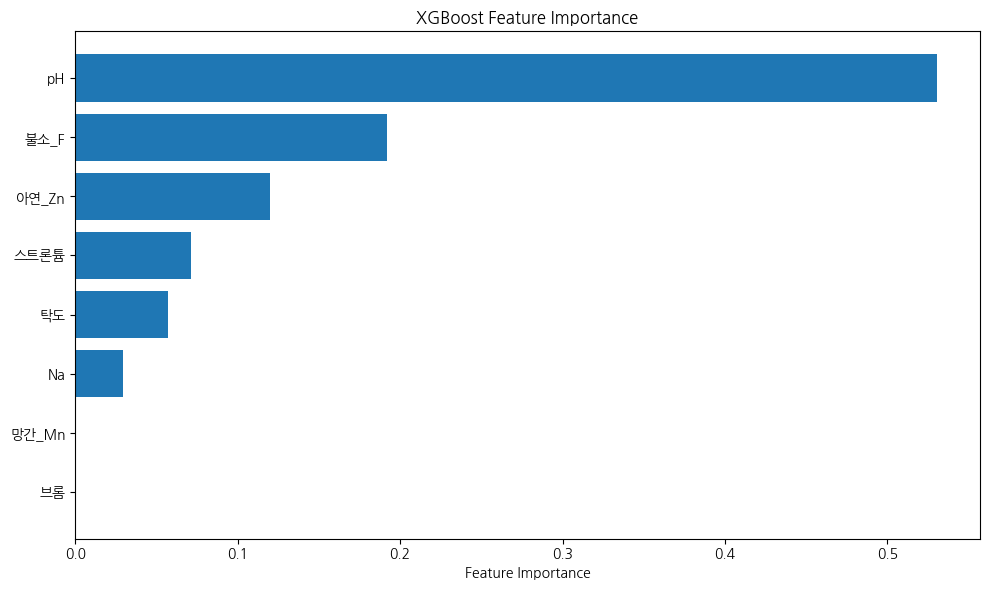

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# feature importance 가져오기
importances = best_model.feature_importances_
features = np.array(X.columns)

# 중요도 기준 내림차순 정렬
sorted_idx = np.argsort(importances)[::-1]
sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### [해석]

1. 상위 주요 변수: pH, 불소_F, 아연_Zn

해석:  
- pH(수소이온 농도): 수소이온 농도는 지하수 내 모든 물질의 용해도와 생물학적 영향에 직접적으로 영향을 미친다  
- 불소_F: 적정 농도에서는 치아 보호 효과가 있지만, 과잉 노출 시 골격 형성 장애 및 만성 중독 가능성이 존재한다  
- 아연_Zn: 농업 및 산업 활동과 관련된 배출원에서 유래 가능. 고농도에서는 위장 질환 등 인체에 해로운 영향을 미친다

2. 중간 주요 변수: 스트론튬, 탁도, Na

해석:  
- 스트론튬: 충청북도의 석회암 기반 지질과 연관되어 자연 용출 가능성이 있음. 뼈에 축적될 수 있어 주의 필요  
- 탁도: 물속 부유물 및 미생물 농도 증가의 지표로, 정수시설 부족, 토양 유실, 침투수 유입 가능성과 연관됨  
- Na(나트륨): 도로 제설제 사용, 폐수 침투 등 인위적 활동의 영향을 받을 수 있으며, 고농도일 경우 심혈관계 문제 유발 가능





### [정책 제안]

1. 배경 및 필요성  
충청북도는 내륙 산지와 광산 지역이 혼재된 지형적 특성으로 인해 지하수가 주요 수자원으로 활용되고 있다.  
그러나 최근 지하수에서 아연(Zn), 스트론튬, 나트륨(Na) 등 중금속 및 비금속류가 기준치를 초과해 검출되는 사례가 보고되고 있으며, 이는 인체 건강과 농업·산업 활동에 심각한 영향을 미칠 수 있다.  
특히 이러한 오염은 지질학적 원인과 인위기원(농업, 산업활동, 폐광 등)이 복합적으로 작용할 가능성이 높기 때문에 단순 수질 모니터링만으로는 원인을 규명하거나 효과적인 대응이 어렵다.  
따라서 정밀한 지질조사와 공간정보 기반의 오염 분포 분석(GIS)이 병행된 정책적 대응이 필요하다.

2. 정책 제안  
정책명: 중금속 및 비금속류 정밀 지질조사 및 오염지도 구축

2-1. 지하수–지질 연동조사 실시

목표:  
지질학적 요인을 고려한 오염원 과학적 규명

- 내용:  
아연, 스트론튬, 나트륨 등 농도 높은 지역 중심으로 지질 특성 분석

- 세부:  
암반 종류, 광물 조성, 수리지질 특성을 통합적으로 조사

- 추진:  
국가지질정보, 환경부, 지역대학과 협력한 현장 중심 조사단 구성

2-2. GIS 기반 중금속 분포 밀도 지도 제작

목표:  
오염분포의 공간적 시각화 및 원인 분석

- 내용:  
수질 데이터와 지리정보(GIS)를 연계한 오염도 지도 제작

- 세부:  
농업지대, 산업단지, 폐광지역과의 위치 관계 분석 및 시각화

- 추진:  
환경공단 및 지자체 GIS 전문가 참여로 정밀 시각화 추진

2-3. 조사 대상 지역의 우선순위 설정

목표:  
한정된 자원의 효율적 배분

- 내용:  
폐광지대, 산업단지 인근, 농약 사용 빈도 높은 농촌 지역 우선 조사

- 세부:  
오염취약성 평가 기반의 단계적 조사 및 모니터링 체계 수립

- 추진:  
조사대상 지역 사전 분류 및 연차별 예산계획 수립

3. 기대효과

1) 과학적·지속가능한 수질 관리 체계 구축  
- 지질과 수질 연계 데이터를 바탕으로 원인을 명확히 규명하고, 근본적인 수질 개선 정책 수립 가능

2) 주민 건강 및 농업·산업 보호  
- 음용수 안전 확보, 작물 성장 피해 예방 등으로 지역사회 건강성과 산업생산성 모두 보호

3) 정책 신뢰도 및 공공데이터 활용도 제고  
- 수집된 조사 결과와 GIS 기반 지도는 행정정책, 학술연구, 시민 데이터 접근에 모두 활용 가능


# **충청남도**

In [ ]:
sido_dfs['충청남도']
# csv로 저장
sido_dfs['충청남도'].to_csv('충청남도.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_chungnam=pd.read_csv('충청남도.csv')

null 값 상위 30% 칼럼 모두 제외


In [ ]:
numeric_df = df_chungnam.select_dtypes(include=['number'])

# 전체 행 수 기준으로 30% 이상 결측치가 있는 컬럼
threshold = len(df_chungnam) * 0.3

# 수치형 컬럼 중 결측치 수가 30% 이상인 컬럼 이름 추출
cols_to_drop = numeric_df.columns[numeric_df.isnull().sum() >= threshold]

# 원본 df_seoul에서 해당 컬럼 제거
df_filtered_chungnam = df_chungnam.drop(columns=cols_to_drop)

30% 제외한 컬럼에서 수치형 변수의 null 값은 중앙값으로 대체

In [ ]:
# 수치형 컬럼만 선택
numeric_cols = df_filtered_chungnam.select_dtypes(include='number').columns

# 수치형 컬럼의 null 값을 해당 컬럼의 중앙값으로 대체
df_filtered_chungnam[numeric_cols] = df_filtered_chungnam[numeric_cols].fillna(df_filtered_chungnam[numeric_cols].median())

df_filtered_chungnam

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Ca,Mg,Na,K,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2019.0,충청남도,청양군,대치면,공주수위표,h-2,16.5346,4.168130,7.84298,0.000000,...,False,False,True,False,False,False,False,False,False,False
1,2019.0,충청남도,청양군,대치면,공주수위표,h-2,23.1126,0.422577,5.67319,0.000000,...,False,False,True,False,False,False,False,False,False,False
2,2019.0,충청남도,청양군,목면,공주수위표,f,80.1696,18.147300,48.08410,0.000000,...,False,False,True,False,False,False,False,False,False,False
3,2019.0,충청남도,청양군,운곡면,삽교천,a,65.4124,28.957300,23.77620,0.372823,...,False,False,True,False,False,False,False,False,False,False
4,2019.0,충청남도,청양군,운곡면,삽교천,f,26.5830,8.210660,11.00440,0.462328,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2019.0,충청남도,금산군,부리면,영동천,e-2,54.4889,8.277240,27.11990,0.000000,...,False,False,False,False,False,False,False,False,False,False
536,2019.0,충청남도,금산군,부리면,영동천,e-2,13.9827,0.988093,11.77060,0.000000,...,False,False,False,False,False,False,False,False,False,False
537,2019.0,충청남도,금산군,부리면,영동천,e-1,54.6969,10.848800,15.51530,0.000000,...,False,False,False,False,False,False,False,False,False,False
538,2019.0,충청남도,금산군,부리면,영동천,e-1,33.3593,2.514510,21.36140,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# csv로 저장
df_filtered_chungnam.to_csv('df_filtered_chungnam.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_filtered_chungnam.describe()

,연도,Ca,Mg,Na,K,HCO3,Cl,SO4,NO3,Fe,...,사염화탄소,과망간산칼륨소비량,벤젠_Benzene,테트라클로로에틸렌,1_2_디브로모_3_클로로프로판,스트론튬,인산염인,아질산이온,브롬,이산화질소
count,540.0,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,540.0,540.000000,540.000000,5.400000e+02,540.0,540.000000,540.0,540.000000,540.0,540.0
mean,2019.0,28.127761,5.199612,12.096209,0.095655,83.175806,17.046272,11.138462,14.517037,0.208080,...,0.0,2.138374,0.000004,1.851852e-07,0.0,0.272019,0.0,0.002296,0.0,0.0
std,0.0,16.313672,4.724372,8.748653,0.256029,50.017378,16.999423,9.980733,16.196970,1.495508,...,0.0,2.559695,0.000018,4.303315e-06,0.0,0.319250,0.0,0.035324,0.0,0.0
min,2019.0,1.517633,0.000000,1.513912,0.000000,1.939402,1.782800,0.647600,0.000000,0.003900,...,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.0
25%,2019.0,17.246250,2.083065,7.860732,0.000000,50.227694,7.827075,5.610400,4.800000,0.029350,...,0.0,1.073300,0.000000,0.000000e+00,0.0,0.110000,0.0,0.000000,0.0,0.0
50%,2019.0,24.636700,4.296905,10.354200,0.000000,73.149974,13.214000,8.403700,10.000000,0.045700,...,0.0,1.900000,0.000000,0.000000e+00,0.0,0.170000,0.0,0.000000,0.0,0.0
75%,2019.0,33.756600,6.743132,14.170525,0.000000,101.751513,20.582525,13.468650,18.225000,0.071175,...,0.0,2.400000,0.000000,0.000000e+00,0.0,0.310000,0.0,0.000000,0.0,0.0
max,2019.0,109.269000,40.098500,143.329600,1.915570,502.600000,185.520500,96.037000,126.800000,28.500000,...,0.0,32.900000,0.000100,1.000000e-04,0.0,3.450000,0.0,0.630000,0.0,0.0


### 이상치

In [ ]:
# 이상치 탐지 함수 정의 (IQR 기준)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [ ]:
# 전체 수치형 변수에서 이상치 탐지
numeric_cols = df_filtered_chungnam.select_dtypes(include='number').columns

outlier_summary = []

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df_filtered_chungnam, col)
    outlier_count = len(outliers)
    total_count = df_filtered_chungnam[col].count()
    outlier_ratio = outlier_count / total_count if total_count != 0 else 0
    outlier_summary.append({
        '변수명5': col,
        '전체값 개수': total_count,
        '이상치 개수': outlier_count,
        '이상치 비율(%)': round(outlier_ratio * 100, 2)
    })

# DataFrame으로 정리
outlier_df = pd.DataFrame(outlier_summary).sort_values(by='이상치 비율(%)', ascending=False)
outlier_df.head(20)

,변수명5,전체값 개수,이상치 개수,이상치 비율(%)
27,톨루엔_Toluene,540,116,21.48
4,K,540,107,19.81
21,디클로로메탄_Dichlomethans,540,101,18.70
14,비소_As,540,94,17.41
10,Mn,540,90,16.67
34,6가크롬_Cr+6,540,87,16.11
22,망간_Mn,540,84,15.56
24,암모니아성질소_NH3_N,540,83,15.37
41,아연_Zn,540,81,15.00
33,페놀_Phenol,540,80,14.81


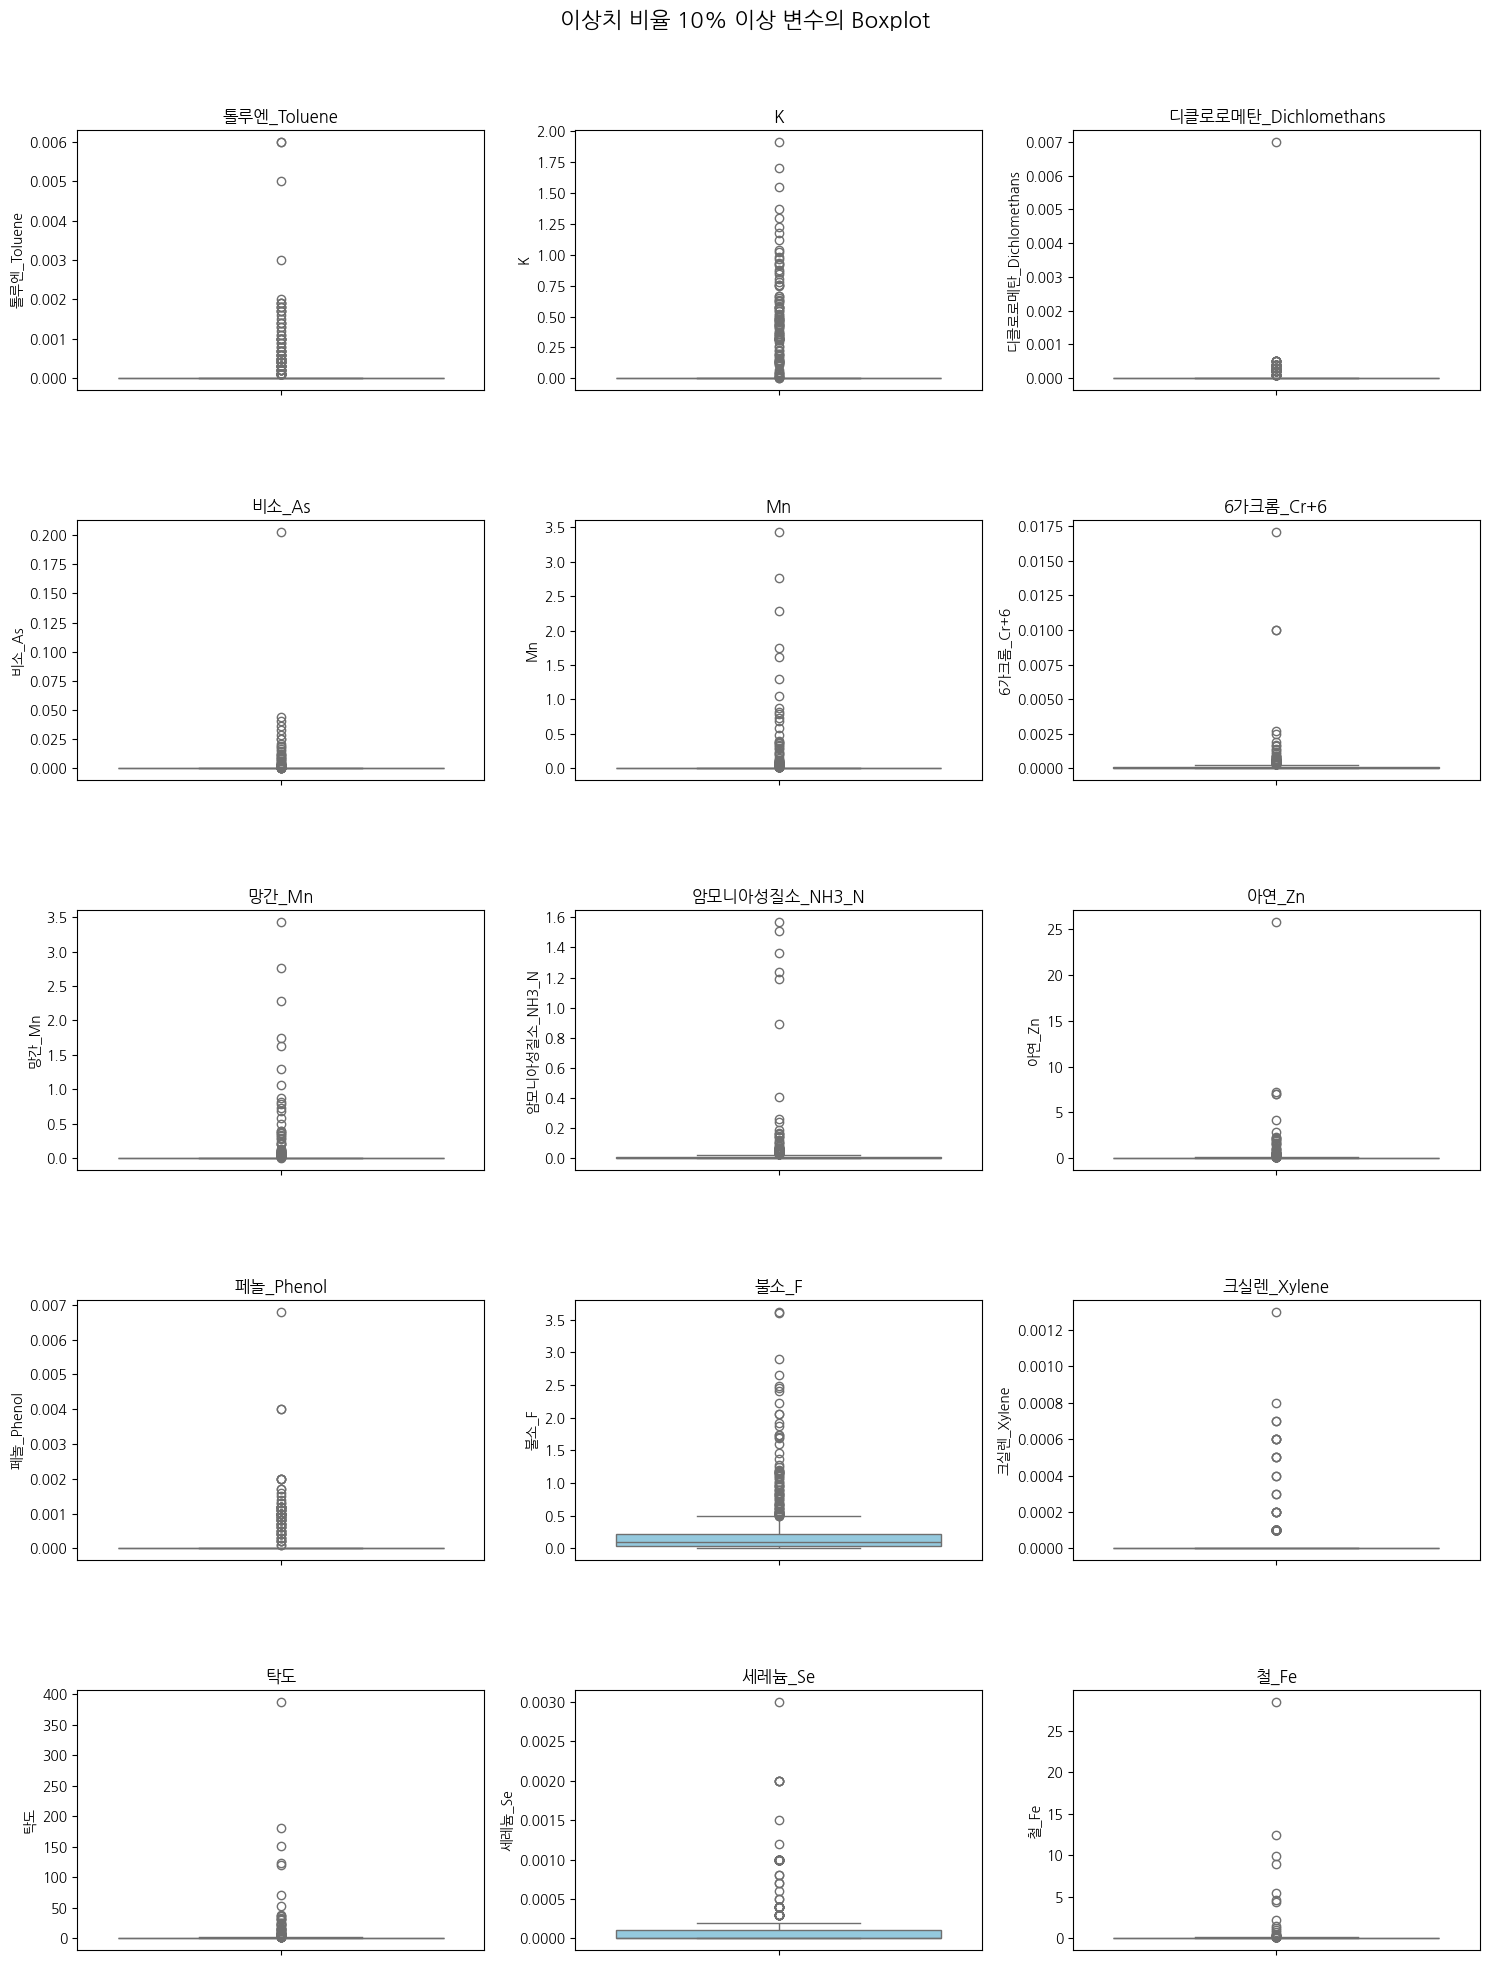

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# 이상치 비율 10% 이상 변수
top_cols = outlier_df[outlier_df['이상치 비율(%)'] >= 10]['변수명5'].tolist()

n_cols = 3
n_plots = len(top_cols)
n_rows = math.ceil(n_plots / n_cols)

# Boxplot 시각화
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(top_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_filtered_chungnam[col], color='skyblue')
    plt.title(col)

plt.suptitle("이상치 비율 10% 이상 변수의 Boxplot", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.5)
plt.show()

<이상치 10% 이상인 물질리스트>
- 톨루엔_Toluene
-  K
- 디클로로메탄_Dichlomethans
- 비소_As
- Mn
- 6가크롬_Cr+6
- 망간_Mn
- 암모니아성질소_NH3_N
- 아연_Zn
- 페놀_Phenol
- 불소_F
- 크실렌_Xylene
- 탁도
- 세레늄_Se
- 철_Fe

### 모델링

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 충청남도 데이터 사용
df_chungnam = df_filtered_chungnam.copy()

# pH 컬럼명 실제 이름: '수소이온농도_pH'
# 결측치 평균값으로 대체
df_chungnam['수소이온농도_pH'] = df_chungnam['수소이온농도_pH'].astype(float)
df_chungnam['수소이온농도_pH'] = df_chungnam['수소이온농도_pH'].fillna(df_chungnam['수소이온농도_pH'].mean())

# 점수 계산 및 label 컬럼 생성
df_chungnam['수질 등급'] = df_chungnam['수소이온농도_pH'].apply(get_pH_score)

# 결과 확인
print(df_chungnam[['수소이온농도_pH', '수질 등급']].head())

   수소이온농도_pH  수질 등급
0       7.22      0
1       8.74      1
2       6.99      0
3       7.19      0
4       5.21      2


In [ ]:
df_chungnam

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Ca,Mg,Na,K,...,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역,수질 등급
0,2019.0,충청남도,청양군,대치면,공주수위표,h-2,16.5346,4.168130,7.84298,0.000000,...,False,True,False,False,False,False,False,False,False,0
1,2019.0,충청남도,청양군,대치면,공주수위표,h-2,23.1126,0.422577,5.67319,0.000000,...,False,True,False,False,False,False,False,False,False,1
2,2019.0,충청남도,청양군,목면,공주수위표,f,80.1696,18.147300,48.08410,0.000000,...,False,True,False,False,False,False,False,False,False,0
3,2019.0,충청남도,청양군,운곡면,삽교천,a,65.4124,28.957300,23.77620,0.372823,...,False,True,False,False,False,False,False,False,False,0
4,2019.0,충청남도,청양군,운곡면,삽교천,f,26.5830,8.210660,11.00440,0.462328,...,False,True,False,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2019.0,충청남도,금산군,부리면,영동천,e-2,54.4889,8.277240,27.11990,0.000000,...,False,False,False,False,False,False,False,False,False,0
536,2019.0,충청남도,금산군,부리면,영동천,e-2,13.9827,0.988093,11.77060,0.000000,...,False,False,False,False,False,False,False,False,False,0
537,2019.0,충청남도,금산군,부리면,영동천,e-1,54.6969,10.848800,15.51530,0.000000,...,False,False,False,False,False,False,False,False,False,0
538,2019.0,충청남도,금산군,부리면,영동천,e-1,33.3593,2.514510,21.36140,0.000000,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
# 수치형 컬럼 자동 탐색
numeric_cols = df_chungnam.select_dtypes(include=[np.number]).columns.tolist()

# label과 pH 제외
feature_cols = [col for col in numeric_cols if col not in ['수질 등급', '수소이온농도_pH']]

# 결과 확인
print("사용 가능한 feature 컬럼들:", feature_cols)

사용 가능한 feature 컬럼들: ['연도', 'Ca', 'Mg', 'Na', 'K', 'HCO3', 'Cl', 'SO4', 'NO3', 'Fe', 'Mn', 'CO3', 'SiO2', '비소_As', '세레늄_Se', '알루미늄_Al', '페니트로티온', '수은_Hg', '카드뮴_Cd', '파라티온_Parathion', '디클로로메탄_Dichlomethans', '망간_Mn', '카바릴_Carbaryl', '암모니아성질소_NH3_N', '납_Pb', '불소_F', '톨루엔_Toluene', '에틸벤젠_Ethylbenzene', '철_Fe', '시안_CN', '크실렌_Xylene', '디클로로에틸렌_Dichloroethylene', '페놀_Phenol', '6가크롬_Cr+6', '질산성질소_NO3_N', '질산염', '트리클로로에탄_1_1_1_TCE', '황산이온_SO4_2', '다이아지논_Diazion', '트리클로로에틸렌_TCE', '아연_Zn', '탁도', '염소이온_Cl_', '사염화탄소', '과망간산칼륨소비량', '벤젠_Benzene', '테트라클로로에틸렌', '1_2_디브로모_3_클로로프로판', '스트론튬', '인산염인', '아질산이온', '브롬', '이산화질소']


In [ ]:
# 독립변수(X)와 종속변수(y) 정의
feature_cols = [
    '연도', 'Ca', 'Mg', 'Na', 'K', 'HCO3', 'Cl', 'SO4', 'NO3', 'Fe', 'Mn', 'CO3', 'SiO2',
    '비소_As', '세레늄_Se', '알루미늄_Al', '페니트로티온', '수은_Hg', '카드뮴_Cd', '파라티온_Parathion',
    '디클로로메탄_Dichlomethans', '망간_Mn', '카바릴_Carbaryl', '암모니아성질소_NH3_N', '납_Pb', '불소_F',
    '톨루엔_Toluene', '에틸벤젠_Ethylbenzene', '철_Fe', '시안_CN', '크실렌_Xylene', '디클로로에틸렌_Dichloroethylene',
    '페놀_Phenol', '6가크롬_Cr+6', '질산성질소_NO3_N', '질산염', '트리클로로에탄_1_1_1_TCE', '황산이온_SO4_2',
    '다이아지논_Diazion', '트리클로로에틸렌_TCE', '아연_Zn', '탁도', '염소이온_Cl_', '사염화탄소', '과망간산칼륨소비량',
    '벤젠_Benzene', '테트라클로로에틸렌', '1_2_디브로모_3_클로로프로판', '스트론튬', '인산염인', '아질산이온', '브롬', '이산화질소'
]

In [ ]:
# X, y 정의
X = df_chungnam[feature_cols].copy()
y = df_chungnam['수질 등급'].copy()

# 결측치 처리 (평균값으로 대체)
X = X.fillna(X.mean())

# 학습/검증 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings("ignore")

# 데이터 전처리 (Logistic Regression용 스케일링)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 사용할 모델 정의
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# 하이퍼파라미터 범위 정의
param_grids = {
    "Random Forest": {
        'n_estimators': randint(100, 300),
        'max_depth': randint(5, 30),
        'min_samples_split': randint(2, 10)
    },
    "Logistic Regression": {
        'C': uniform(0.01, 10),
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    }
}

# 학습 및 평가 함수
def tune_and_evaluate(models, param_grids, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f"\n [{name}] 튜닝 및 학습 중...")

        # 스케일된 데이터는 Logistic Regression에만 사용한다.
        X_train_used = X_train_scaled if name == "Logistic Regression" else X_train
        X_test_used = X_test_scaled if name == "Logistic Regression" else X_test

        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[name],
            n_iter=20,
            scoring='accuracy',
            cv=3,
            verbose=1,
            random_state=42,
            n_jobs=-1
        )

        search.fit(X_train_used, y_train)
        best_model = search.best_estimator_
        y_pred = best_model.predict(X_test_used)

        print(f" 정확도 (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print(" Classification Report:")
        print(classification_report(y_test, y_pred))

# 실행
tune_and_evaluate(models, param_grids, X_train, y_train, X_test, y_test)



 [Random Forest] 튜닝 및 학습 중...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
 정확도 (Accuracy): 0.6944
Confusion Matrix:
[[73  2  1]
 [20  1  0]
 [ 9  1  1]]
 Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82        76
           1       0.25      0.05      0.08        21
           2       0.50      0.09      0.15        11

    accuracy                           0.69       108
   macro avg       0.49      0.37      0.35       108
weighted avg       0.60      0.69      0.61       108


 [Logistic Regression] 튜닝 및 학습 중...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
 정확도 (Accuracy): 0.6852
Confusion Matrix:
[[71  3  2]
 [18  3  0]
 [11  0  0]]
 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        76
           1       0.50      0.14      0.22        21
           2       0.00      0.00      0.00        11

    a

#### RandomForest

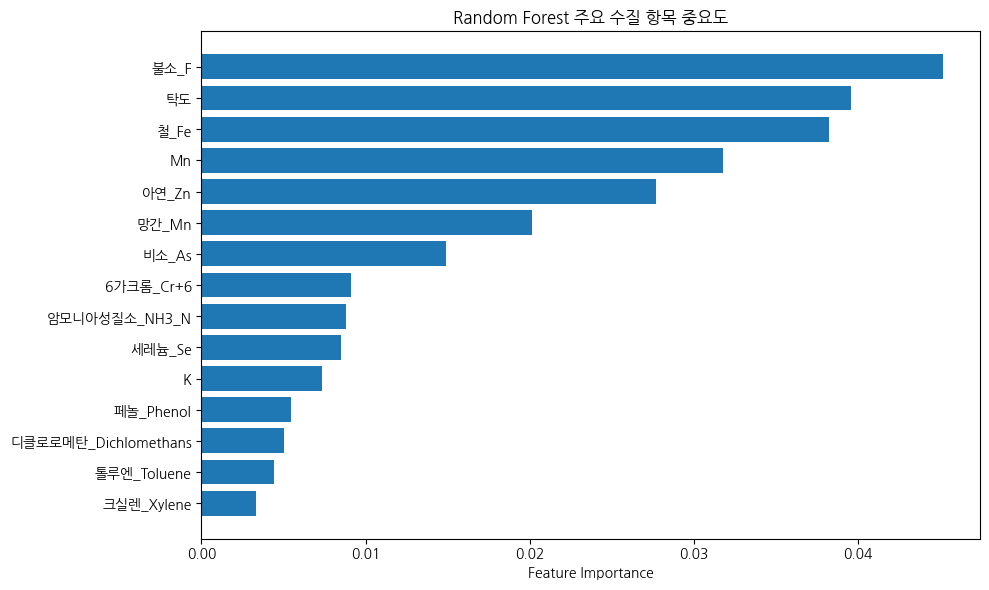

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 관심 있는 변수 리스트
important_features = [
    '수소이온농도_pH','톨루엔_Toluene', 'K', '디클로로메탄_Dichlomethans', '비소_As', 'Mn', '6가크롬_Cr+6', '망간_Mn', '암모니아성질소_NH3_N', '아연_Zn', '페놀_Phenol',
    '불소_F', '크실렌_Xylene', '탁도', '세레늄_Se', '철_Fe'
]

# Random Forest 모델 훈련
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 중요도 추출
importances = rf_model.feature_importances_
features = np.array(X_train.columns)

# 관심 피처만 필터링
mask = np.isin(features, important_features)
filtered_features = features[mask]
filtered_importances = importances[mask]

# 중요도 정렬
sorted_idx = np.argsort(filtered_importances)[::-1]
sorted_features = filtered_features[sorted_idx]
sorted_importances = filtered_importances[sorted_idx]

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest 주요 수질 항목 중요도")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### [해석]

1. 상위 주요 변수: 탁도, 불소_F, Mn, 철_Fe, 아연_Zn

해석:  
- 탁도: 충청남도 지하수 등급 예측에 있어 Random Forest는 '탁도'를 가장 강력한 신호로 인식한다.  
충청남도는 논·밭, 축산, 산업단지 등이 혼재한 지역으로, 강우나 농업 활동으로 인한 토양 유실이 지하수에 유입되며 탁도를 높이는 경향이 있다.  
탁도는 유기물·미세 입자의 혼입 지표로 수질 등급 분류에 매우 민감하게 작용한다.  
- 불소_F: 일부 지역에서는 지질 특성상 불소 농도가 높게 나타나며, 만성 노출 시 건강 영향을 줄 수 있어 수질 등급 판단에 중요한 변수이다.  
- Mn: 충청남도 서부 지역의 석탄층 및 과거 광산 활동 영향으로 지하수에 망간 용출 가능성이 높다.  
- 철_Fe: 충청남도 내 일부 지역은 지질학적으로 화강암이나 편마암 등 철 함유 광물이 풍부한 기반암 지대를 포함하고 있어, 자연 용출로 인한 철 농도 상승이 발생할 수 있다.  
특히 내륙 저지대에서 지하수의 흐름이 느린 지역에서는 철이 환원되어 지하수에 쉽게 녹아들어 농업 및 생활용수에서 검출되는 비율이 높다.  
- 아연_Zn: 아연은 산업단지 및 도금, 금속 가공 공정에서 흔히 사용되는 금속으로, 충청남도 서산·당진 등 산업단지가 위치한 서해안권에서는 공업폐수나 도시 빗물 유출을 통해 토양과 지하수로 유입될 가능성이 있다.  
또한 구형 폐광산 주변에서도 아연이 자연 용출되어 오염원이 될 수 있어 지역적 주의가 요구된다.

2. 중간 주요 변수: 망간_Mn, 비소_As, 6가크롬_Cr+6, 암모니아성질소_NH3_N, 세레늄_Se

해석:  
- 망간_Mn: 충청남도는 석회암, 화강암 등 지질이 다양한 지역으로 지하 암반에서 자연 용출되는 망간 농도가 지역별로 다르게 나타날 수 있다.  
특히 농촌·산간지역에서는 오래된 관정이나 심층 지하수에서 망간 검출 가능성이 높아, 중간 정도의 등급 예측 영향도를 가진다.  
- 비소_As: 비소는 천연 지질 기원 외에도 농약·비료에서 기인할 수 있어, 과거 농약 사용이 많았던 논·밭 지역의 지하수에서 검출 위험이 있다.  
충남은 전통적인 농업 중심지이기 때문에 비소는 일부 지역에서 수질 등급에 유의미한 변수로 작용할 수 있다.  
- 6가크롬_Cr+6: 충청남도는 산업단지와 제조업 밀집 지역이 존재해 6가 크롬_Cr+6과 같은 중금속 오염 가능성이 높으며, 이는 지하수 오염의 잠재적 위험요인으로 작용할 수 있다.  
- 암모니아성질소_NH3_N: 축산 폐수나 농경지 비료에서 나오는 주요 질소계 오염물질이다.  
충남은 한우·양계 등의 축산업이 넓게 분포해 있어, 지하수 내 암모니아성질소 오염 가능성이 존재하며, 수질 예측에서 의미 있는 변수로 작용한다.  
- 세레늄_Se: 자연 용출 외에도 일부 농약이나 비료에서 소량 포함되어 지하수로 유입될 수 있으며, 일부 지역에서 농도 변화가 감지될 수 있는 항목이다.  
농업 중심지에서 미량원소의 잠재적 축적은 장기적으로 수질에 영향을 미칠 수 있어, 중간 수준 변수로 분류된다.

3. 하위 주요 변수: K, 페놀_Phenol, 디클로로메탄_Dichlomethans, 톨루엔_Toluene, 크실렌_Xylene

해석:  
- K: 칼륨은 주로 농업 활동에서 비료로 사용되며 지하수에 유입된다.  
충청남도는 대규모 논·밭농업이 활발하여 과다한 비료 사용으로 인한 칼륨 농도 상승 가능성이 있다.  
또한, 강수량에 따라 칼륨 용출량이 달라져 강수 변동성이 큰 충남의 지하수 오염에도 영향을 준다.  
- 페놀_Phenol: 석유화학 산업이나 제지 공정 등에서 발생하는 독성 물질로, 대산석유화학단지나 산업단지에서 배출될 가능성이 높으며, 부적절한 폐수 처리 시 지하수로 스며들 수 있다.  
페놀은 인체에 발암성과 신경계 독성을 유발할 수 있어 농촌과 공단이 공존하는 충남에서 철저한 관리가 요구된다.  
- 디클로로메탄_Dichlomethans: 금속 세척제나 도장 공정에서 사용되는 휘발성 유기화합물로, 충남의 천안·아산·당진 등 자동차 부품, 금속 가공 산업 밀집 지역에서 배출 가능성이 크다.  
지하수에 유입될 경우 휘발성과 독성으로 인해 주민 건강에 위협을 줄 수 있다.  
- 톨루엔_Toluene: 도료, 접착제, 고무제품 등에서 흔히 사용되며 대기 및 수질 오염을 유발할 수 있는 휘발성 유기화합물이다.  
충청남도는 자동차·전자·건축 관련 제조업이 활발한 지역으로, 해당 산업단지의 유출 폐수가 오염원의 가능성이 있다.  
- 크실렌_Xylene: 석유화학 및 도료 산업에서 많이 사용되며 독성과 휘발성이 높은 물질이다.  
대산 석유화학단지나 공업지역 주변 지하수에서 검출될 가능성이 있으며, 충남 서북부 산업지대의 특성과 밀접한 관련이 있다.  
농촌지역에 비해 산업 밀집 지역에서의 정밀 모니터링이 필요하다.




### [정책 제안]

1. 배경 및 필요성  
본 분석에서 상위 변수로 탁도, 중금속(Fe, Mn, Zn), 불소 등 자연 지질 기반 항목이 주요했으며,  
중간 변수로는 암모니아성질소, 비소, 세레늄 등 농업·축산 오염 유발 항목이 포함됨.  
하위 변수로 산업계 유기오염물질(크실렌, 톨루엔 등)이 낮은 중요도로 나타나,  
충남 지하수 오염원은 ‘산업’보다는 ‘농축산·지질적 기원’에 기인하는 것으로 판단된다.

2. 정책 제안

2-1. 지하수 영향권 오염원 집중관리구역 설정

목표:  
과거 오염 이력 또는 고위험 활동이 집중된 지역을 선별하여, 지하수 오염 가능성을 체계적으로 차단한다.

- 내용:  
비소, 질산성질소 등 과거 오염사고 이력이 있는 논·밭 지역과 고밀도 축산단지 인접 지역을 '지하수 영향권 오염 민감 구역'으로 지정한다.

- 세부:  
해당 구역의 농업·축산 활동에 대한 집중 관리 및 관측망 강화, 수질검사 체계 고도화를 통해 오염원 확산을 사전에 방지한다.

- 추진:  
토양 및 지하수 오염사례 DB, GIMS 자료, 지질·수리학 자료 등을 기반으로 영향권 모델링을 수행하고,  
그 결과에 따라 민감 구역을 지정·공고한다.  
아울러 고농도 비료 사용 제한, 축산폐수 배출 기준 강화, 정화시설 점검 주기 단축 등의 관리방안을 병행 추진한다.

2-2. 지하수 관측망 확충 및 자동 모니터링 체계 도입

목표:  
오염물질(탁도, 불소, 망간 등)의 실시간 감시체계를 구축하여 조기경보 및 예방 중심의 수질 관리체계로 전환한다.

- 내용:  
기존 지하수 관측망의 관측 항목 및 커버리지를 확장하고, 자동 센서 기반 관측 장비를 설치하여  
실시간 수질정보를 지역 주민에게 투명하게 제공한다.

- 세부:  
농촌, 산간, 축사 밀집 지역 등 기존 관측망의 사각지대에 신규 관정 및 고감도 센서 장비를 설치하고,  
수질 변화에 대한 조기경보 시스템을 구축한다.

- 추진:  
NO₃-N, 탁도, 아연, 망간, 불소 등 중요 항목에 대해 정밀 모니터링을 시행하고,  
누구나 접근 가능한 웹 기반 지하수 수질 정보 공개 서비스를 개발한다.

3. 기대효과

- 지질·농업 복합 지역이라는 충청남도의 지역 특성을 반영한 맞춤형 정책이므로  
농업·축산 중심 오염원을 선제적으로 통제함으로써, 지하수의 장기적인 수질 저하를 방지하고,  
탁도·암모니아·중금속 등 주요 예측 변수 기반의 타겟 맞춤형 대응이 가능하다.


# **전라북도**

In [ ]:
sido_dfs['전라북도']
# csv로 저장
sido_dfs['전라북도'].to_csv('전라북도.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_jeonbuk=pd.read_csv('전라북도.csv')

null 값 상위 30% 칼럼 모두 제외

In [ ]:
numeric_df = df_jeonbuk.select_dtypes(include=['number'])

# 전체 행 수 기준으로 30% 이상 결측치가 있는 컬럼
threshold = len(df_jeonbuk) * 0.3

# 수치형 컬럼 중 결측치 수가 30% 이상인 컬럼 이름 추출
cols_to_drop = numeric_df.columns[numeric_df.isnull().sum() >= threshold]

# 원본 df_seoul에서 해당 컬럼 제거
df_filtered_jeonbuk = df_jeonbuk.drop(columns=cols_to_drop)

30% 제외한 컬럼에서 수치형 변수의 null 값은 중앙값으로 대체

In [ ]:
# 수치형 컬럼만 선택
numeric_cols = df_filtered_jeonbuk.select_dtypes(include='number').columns

# 수치형 컬럼의 null 값을 해당 컬럼의 중앙값으로 대체
df_filtered_jeonbuk[numeric_cols] = df_filtered_jeonbuk[numeric_cols].fillna(df_filtered_jeonbuk[numeric_cols].median())

df_filtered_jeonbuk

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Ca,Mg,Na,K,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2018.0,전라북도,고창군,무장면,주진천,e-2,21.12,5.466,27.35,2.556,...,False,False,False,False,False,False,False,False,False,False
1,2018.0,전라북도,고창군,무장면,주진천,e-2,31.54,5.144,22.51,11.710,...,False,False,False,False,False,False,False,False,False,False
2,2018.0,전라북도,고창군,무장면,주진천,e-2,11.54,5.445,26.26,4.880,...,False,False,False,False,False,False,False,False,False,False
3,2018.0,전라북도,고창군,무장면,주진천,h-2,11.90,6.093,22.70,3.024,...,False,False,False,False,False,False,False,False,False,False
4,2018.0,전라북도,고창군,무장면,주진천,e-2,31.56,7.959,17.34,1.600,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,2024.0,전라북도,무주군,무풍면,무주남대천,e-2,11.50,2.200,6.50,2.400,...,False,False,False,False,False,False,False,False,False,False
1170,2024.0,전라북도,무주군,설천면,무주남대천,d,7.80,1.300,6.50,0.800,...,False,False,False,False,False,False,False,False,False,False
1171,2024.0,전라북도,무주군,무주읍,무주남대천,h-2,12.00,2.300,9.60,1.600,...,False,False,False,False,False,False,False,False,False,False
1172,2024.0,전라북도,무주군,무풍면,무주남대천,e-2,40.00,7.100,11.40,2.300,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# csv로 저장
df_filtered_jeonbuk.to_csv('df_filtered_jeonbuk.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_filtered_jeonbuk.describe()

,연도,Ca,Mg,Na,K,HCO3,Cl,SO4,NO3,SiO2,...,탁도,염소이온_Cl_,사염화탄소,과망간산칼륨소비량,벤젠_Benzene,대장균군,테트라클로로에틸렌,1_2_디브로모_3_클로로프로판,스트론튬,브롬
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,...,1174.000000,1174.000000,1174.0,1174.000000,1174.0,1.174000e+03,1174.0,1174.0,1174.000000,1174.000000
mean,2021.573254,30.190968,6.390397,19.967956,3.449664,89.405162,31.673648,12.903326,21.557886,20.073630,...,5.523756,32.135897,0.0,1.462310,0.0,1.121603e+04,0.0,0.0,0.359818,0.049216
std,1.920234,32.185819,12.621243,27.857041,6.527905,69.003207,115.626933,18.805153,25.629477,9.352087,...,42.895693,115.021897,0.0,5.410557,0.0,3.262507e+05,0.0,0.0,0.617936,0.177228
min,2018.000000,1.200000,0.000000,1.300000,0.100000,1.200000,2.100000,0.000000,0.000000,0.200000,...,0.000000,2.100000,0.0,0.000000,0.0,0.000000e+00,0.0,0.0,0.010200,0.000000
25%,2022.000000,18.947500,2.932500,9.400000,1.149750,51.125000,10.400000,6.000000,6.825000,14.225000,...,0.160000,11.925000,0.0,0.600000,0.0,0.000000e+00,0.0,0.0,0.140000,0.000000
50%,2022.000000,25.300000,4.600000,12.800000,1.600000,70.760000,16.800000,9.000000,13.176000,20.240000,...,0.280000,18.300000,0.0,1.000000,0.0,2.000000e+00,0.0,0.0,0.220000,0.000000
75%,2023.000000,34.600000,6.800000,19.530000,2.492500,104.900000,29.538250,14.000000,25.105000,26.565750,...,0.807500,29.537500,0.0,1.500000,0.0,1.300000e+01,0.0,0.0,0.373000,0.000000
max,2024.000000,890.600000,363.300000,335.200000,70.720000,624.600000,3336.000000,326.000000,238.100000,53.047000,...,1131.000000,3336.000000,0.0,145.000000,0.0,1.100000e+07,0.0,0.0,13.686800,2.669000


### 이상치

In [ ]:
# 이상치 탐지 함수 정의 (IQR 기준)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [ ]:
# 전체 수치형 변수에서 이상치 탐지
numeric_cols = df_filtered_jeonbuk.select_dtypes(include='number').columns

outlier_summary = []

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df_filtered_jeonbuk, col)
    outlier_count = len(outliers)
    total_count = df_filtered_jeonbuk[col].count()
    outlier_ratio = outlier_count / total_count if total_count != 0 else 0
    outlier_summary.append({
        '변수명6': col,
        '전체값 개수': total_count,
        '이상치 개수': outlier_count,
        '이상치 비율(%)': round(outlier_ratio * 100, 2)
    })

# DataFrame으로 정리
outlier_df = pd.DataFrame(outlier_summary).sort_values(by='이상치 비율(%)', ascending=False)
outlier_df.head(20)

,변수명6,전체값 개수,이상치 개수,이상치 비율(%)
0,연도,1174,240,20.44
18,망간_Mn,1174,194,16.52
36,탁도,1174,189,16.10
41,대장균군,1174,189,16.10
45,브롬,1174,185,15.76
35,아연_Zn,1174,184,15.67
22,불소_F,1174,165,14.05
23,톨루엔_Toluene,1174,157,13.37
4,K,1174,139,11.84
30,질산성질소_NO3_N,1174,133,11.33


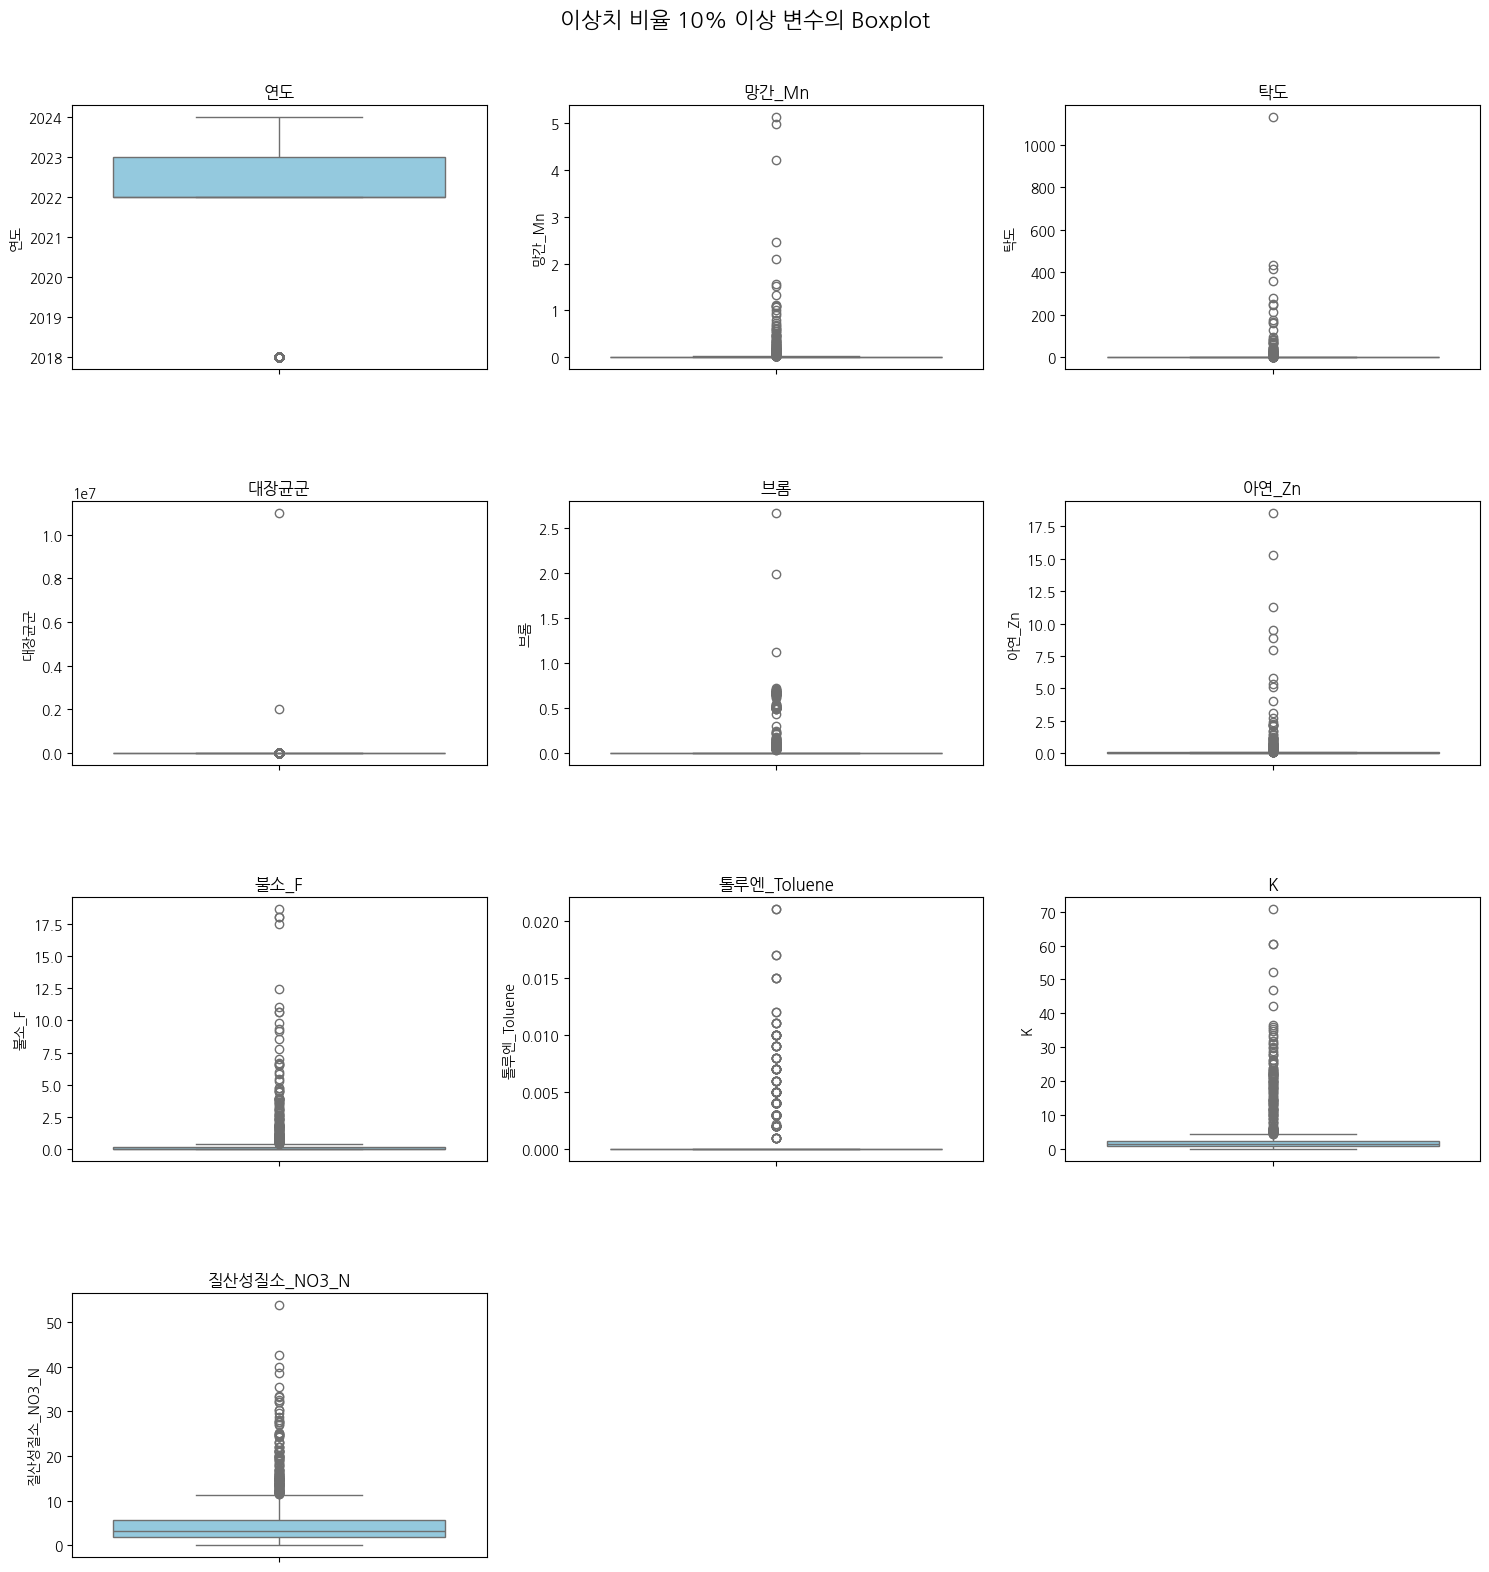

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 이상치 비율 10% 이상 변수
top_cols = outlier_df[outlier_df['이상치 비율(%)'] >= 10]['변수명6'].tolist()

n_cols = 3
n_plots = len(top_cols)
n_rows = math.ceil(n_plots / n_cols)

# Boxplot 시각화
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(top_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_filtered_jeonbuk[col], color='skyblue')
    plt.title(col)

plt.suptitle("이상치 비율 10% 이상 변수의 Boxplot", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.5)
plt.show()

<이상치 10% 이상인 물질리스트>
- 망간_Mn
- 탁도
- 대장균군
- 브롬
- 아연_Zn
- 불소_F
- 톨루엔_Toluene
- K
- 질산성질소_NO3_N

### 모델링

In [ ]:
# 전라북도 데이터 사용
df_jeonbuk = df_filtered_jeonbuk.copy()

In [ ]:
# pH 컬럼명 실제 이름: '수소이온농도_pH'
# 결측치 평균값으로 대체
df_jeonbuk['수소이온농도_pH'] = df_jeonbuk['수소이온농도_pH'].astype(float)
df_jeonbuk['수소이온농도_pH'] = df_jeonbuk['수소이온농도_pH'].fillna(df_jeonbuk['수소이온농도_pH'].mean())

# 점수 계산 및 label 컬럼 생성
df_jeonbuk['수질 등급'] = df_jeonbuk['수소이온농도_pH'].apply(get_pH_score)

# 결과 확인
print(df_jeonbuk[['수소이온농도_pH', '수질 등급']].head())


   수소이온농도_pH  수질 등급
0       5.99      2
1       6.46      1
2       5.88      2
3       6.09      1
4       7.38      0


In [ ]:
df_jeonbuk

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Ca,Mg,Na,K,...,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역,수질 등급
0,2018.0,전라북도,고창군,무장면,주진천,e-2,21.12,5.466,27.35,2.556,...,False,False,False,False,False,False,False,False,False,2
1,2018.0,전라북도,고창군,무장면,주진천,e-2,31.54,5.144,22.51,11.710,...,False,False,False,False,False,False,False,False,False,1
2,2018.0,전라북도,고창군,무장면,주진천,e-2,11.54,5.445,26.26,4.880,...,False,False,False,False,False,False,False,False,False,2
3,2018.0,전라북도,고창군,무장면,주진천,h-2,11.90,6.093,22.70,3.024,...,False,False,False,False,False,False,False,False,False,1
4,2018.0,전라북도,고창군,무장면,주진천,e-2,31.56,7.959,17.34,1.600,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,2024.0,전라북도,무주군,무풍면,무주남대천,e-2,11.50,2.200,6.50,2.400,...,False,False,False,False,False,False,False,False,False,0
1170,2024.0,전라북도,무주군,설천면,무주남대천,d,7.80,1.300,6.50,0.800,...,False,False,False,False,False,False,False,False,False,0
1171,2024.0,전라북도,무주군,무주읍,무주남대천,h-2,12.00,2.300,9.60,1.600,...,False,False,False,False,False,False,False,False,False,0
1172,2024.0,전라북도,무주군,무풍면,무주남대천,e-2,40.00,7.100,11.40,2.300,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
# 수치형 컬럼 자동 탐색
numeric_cols = df_jeonbuk.select_dtypes(include=[np.number]).columns.tolist()

# label과 pH 제외
feature_cols = [col for col in numeric_cols if col not in ['수질 등급', '수소이온농도_pH']]

# 결과 확인
print("사용 가능한 feature 컬럼들:", feature_cols)

사용 가능한 feature 컬럼들: ['연도', 'Ca', 'Mg', 'Na', 'K', 'HCO3', 'Cl', 'SO4', 'NO3', 'SiO2', '비소_As', '알루미늄_Al', '페니트로티온', '수은_Hg', '카드뮴_Cd', '파라티온_Parathion', '디클로로메탄_Dichlomethans', '망간_Mn', '카바릴_Carbaryl', '암모니아성질소_NH3_N', '납_Pb', '불소_F', '톨루엔_Toluene', '에틸벤젠_Ethylbenzene', '시안_CN', '크실렌_Xylene', '디클로로에틸렌_Dichloroethylene', '페놀_Phenol', '6가크롬_Cr+6', '질산성질소_NO3_N', '트리클로로에탄_1_1_1_TCE', '황산이온_SO4_2', '다이아지논_Diazion', '트리클로로에틸렌_TCE', '아연_Zn', '탁도', '염소이온_Cl_', '사염화탄소', '과망간산칼륨소비량', '벤젠_Benzene', '대장균군', '테트라클로로에틸렌', '1_2_디브로모_3_클로로프로판', '스트론튬', '브롬']


In [ ]:
feature_cols = ['연도', 'Ca', 'Mg', 'Na', 'K', 'HCO3', 'Cl', 'SO4', 'NO3', 'SiO2', '비소_As', '알루미늄_Al', '페니트로티온', '수은_Hg', '카드뮴_Cd', '파라티온_Parathion', '디클로로메탄_Dichlomethans', '망간_Mn', '카바릴_Carbaryl', '암모니아성질소_NH3_N', '납_Pb', '불소_F', '톨루엔_Toluene', '에틸벤젠_Ethylbenzene', '시안_CN', '크실렌_Xylene', '디클로로에틸렌_Dichloroethylene', '페놀_Phenol', '6가크롬_Cr+6', '질산성질소_NO3_N', '트리클로로에탄_1_1_1_TCE', '황산이온_SO4_2', '다이아지논_Diazion', '트리클로로에틸렌_TCE', '아연_Zn', '탁도', '염소이온_Cl_', '사염화탄소', '과망간산칼륨소비량', '벤젠_Benzene', '대장균군', '테트라클로로에틸렌', '1_2_디브로모_3_클로로프로판', '스트론튬', '브롬']

In [ ]:
# X, y 정의
X = df_jeonbuk[feature_cols].copy()
y = df_jeonbuk['수질 등급'].copy()

# 결측치 처리 (평균값으로 대체)
X = X.fillna(X.mean())

# 학습/검증 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import uniform, randint
import warnings
warnings.filterwarnings("ignore")

# 하이퍼파라미터 탐색 범위
param_grids = {
    "Random Forest": {
        'n_estimators': randint(100, 300),
        'max_depth': randint(5, 30),
        'min_samples_split': randint(2, 10)
    },
    "XGBoost": {
        'n_estimators': randint(100, 300),
        'max_depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.2)
    }
}

# 모델 정의
base_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# 튜닝 및 평가 함수
def tune_and_evaluate(models, param_grids, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f"\n [{name}] 튜닝 및 학습 중...")

        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[name],
            n_iter=20,
            scoring='accuracy',
            cv=3,
            verbose=1,
            random_state=42,
            n_jobs=-1
        )

        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        y_pred = best_model.predict(X_test)


        print(f" 정확도 (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
        print(" Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print(" Classification Report:")
        print(classification_report(y_test, y_pred))

# 실행 (X_train, y_train, X_test, y_test가 사전 정의되어 있어야 합니다)
tune_and_evaluate(base_models, param_grids, X_train, y_train, X_test, y_test)



 [Random Forest] 튜닝 및 학습 중...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
 정확도 (Accuracy): 0.8468
 Confusion Matrix:
[[185   9   0]
 [ 19  14   0]
 [  3   5   0]]
 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       194
           1       0.50      0.42      0.46        33
           2       0.00      0.00      0.00         8

    accuracy                           0.85       235
   macro avg       0.46      0.46      0.46       235
weighted avg       0.81      0.85      0.83       235


 [XGBoost] 튜닝 및 학습 중...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
 정확도 (Accuracy): 0.8298
 Confusion Matrix:
[[181  13   0]
 [ 19  14   0]
 [  4   4   0]]
 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       194
           1       0.45      0.42      0.44        33
           2       0.00      0.00      0.00         

#### RandomForest

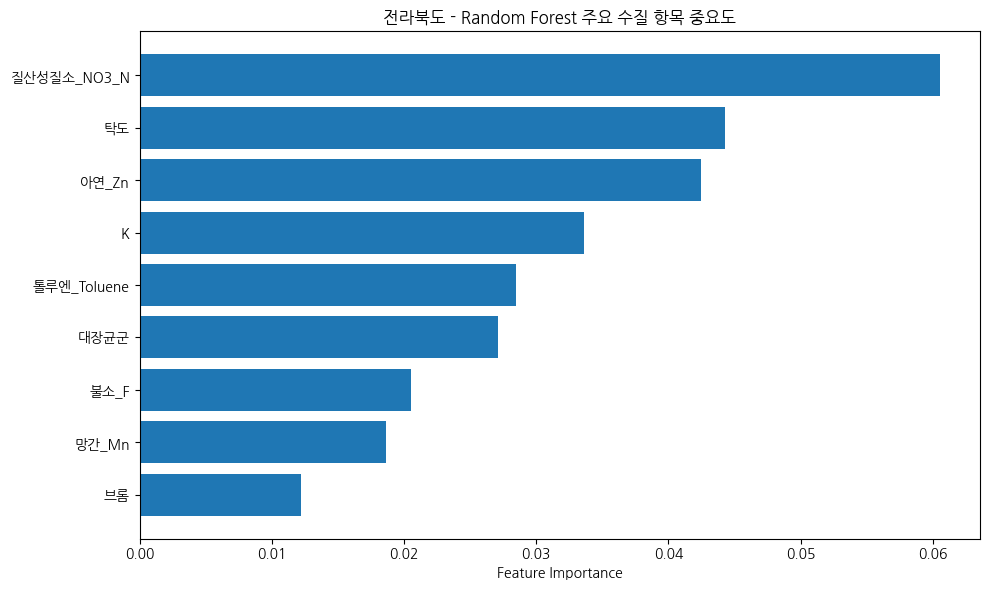

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# 관심 있는 변수 리스트
important_features = [
    '망간_Mn', '탁도', '대장균군', '브롬', '아연_Zn', '불소_F',
    '톨루엔_Toluene', 'K', '질산성질소_NO3_N', '수소이온농도_pH'
]

# Random Forest 모델 훈련
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 전체 중요도 및 변수명
importances = rf_model.feature_importances_
features = np.array(X_train.columns)

# 관심 피처만 필터링
mask = np.isin(features, important_features)
filtered_features = features[mask]
filtered_importances = importances[mask]

# 중요도 정렬
sorted_idx = np.argsort(filtered_importances)[::-1]
sorted_features = filtered_features[sorted_idx]
sorted_importances = filtered_importances[sorted_idx]

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("전라북도 - Random Forest 주요 수질 항목 중요도")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### [해석]

1. 상위 주요 변수: 질산성질소_NO3_N, 탁도, 아연_Zn

해석:  
- 질산성질소_NO3_N: 전라북도는 농업 비중이 매우 높은 지역으로, 특히 쌀농사와 채소 재배가 활발하다. 이로 인해 비료 사용이 많아 지하수 내 질산성질소 농도가 높아질 가능성이 크다.  
질산성질소의 높은 중요도는 농업 활동이 지하수 오염에 큰 영향을 미치고 있음을 보여주며, 이는 식수 안전과 생태계 건강을 위해 꼭 관리해야 할 변수임을 의미한다.  
- 탁도: 전라북도는 산과 평야가 조화를 이루고 있어 토양 유실과 퇴적물이 하천 및 지하수로 유입될 수 있는 환경이다.  
특히 집중호우 시 산지 토양이 씻겨 내려오면서 탁도가 상승할 수 있다. 탁도의 중요성은 자연환경 변화와 인위적 토양 교란이 지하수 수질에 직접적인 영향을 준다는 점을 시사한다.  
- 아연_Zn: 전라북도는 농업 외에도 일부 제조업과 공업단지가 존재하는 지역이다. 산업 활동과 폐기물 처리 과정에서 아연이 지하수로 유입될 수 있으며,  
그 영향력이 예측에 큰 변수로 작용하는 것으로 나타났다. 이는 지역 내 산업 배출 관리와 지하수 오염 감시에 주의를 기울여야 함을 나타낸다.

2. 중간 주요 변수: K, 대장균군, 톨루엔_Toluene

해석:  
- K: 전라북도 토양은 비옥하고 미네랄이 풍부한 편이며, 농업용 비료 사용도 많아 칼륨 농도가 지하수에 영향을 미친다.  
칼륨은 농경지 인근 지하수의 미네랄 상태와 농업 영향도를 반영하는 변수로 활용될 수 있다.  
- 대장균군: 전라북도는 농촌 지역이 많고 일부 지역에서는 가축 사육과 관련된 오염원이 존재한다.  
생활하수 처리시설이 미비한 곳에서는 대장균군 농도가 증가할 수 있어 식수 위생 관리에 취약한 면이 있다.  
대장균군이 중간 수준 중요도로 나타난 것은 일부 지역의 위생 문제를 반영한 결과로 볼 수 있다.  
- 톨루엔_Toluene: 전라북도 내 도심지역과 공업단지 주변에서는 톨루엔과 같은 유기용매가 산업 배출원으로 작용할 수 있다.  
톨루엔이 중간 중요도로 나타난 것은 지역 내 산업활동이 지하수 내 유기오염물질 유입에 영향을 미친다는 점을 보여준다.

3. 하위 주요 변수: 망간_Mn, 불소_F, 브롬

해석:  
- 망간_Mn: 전라북도의 지질학적 특성상 산화환원 환경이 다양한데, 일부 지하수대에서는 망간 용출이 발생할 수 있다.  
자연적인 미네랄 용출로서 존재하지만, 과도한 망간 농도는 수질 문제를 유발할 수 있으나 모델에서는 상대적으로 영향력이 낮았다.  
- 불소_F: 불소는 전라북도 일부 지역 지하수 내 자연 발생하는 미네랄 성분이며, 적절한 농도는 건강에 유익하지만 과다 노출 시 문제가 될 수 있다.  
현재 지하수 예측 변수로서는 영향이 적지만 지역별 불소 농도 관리는 필요하다.  
- 브롬: 전라북도는 해안과 접해있어 해양 기원의 브롬 농도가 일부 해안 인접 지하수에 영향을 줄 수 있다.  
또한 일부 산업 배출원이 있는 지역에서는 브롬 농도가 높아질 수 있으나 전체적으로 예측 변수로서의 영향력은 낮았다.




### [정책 제안]

1. 배경 및 필요성  
전라북도는 전국적으로 농업 비중이 높은 지역으로, 벼농사 및 채소류 중심의 집약적 농업 활동이 활발하게 이루어지고 있다.  
이에 따라 비료와 농약 사용량이 많아 질산성질소(NO3_N), 칼륨(K) 등의 농업 유래 오염물질이 지하수에 유입될 위험이 높다.  
또한 일부 지역에서는 가축 사육과 생활하수 처리 미비로 인해 대장균군 검출 가능성이 있으며,  
소규모 산업단지 및 공업단지에서는 아연(Zn), 톨루엔(Toluene) 등 산업계 오염물질도 지하수에 영향을 미치고 있다.  
무분별한 지하수 오염은 지역 주민들의 식수원 안전을 위협하고, 환경적으로도 장기적인 피해를 유발할 수 있어 지하수 수질 보호를 위한 맞춤형, 다차원적 정책 마련이 시급하다.

2. 정책 제안

2-1. 농업 유래 오염 저감을 위한 ‘비료 사용 총량제’ 시범 도입

목표:  
질산성질소(NO₃-N) 및 칼륨(K) 농도를 저감하여 농업 유래 지하수 오염을 예방한다.

- 내용:  
주요 농경지(예: 김제, 정읍, 익산 등)에 대한 비료 사용 실태를 조사하고, 작물별 적정 시비량 가이드를 제공하며,  
비료 사용 총량제 도입을 위한 시범 지역을 운영한다.

- 세부:  
농작물 생육에 영향을 주지 않는 선에서 비료 사용량 상한선을 설정하고, 불필요한 시비를 줄이도록 농가 교육 및 컨설팅을 병행한다.

- 추진:  
비료 절감 실천 농가를 대상으로 유기농 전환 지원금 등 인센티브를 제공하고,  
지자체 주도의 시범사업 운영 및 성과 평가를 통해 제도 확대 여부를 검토한다.

2-2. 지하수 산업오염 감시체계 구축

목표:  
아연(Zn), 톨루엔(Toluene) 등 중금속·유기오염물질의 지하수 유입을 방지하고, 산업단지 주변의 수질 안전을 확보한다.

- 내용:  
산업단지 인근 지하수 관정에 대해 연 2회 이상 정기 수질 검사를 실시하고,  
폐수처리시설의 가동 상태 및 이행 여부를 실시간 모니터링한다.

- 세부:  
산업단지 및 공업지역 인접 지역을 우선 대상으로 지정하고,  
모니터링 대상 오염물질을 사전에 규정하여 정기적 감시 체계를 마련한다.

- 추진:  
지역환경청, 지자체, 산업체 간 협력 체계를 구축하여 정보 공유 및 위반 사업장에 대한 행정 조치를 강화하고,  
수질 이상 시 즉시 대응 가능한 시스템을 마련한다.

3. 기대 효과

- 지속 가능한 농업환경 조성: 질산성질소 및 칼륨 저감으로 작물 생산성과 환경 보전의 균형을 달성한다.  
- 주민 건강 및 식수 안전 보장: 대장균군 및 유해물질(아연, 톨루엔) 감소를 통한 공중보건을 향상시킨다.  
- 산업활동과 환경관리의 조화: 오염원 실시간 감시 및 폐수 관리 강화로 지속 가능한 산업 생태계를 구축한다.  
- 주민 인식 개선 및 참여 유도: 지하수 수질정보 투명화로 지역 주민의 환경 문제 인식 증진 및 자발적 참여를 확대한다.


# **전라남도**

In [ ]:
sido_dfs['전라남도']
# csv로 저장
sido_dfs['전라남도'].to_csv('전라남도.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_jeonnam=pd.read_csv('전라남도.csv')
df_jeonnam.head()

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2018.0,전라남도,무안군,현경면,와탄천,e-2,13.3,7.7,240.3,9.4,...,False,False,False,False,False,False,False,False,False,False
1,2018.0,전라남도,무안군,현경면,NaN,e-2,13.6,7.4,238.0,6.9,...,False,False,False,False,False,False,False,False,False,False
2,2018.0,전라남도,무안군,몽탄면,영산강하류,h-2,14.5,7.0,351.0,9.2,...,False,False,False,False,False,False,False,False,False,False
3,2018.0,전라남도,무안군,몽탄면,영산강하류,h-2,11.5,7.2,362.9,8.7,...,False,False,False,False,False,False,False,False,False,False
4,2018.0,전라남도,무안군,몽탄면,영산강하류,h-2,14.3,7.0,366.0,7.4,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 대상 컬럼 리스트
cols = ['pH', 'Temp', 'EC', 'DO', 'TDS']

# 5개 컬럼이 모두 null인 행 제거
df_jeonnam = df_jeonnam.dropna(subset=cols, how='all')

# 각 컬럼의 null을 해당 컬럼 평균으로 대체
for col in cols:
    mean_value = df_jeonnam[col].mean()
    df_jeonnam[col] = df_jeonnam[col].fillna(mean_value)

# 결과 확인
df_jeonnam.head()

/tmp/ipython-input-23-938089896.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jeonnam[col] = df_jeonnam[col].fillna(mean_value)


,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2018.0,전라남도,무안군,현경면,와탄천,e-2,13.3,7.7,240.3,9.4,...,False,False,False,False,False,False,False,False,False,False
1,2018.0,전라남도,무안군,현경면,NaN,e-2,13.6,7.4,238.0,6.9,...,False,False,False,False,False,False,False,False,False,False
2,2018.0,전라남도,무안군,몽탄면,영산강하류,h-2,14.5,7.0,351.0,9.2,...,False,False,False,False,False,False,False,False,False,False
3,2018.0,전라남도,무안군,몽탄면,영산강하류,h-2,11.5,7.2,362.9,8.7,...,False,False,False,False,False,False,False,False,False,False
4,2018.0,전라남도,무안군,몽탄면,영산강하류,h-2,14.3,7.0,366.0,7.4,...,False,False,False,False,False,False,False,False,False,False


null 값 상위 30% 칼럼 모두 제외

In [ ]:
numeric_df = df_jeonnam.select_dtypes(include=['number'])

# 전체 행 수 기준으로 30% 이상 결측치가 있는 컬럼 찾기
threshold = len(df_jeonnam) * 0.3

# 수치형 컬럼 중 결측치 수가 30% 이상인 컬럼 이름 추출
cols_to_drop = numeric_df.columns[numeric_df.isnull().sum() >= threshold]

# 원본 df_jeonnam에서 해당 컬럼 제거
df_filtered_jeonnam = df_jeonnam.drop(columns=cols_to_drop)

30% 제외한 컬럼에서 수치형 변수의 null 값은 중앙값으로 대체

In [ ]:
# 수치형 컬럼만 선택
numeric_cols = df_filtered_jeonnam.select_dtypes(include=['number']).columns

# 수치형 컬럼의 null 값을 해당 컬럼의 중앙값으로 대체
df_filtered_jeonnam[numeric_cols] = df_filtered_jeonnam[numeric_cols].fillna(df_filtered_jeonnam[numeric_cols].median())

df_filtered_jeonnam

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2018.0,전라남도,무안군,현경면,와탄천,e-2,13.300000,7.700,240.3,9.40000,...,False,False,False,False,False,False,False,False,False,False
1,2018.0,전라남도,무안군,현경면,NaN,e-2,13.600000,7.400,238.0,6.90000,...,False,False,False,False,False,False,False,False,False,False
2,2018.0,전라남도,무안군,몽탄면,영산강하류,h-2,14.500000,7.000,351.0,9.20000,...,False,False,False,False,False,False,False,False,False,False
3,2018.0,전라남도,무안군,몽탄면,영산강하류,h-2,11.500000,7.200,362.9,8.70000,...,False,False,False,False,False,False,False,False,False,False
4,2018.0,전라남도,무안군,몽탄면,영산강하류,h-2,14.300000,7.000,366.0,7.40000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,2022.0,전라남도,장흥군,대덕읍,섬진강서남해,e-1,15.371075,7.715,774.0,6.66279,...,False,False,False,False,False,False,False,False,False,False
2464,2022.0,전라남도,장흥군,장평면,주암댐,h-2,15.371075,6.287,124.8,6.66279,...,False,False,False,False,False,False,False,False,False,False
2465,2022.0,전라남도,장흥군,장평면,주암댐,h-2,15.371075,6.445,144.8,6.66279,...,False,False,False,False,False,False,False,False,False,False
2466,2022.0,전라남도,장흥군,부산면,탐진강,h-2,15.371075,6.162,159.0,6.66279,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# csv로 저장
df_filtered_jeonnam.to_csv('df_filtered_jeonnam.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_filtered_jeonnam.describe()

,연도,Temp,pH,EC,DO,TDS,Ca,Mg,Na,K,HCO3,Cl,SO4,NO3,F,SiO2,NO3_N
count,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000
mean,2020.715700,15.371075,6.799649,333.513228,6.662790,179.727459,29.405857,7.365447,28.409671,3.056911,70.513364,52.360909,14.747761,31.317099,0.217031,29.881151,7.117304
std,1.500581,1.400721,0.652057,828.248724,1.775292,197.142306,47.085589,11.493038,125.078919,3.771579,46.919708,281.102653,37.815508,48.288069,0.643744,24.325419,10.780524
min,2018.000000,5.910000,4.327000,46.900000,0.900000,27.000000,0.919400,0.100000,0.000000,0.002119,0.000000,0.000000,0.006877,0.000000,0.000000,1.390000,0.000000
25%,2020.000000,14.700000,6.347000,152.475000,6.662790,179.727459,12.341274,2.876868,9.360382,1.000000,41.345933,8.603710,4.466835,6.097503,0.071861,22.178283,1.835200
50%,2021.000000,15.371075,6.720000,225.500000,6.662790,179.727459,19.454098,4.621661,13.796656,1.642884,58.016979,16.066379,7.806755,14.160000,0.114881,25.932633,3.600000
75%,2022.000000,16.027500,7.140000,337.600000,7.477500,179.727459,33.434545,8.145000,21.500000,3.200000,86.245679,34.382772,13.596092,34.749614,0.180000,30.317500,7.315622
max,2023.000000,19.700000,9.955000,19990.000000,16.180000,6640.000000,1043.536948,244.502576,3088.579008,59.191005,362.200000,6616.982759,712.174346,426.130000,12.130000,541.990000,96.300000


### 이상치

In [ ]:
# 이상치 탐지 함수 정의 (IQR 기준)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [ ]:
# 전체 수치형 변수에서 이상치 탐지
numeric_cols2 = df_filtered_jeonnam.select_dtypes(include='number').columns

outlier_summary = []

for col in numeric_cols2:
    outliers, lower, upper = detect_outliers_iqr(df_filtered_jeonnam, col)
    outlier_count = len(outliers)
    total_count = df_filtered_jeonnam[col].count()
    outlier_ratio = outlier_count / total_count if total_count != 0 else 0
    outlier_summary.append({
        '변수명7': col,
        '전체값 개수': total_count,
        '이상치 개수': outlier_count,
        '이상치 비율(%)': round(outlier_ratio * 100, 2)
    })

# DataFrame으로 정리
outlier_df2 = pd.DataFrame(outlier_summary).sort_values(by='이상치 비율(%)', ascending=False)
outlier_df2.head(20)

,변수명7,전체값 개수,이상치 개수,이상치 비율(%)
5,TDS,1414,488,34.51
4,DO,1414,401,28.36
15,SiO2,1414,243,17.19
9,K,1414,197,13.93
16,NO3_N,1414,154,10.89
13,NO3,1414,137,9.69
12,SO4,1414,135,9.55
8,Na,1414,128,9.05
14,F,1414,120,8.49
7,Mg,1414,119,8.42


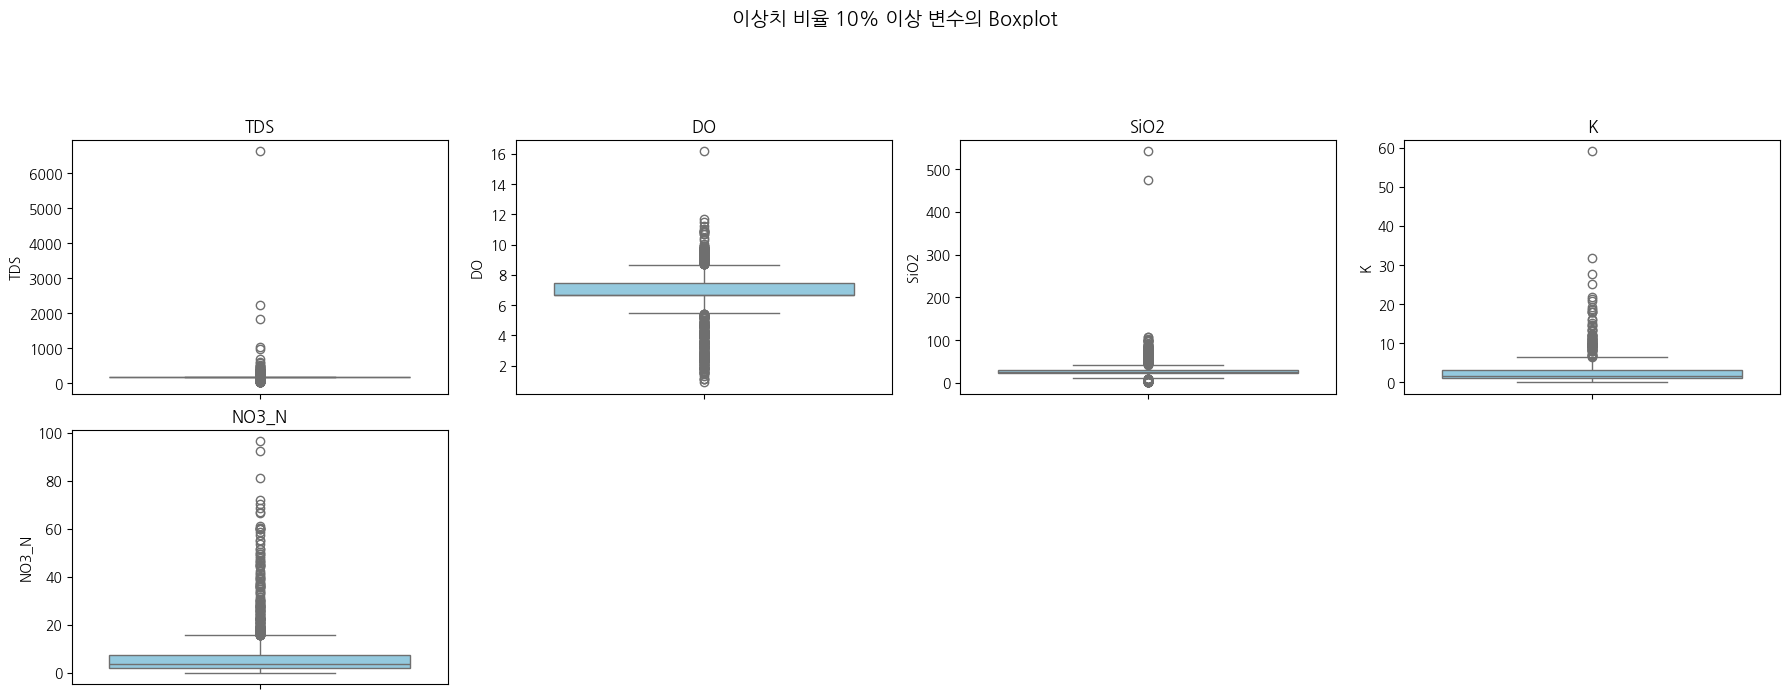

In [ ]:
# 이상치 비율 10% 이상 변수
top_cols2 = outlier_df2[outlier_df2['이상치 비율(%)'] >= 10]['변수명7'].tolist()

# Boxplot 시각화
plt.figure(figsize=(18, 10))
for i, col in enumerate(top_cols2, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_filtered_jeonnam[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("이상치 비율 10% 이상 변수의 Boxplot", fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()

<이상치 10% 이상인 물질리스트>
- TDS
- DO
- SiO2
- K
- NO3_N


### 모델링

In [ ]:
def calculate_label(row):
    scores = [
        get_pH_score(row['pH']),
        get_DO_score(row['DO']),
        get_TDS_score(row['TDS']),
        get_EC_score(row['EC']),
        get_Temp_score(row['Temp'])
    ]
    avg_score = np.mean(scores)
    if avg_score <= 0.5:
        return 0
    elif avg_score <= 1.5:
        return 1
    else:
        return 2

In [ ]:
def preprocess_and_label(df):
    df = df.copy()

    # 기준 5개 변수
    columns_to_check = ['pH', 'DO', 'TDS', 'EC', 'Temp']

    # 모든 값이 NaN인 행 제거
    df = df.dropna(subset=columns_to_check, how='all')

    # 각 열의 평균으로 NaN 대체
    for col in columns_to_check:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mean())

    # 수질 등급 계산
    df['수질등급'] = df.apply(calculate_label, axis=1)

    return df

In [ ]:
df_filtered_jeonnam = preprocess_and_label(df_filtered_jeonnam)
df_filtered_jeonnam.head()

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역,수질등급
0,2018.0,전라남도,무안군,현경면,와탄천,e-2,13.3,7.7,240.3,9.4,...,False,False,False,False,False,False,False,False,False,0
1,2018.0,전라남도,무안군,현경면,NaN,e-2,13.6,7.4,238.0,6.9,...,False,False,False,False,False,False,False,False,False,0
2,2018.0,전라남도,무안군,몽탄면,영산강하류,h-2,14.5,7.0,351.0,9.2,...,False,False,False,False,False,False,False,False,False,0
3,2018.0,전라남도,무안군,몽탄면,영산강하류,h-2,11.5,7.2,362.9,8.7,...,False,False,False,False,False,False,False,False,False,0
4,2018.0,전라남도,무안군,몽탄면,영산강하류,h-2,14.3,7.0,366.0,7.4,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

# 일반 변수
basic_vars = ['Temp', 'pH', 'EC', 'DO', 'TDS']
# 이상치 변수
substance_vars = ['TDS','DO', 'SiO2', 'K', 'NO3_N']

# 수치형 변수
numeric_cols = df_filtered_jeonnam.select_dtypes(include='number').columns.tolist()

# 최종 선택 변수: 기본 변수 + 이상치 물질 변수 중 실제 있는 컬럼만
final_vars = basic_vars + substance_vars

# X, y split
X = df_filtered_jeonnam[final_vars]
y = df_filtered_jeonnam['수질등급']

# train/test splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 모델 선언
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42)
lgbm_clf = lgb.LGBMClassifier(verbose=-1, random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

voting = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('gbc', gbc)],
    voting='soft'
)

# 모델 정의
models = [
    ('RandomForest', rf),
    ('LogisticRegression', lr),
    ('KNN', knn),
    ('XGBoost', xgb_clf),
    ('LightGBM', lgbm_clf),
    ('GradientBoosting', gbc),
    ('SoftVoting', voting)
]

results = []

for name, model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc))

results.sort(key=lambda x: x[1], reverse=True)

print("모델 정확도 높은 순:")
for name, acc in results:
    print(f"{name}: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


모델 정확도 높은 순:
GradientBoosting: 0.9929
LightGBM: 0.9823
XGBoost: 0.9788
SoftVoting: 0.9788
RandomForest: 0.9717
KNN: 0.9258
LogisticRegression: 0.9223


#### GradientBoosting

Best GBC Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
GBC Accuracy: 0.9893992932862191


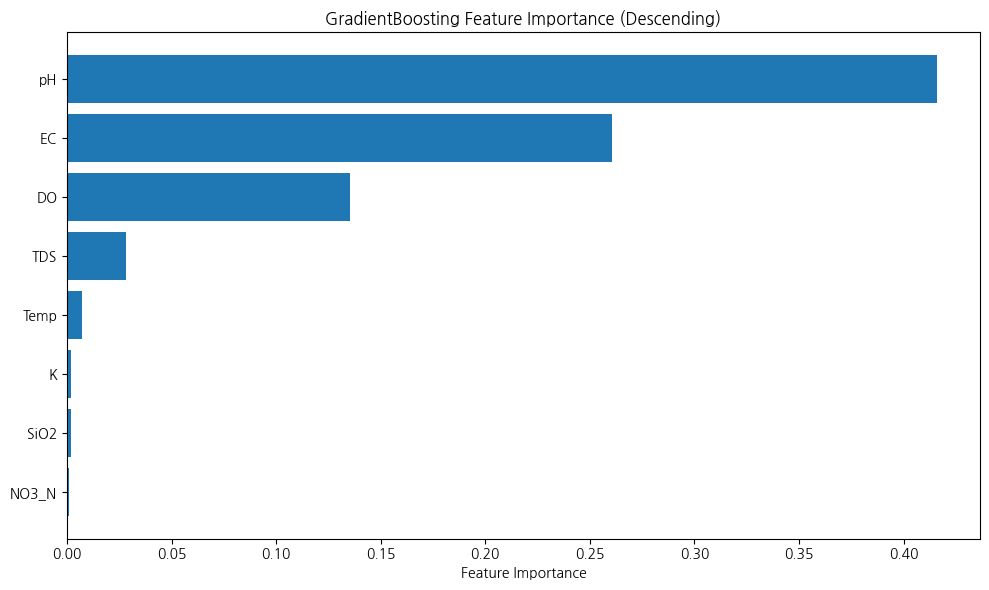

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


gbc = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_gbc = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_gbc.fit(X_train, y_train)

best_gbc = grid_gbc.best_estimator_
acc = accuracy_score(y_test, best_gbc.predict(X_test))

print("Best GBC Parameters:", grid_gbc.best_params_)
print("GBC Accuracy:", acc)

feature_names = X.columns

# Feature Importance
importances = best_gbc.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("GradientBoosting Feature Importance (Descending)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### LightGBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


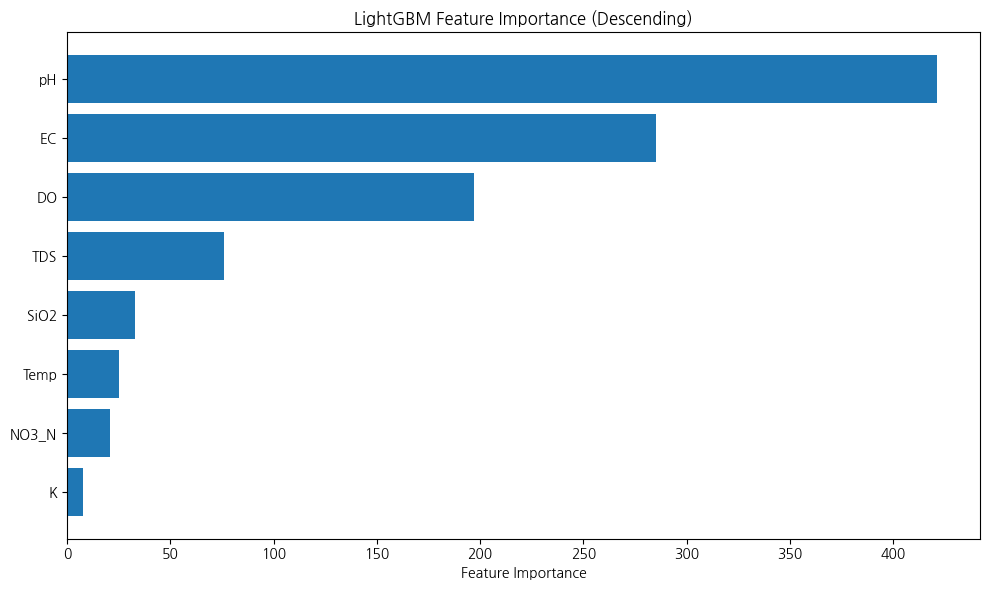

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 모델 선언
lgbm_clf = lgb.LGBMClassifier(random_state=42, verbose=-1)

# 하이퍼파라미터 그리드
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'num_leaves': [15, 31]
}

# GridSearchCV
grid_lgb = GridSearchCV(lgbm_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_lgb.fit(X_train, y_train)

best_lgb = grid_lgb.best_estimator_
best_params = grid_lgb.best_params_
acc = accuracy_score(y_test, best_lgb.predict(X_test))

feature_names = X.columns

# 특성 중요도 추출
importances = best_lgb.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("LightGBM Feature Importance (Descending)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### XGBoost

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
XGBoost Accuracy: 0.9752650176678446


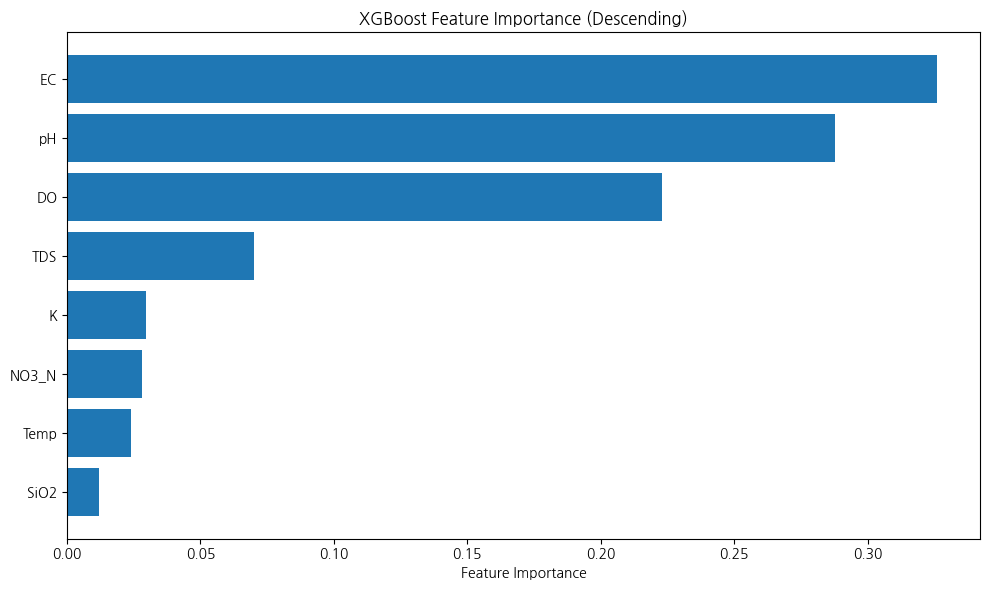

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', verbosity=0)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_xgb = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
acc = accuracy_score(y_test, best_xgb.predict(X_test))

print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("XGBoost Accuracy:", acc)

feature_names = X.columns

# Feature Importance
importances = best_xgb.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance (Descending)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### [해석]

1. 상위 주요 변수: pH, EC, DO

해석:  
- pH는 전라남도 저지대 및 연안지역에서 해수 침투, 농약 유입, 산업 폐수 등 다양한 요인에 의해 변동성이 크며, 수질 악화 초기 신호로 민감하게 반응함  
- EC(전기전도도)는 지하수의 염도와 총 이온 농도를 반영하는데, 해안지역의 염수혼입, 비료 성분 유입으로 수치가 높아질 수 있음  
- DO(용존산소)는 유기물 분해와 직결되며, 양식장·농경지 배수로 인한 부영양화 및 산소 결핍 문제가 존재할 가능성이 높음

2. 중간 주요 변수: TDS, Temp

해석:  
- TDS는 비료, 가축분뇨, 생활하수 등에서 유래된 유기물과 무기이온이 총량으로 포함된 지표로, 농경지·축산단지 인근 지역에서 높게 나타날 수 있음  
- Temp(수온)는 수중 미생물 활동, DO 용해도, 계절적 수질 변화와 직결되며, 여름철 저산소 사태의 간접 지표로 활용 가능

3. 하위 주요 변수: K, SiO₂, NO₃_N

해석:  
- K(칼륨), SiO₂(이산화규소)는 지질적 기원에서 비롯된 성분으로 전반적인 오염과의 관련성이 낮고, 경보지표로서의 중요도가 낮음  
- NO₃_N(질산성질소)은 일반적으로 농업지역에서 중요하나, 전라남도 연안지역에서는 염분 또는 다른 유기오염 지표에 비해 영향도 낮게 평가됨





### [정책 제안]

1. 배경 및 필요성  
전라남도는 연안 및 저지대 지역이 많아 해수 침투, 농업 비점오염, 양식장 배출수 등의 영향으로 지하수의 수질 변화에 민감하다.  
기온 상승과 저산소 수역 확대가 빈번히 나타나며, 특히 염분 혼입과 산도 변화가 수질 등급 저하의 핵심 원인으로 작용한다.  
따라서 전라남도의 지하수는 물리화학적 지표(pH, EC, DO)를 기반으로 조기경보 체계를 마련할 필요가 있다.

2. 정책 제안

2-1. pH 기반 조기경보 및 산도 대응 체계 구축  
목표: 해수 유입, 농약/산성폐수 유입에 의한 지하수 산도 급변을 조기에 탐지하여 피해 예방

- 내용: pH 6.5 이하 또는 8.5 이상인 지역을 이상지대로 분류하고 연속측정 시스템 설치  
- 세부: 급격한 산도 변화 발생 시 지하수 사용 제한 경보 발령 및 주변 배출원 조사  
- 추진: 연안 및 저지대 중심으로 pH 자동측정기 설치 지원 사업 추진

2-2. EC 및 TDS 기반 염분 혼입 감시 및 농업 비점 관리 강화

목표: 해안지역 염수 역류, 농업 비료 성분의 지하수 유입 방지

- 내용: EC 1.5 mS/cm 또는 TDS 500 mg/L 초과 지역을 '염분 취약지'로 지정하고 유입 원인 조사  
- 세부: 방풍림·차수벽 등 염수차단 시설 확대, 관개수 재활용 시스템 도입 검토  
- 추진: 비점오염저감시설 설치비 지원 확대 및 친환경 농법 전환 유도

2-3. 여름철 DO 저하 대응 및 양식장 관리 지역화

목표: 저산소 유역 조기대응을 통해 수생태계 피해 및 민원 방지

- 내용: DO 3mg/L 이하 지역 중심으로 순환 펌프, 저류지 퇴적물 정비사업 추진  
- 세부: 양식장 밀집지역(예: 해남, 고흥 등) 중심으로 DO·Temp 연계 실시간 모니터링 체계 구축  
- 추진: 수산업 연계 수질관리 기준 마련 및 수계별 DO 변화 시계열 DB 구축


3. 기대효과

- pH·EC·DO 기반의 물리화학 조기경보 체계를 통해, 수질 급변에 대한 선제적 대응이 가능해짐  
- 염분 유입, 양식장 배출수, 농업 비점오염 등 지역별 주요 유입원에 따른 맞춤형 수질관리정책을 수립할 수 있음  
- 여름철 저산소 유역의 수질 회복을 통해 수생태계 건강성 유지 및 주민 민원 감소 효과 기대  
- 연안 및 저지대의 수질 예측 정확도를 높여, 지하수 자원 안정성 확보 및 지자체 수질관리 효율성 향상  
- 장기적으로 전라남도의 수질 환경에 대한 거버넌스를 강화하고, 농어촌 지역의 지속가능한 물 이용 체계로 전환 가능

# **경상북도**

In [ ]:
sido_dfs['경상북도']
# csv로 저장
sido_dfs['경상북도'].to_csv('경상북도.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_gyeongbuk = pd.read_csv('경상북도.csv')
df_gyeongbuk.head()

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2018.0,경상북도,문경시,가은읍,달천,e-1,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2018.0,경상북도,문경시,동로면,충주댐,e-1,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,2018.0,경상북도,문경시,동로면,충주댐,e-1,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,2018.0,경상북도,문경시,동로면,충주댐,f,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,2018.0,경상북도,문경시,가은읍,영강,h-2,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 대상 컬럼 리스트
cols = ['pH', 'Temp', 'EC', 'DO', 'TDS']

# 1) 5개 컬럼이 모두 null인 행 제거
df_gyeongbuk = df_gyeongbuk.dropna(subset=cols, how='all')

# 2) 각 컬럼의 null을 해당 컬럼 평균으로 대체
for col in cols:
    mean_value = df_gyeongbuk[col].mean()
    df_gyeongbuk[col] = df_gyeongbuk[col].fillna(mean_value)

# 결과 확인
df_gyeongbuk.head()

/tmp/ipython-input-41-1229874728.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gyeongbuk[col] = df_gyeongbuk[col].fillna(mean_value)


,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
434,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,15.8,7.28,220.0,5.3,...,False,False,False,False,False,False,False,False,False,False
435,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,13.9,6.47,146.0,7.9,...,False,False,False,False,False,False,False,False,False,False
436,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,14.2,6.79,232.0,6.3,...,False,False,False,False,False,False,False,False,False,False
438,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,14.4,6.23,208.0,7.7,...,False,False,False,False,False,False,False,False,False,False
439,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,14.5,8.21,123.0,6.9,...,False,False,False,False,False,False,False,False,False,False


null 값 상위 30% 칼럼 모두 제외

In [ ]:
numeric_df = df_gyeongbuk.select_dtypes(include=['number'])

# 전체 행 수 기준으로 30% 이상 결측치가 있는 컬럼 찾기
threshold = len(df_gyeongbuk) * 0.3

# 수치형 컬럼 중 결측치 수가 30% 이상인 컬럼 이름 추출
cols_to_drop = numeric_df.columns[numeric_df.isnull().sum() >= threshold]

# 원본 df_gyeongbuk에서 해당 컬럼 제거
df_filtered_gyeongbuk = df_gyeongbuk.drop(columns=cols_to_drop)

30% 제외한 컬럼에서 수치형 변수의 null 값은 중앙값으로 대체

In [ ]:
# 수치형 컬럼만 선택
numeric_cols = df_filtered_gyeongbuk.select_dtypes(include=['number']).columns

# 수치형 컬럼의 null 값을 해당 컬럼의 중앙값으로 대체
df_filtered_gyeongbuk[numeric_cols] = df_filtered_gyeongbuk[numeric_cols].fillna(df_filtered_gyeongbuk[numeric_cols].median())

df_filtered_gyeongbuk

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
434,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,15.800000,7.280000,220.0,5.300000,...,False,False,False,False,False,False,False,False,False,False
435,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,13.900000,6.470000,146.0,7.900000,...,False,False,False,False,False,False,False,False,False,False
436,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,14.200000,6.790000,232.0,6.300000,...,False,False,False,False,False,False,False,False,False,False
438,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,14.400000,6.230000,208.0,7.700000,...,False,False,False,False,False,False,False,False,False,False
439,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,14.500000,8.210000,123.0,6.900000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,2024.0,경상북도,영양군,NaN,왕피천,h-2,13.450435,7.197391,178.0,6.117578,...,False,False,False,False,False,False,False,False,False,False
1807,2024.0,경상북도,영양군,NaN,왕피천,f,13.450435,7.197391,314.0,6.117578,...,False,False,False,False,False,False,False,False,False,False
1808,2024.0,경상북도,영양군,NaN,임하댐,d,13.450435,7.197391,784.0,6.117578,...,False,False,False,False,False,False,False,False,False,False
1809,2024.0,경상북도,영양군,NaN,임하댐,f,13.450435,7.197391,307.0,6.117578,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# csv로 저장
df_filtered_gyeongbuk.to_csv('df_filtered_gyeongbuk.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_filtered_gyeongbuk.describe()

,연도,Temp,pH,EC,DO,TDS,Ca,Mg,Na,K,HCO3,Cl,SO4,NO3,F,NO3_N
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,2022.682899,13.450435,7.197391,536.261404,6.117578,154.621615,42.138387,19.218602,68.835451,3.084609,192.722102,14.624587,130.493994,25.708776,0.427775,5.808023
std,1.376517,0.967832,0.282637,780.016583,1.343089,40.913221,71.687123,35.278294,193.669716,3.889743,371.323183,17.984646,450.510296,29.454246,1.179438,6.654436
min,2021.000000,10.800000,6.110000,2.420000,1.200000,29.000000,0.000000,0.060000,1.440000,0.000000,1.220000,1.907804,0.200300,0.000000,0.000000,0.000000
25%,2021.000000,13.100000,7.185000,232.000000,6.117578,141.000000,9.684000,5.184500,11.890000,1.295890,43.920000,6.610445,10.000000,7.833137,0.000000,1.769800
50%,2023.000000,13.450435,7.197391,310.000000,6.117578,154.621615,20.648846,9.827000,16.860000,2.075971,101.609946,10.564808,18.808565,18.484020,0.160000,4.176236
75%,2024.000000,13.450435,7.250000,521.500000,6.505000,154.621615,44.370020,20.757250,35.680000,3.685507,213.914664,16.726955,36.452380,35.200500,0.301996,7.953118
max,2024.000000,21.980000,9.010000,8970.000000,10.840000,465.000000,598.006130,500.634170,2209.754290,43.129518,4662.503323,237.600000,4578.699670,459.379000,11.921072,103.791008


### 이상치

In [ ]:
# 전체 수치형 변수에서 이상치 탐지
numeric_cols2 = df_filtered_gyeongbuk.select_dtypes(include='number').columns

outlier_summary = []

for col in numeric_cols2:
    outliers, lower, upper = detect_outliers_iqr(df_filtered_gyeongbuk, col)
    outlier_count = len(outliers)
    total_count = df_filtered_gyeongbuk[col].count()
    outlier_ratio = outlier_count / total_count if total_count != 0 else 0
    outlier_summary.append({
        '변수명8': col,
        '전체값 개수': total_count,
        '이상치 개수': outlier_count,
        '이상치 비율(%)': round(outlier_ratio * 100, 2)
    })

# DataFrame으로 정리
outlier_df2 = pd.DataFrame(outlier_summary).sort_values(by='이상치 비율(%)', ascending=False)
outlier_df2.head(20)

,변수명8,전체값 개수,이상치 개수,이상치 비율(%)
4,DO,883,307,34.77
1,Temp,883,291,32.96
2,pH,883,282,31.94
5,TDS,883,226,25.59
8,Na,883,141,15.97
12,SO4,883,131,14.84
14,F,883,86,9.74
3,EC,883,85,9.63
6,Ca,883,73,8.27
7,Mg,883,60,6.80


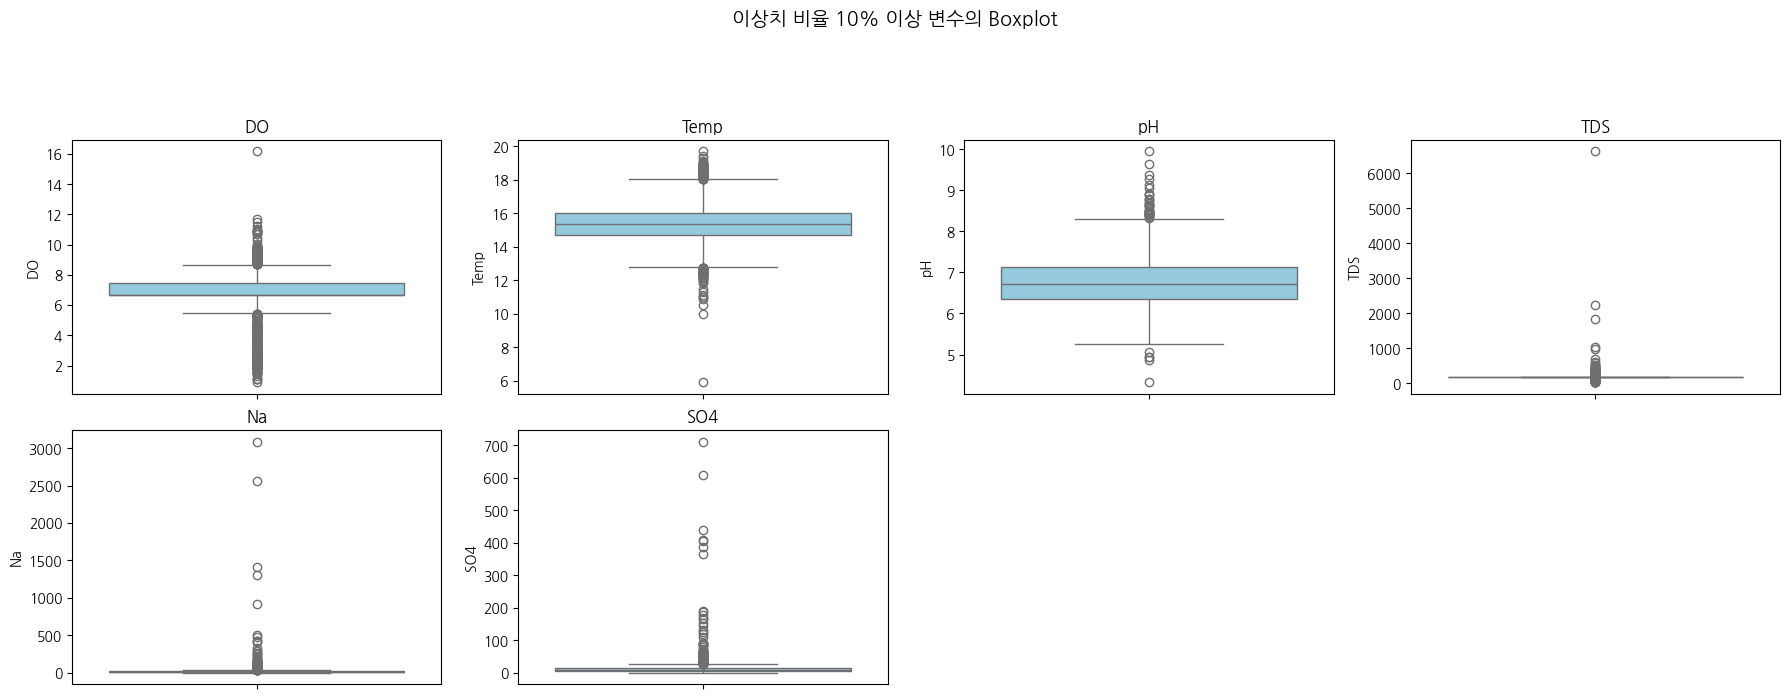

In [ ]:
# 이상치 비율 10% 이상 변수
top_cols2 = outlier_df2[outlier_df2['이상치 비율(%)'] >= 10]['변수명8'].tolist()

# Boxplot 시각화
plt.figure(figsize=(18, 10))
for i, col in enumerate(top_cols2, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_filtered_gyeongbuk[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("이상치 비율 10% 이상 변수의 Boxplot", fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()

<이상치 10% 이상인 물질리스트>
- DO
-	Temp
-	pH
-	TDS
-	Na
-	SO4

### 모델링

In [ ]:
def calculate_label(row):
    scores = [
        get_pH_score(row['pH']),
        get_DO_score(row['DO']),
        get_TDS_score(row['TDS']),
        get_EC_score(row['EC']),
        get_Temp_score(row['Temp'])
    ]
    avg_score = np.mean(scores)
    if avg_score <= 0.5:
        return 0
    elif avg_score <= 1.5:
        return 1
    else:
        return 2

In [ ]:
def preprocess_and_label(df):
    df = df.copy()

    # 기준 5개 변수
    columns_to_check = ['pH', 'DO', 'TDS', 'EC', 'Temp']

    # 모든 값이 NaN인 행 제거
    df = df.dropna(subset=columns_to_check, how='all')

    # 각 열의 평균으로 NaN 대체
    for col in columns_to_check:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mean())

    # (수질 등급 계산
    df['수질등급'] = df.apply(calculate_label, axis=1)

    return df

In [ ]:
df_filtered_gyeongbuk = preprocess_and_label(df_filtered_gyeongbuk)
df_filtered_gyeongbuk.head()

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역,수질등급
434,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,15.8,7.28,220.0,5.3,...,False,False,False,False,False,False,False,False,False,0
435,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,13.9,6.47,146.0,7.9,...,False,False,False,False,False,False,False,False,False,0
436,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,14.2,6.79,232.0,6.3,...,False,False,False,False,False,False,False,False,False,0
438,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,14.4,6.23,208.0,7.7,...,False,False,False,False,False,False,False,False,False,0
439,2023.0,경상북도,봉화군,봉화읍,내성천,e-2,14.5,8.21,123.0,6.9,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

# 일반 변수
basic_vars = ['Temp', 'pH', 'EC', 'DO', 'TDS']
# 이상치 변수
substance_vars = ['DO', 'Temp', 'pH', 'TDS', 'Na', 'SO4']

# 수치형 변수
numeric_cols = df_filtered_gyeongbuk.select_dtypes(include='number').columns.tolist()

# 최종 선택 변수: 기본 변수 + 이상치 물질 변수 중 실제 있는 컬럼만
final_vars = basic_vars + substance_vars

# X, y split
X = df_filtered_gyeongbuk[final_vars]
y = df_filtered_gyeongbuk['수질등급']

# train/test splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 모델 선언
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42)
lgbm_clf = lgb.LGBMClassifier(verbose=-1, random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

voting = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('gbc', gbc)],
    voting='soft'
)

# 모델 정의
models = [
    ('RandomForest', rf),
    ('LogisticRegression', lr),
    ('KNN', knn),
    ('XGBoost', xgb_clf),
    ('LightGBM', lgbm_clf),
    ('GradientBoosting', gbc),
    ('SoftVoting', voting)
]

results = []

for name, model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc))

results.sort(key=lambda x: x[1], reverse=True)

print("모델 정확도 높은 순:")
for name, acc in results:
    print(f"{name}: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


모델 정확도 높은 순:
RandomForest: 0.9944
XGBoost: 0.9944
LightGBM: 0.9944
GradientBoosting: 0.9944
SoftVoting: 0.9944
LogisticRegression: 0.9774
KNN: 0.9661


#### RandomForest

Best RF Parameters: {'max_depth': 5, 'n_estimators': 200}
RF Accuracy: 0.9830508474576272


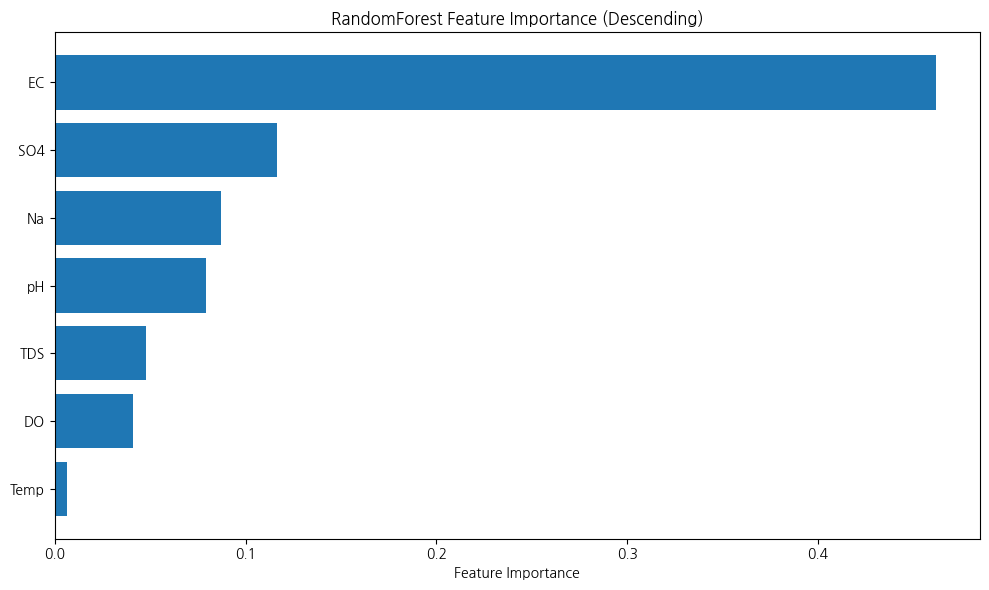

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 모델 생성
rf_clf = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 그리드
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, None]
}

# GridSearchCV
grid_rf = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# 최적 모델과 정확도 평가
best_rf = grid_rf.best_estimator_
acc = accuracy_score(y_test, best_rf.predict(X_test))

print("Best RF Parameters:", grid_rf.best_params_)
print("RF Accuracy:", acc)

# Feature Importance 시각화
feature_names = X.columns
importances = best_rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("RandomForest Feature Importance (Descending)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### XGBoost

Best XGBoost Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
XGBoost Accuracy: 0.9943502824858758


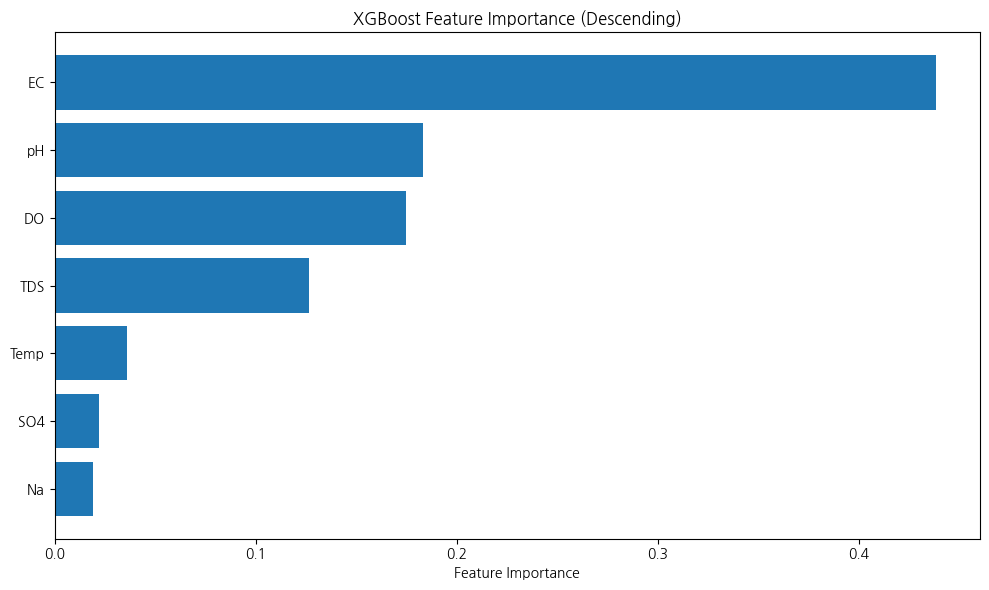

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', verbosity=0)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_xgb = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
acc = accuracy_score(y_test, best_xgb.predict(X_test))

print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("XGBoost Accuracy:", acc)

feature_names = X.columns

# Feature Importance
importances = best_xgb.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance (Descending)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### LightGBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


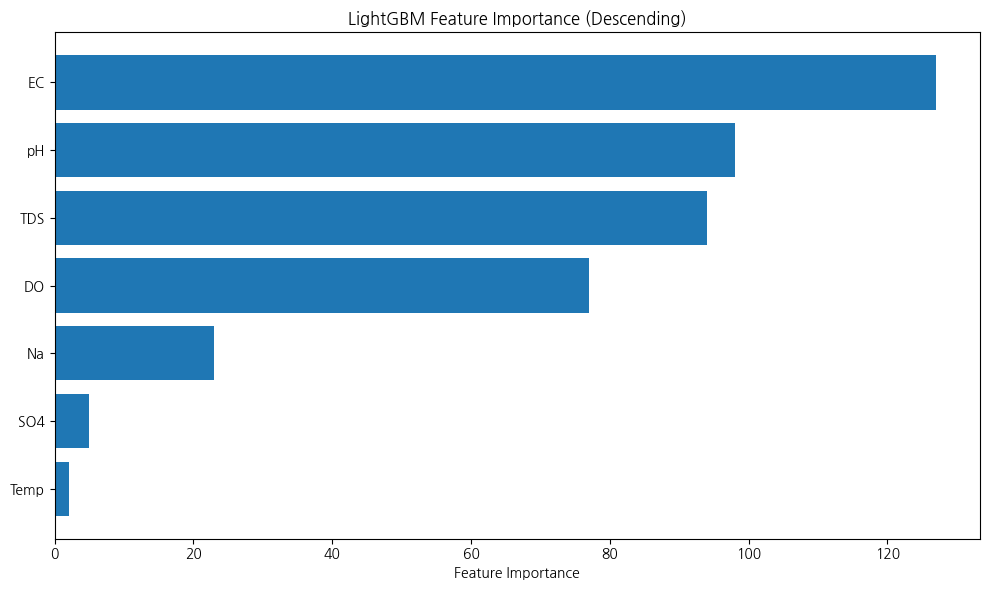

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 모델 선언
lgbm_clf = lgb.LGBMClassifier(random_state=42, verbose=-1)

# 하이퍼파라미터 그리드
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'num_leaves': [15, 31]
}

# GridSearchCV
grid_lgb = GridSearchCV(lgbm_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_lgb.fit(X_train, y_train)

best_lgb = grid_lgb.best_estimator_
best_params = grid_lgb.best_params_
acc = accuracy_score(y_test, best_lgb.predict(X_test))

feature_names = X.columns

# 특성 중요도 추출
importances = best_lgb.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("LightGBM Feature Importance (Descending)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### [해석]

1. 상위 주요 변수: EC, pH, DO

해석:
- EC(전기전도도)는 지하수 내 총 이온 농도를 반영하며, 경상북도 농촌 지역의 질산성비료, 가축분뇨, 광산배출수 유입 등에 의해 수치가 높게 나타날 수 있음
- pH는 산도와 관련되어 있으며, 석회암 지대(예: 안동·문경·영천) 및 폐광 지역(예: 봉화·영양)의 산성 침출수 영향으로 지하수 산도 변화가 발생할 수 있음
- DO(용존산소)는 농업지대에서의 유기물 분해, 수중 산소 부족 문제를 반영하며, 수질 악화를 조기에 파악하는 지표로 기능함

2. 중간 주요 변수: TDS, Temp

해석:
- TDS(총용존고형물)는 전도도와 유사하지만 유기물·중금속까지 포함되며, 농경지 비점오염 및 하천 유입수에 의해 농도가 증가할 수 있음
- Temp(수온)는 기온 상승, 저류지 체류시간 증가 등의 환경 변화로 DO 저하와 연계되며, 특히 여름철 수질 악화의 간접지표로 작용

3. 하위 주요 변수: SO₄, Na

해석:
- SO₄(황산염)는 일부 폐광 지역의 황화물 산화에 의한 영향 가능성이 있으나, 전체 지역에서는 상대적으로 낮은 영향력
- Na(나트륨)는 내륙 중심의 경상북도 특성상 염분 농도 자체가 낮아, 영향도 낮은 수질 지표로 평가됨




### [정책 제안]

1. 배경 및 필요성  
경상북도는 중산간 농경지와 광산지대가 혼재되어 있어, 지하수에 비료·가축분뇨·광물질 유입이 복합적으로 발생하는 구조이다.  
광산배출수 및 비점오염원이 수질을 악화시키며, 내륙지역 특성상 강우 이후 지하수로의 빠른 침투가 나타나 수질 변화 감시가 시급하다.  
이에 따라 유역별 오염원 분석과 지하수 보전 목적의 예측기반 수질관리 체계 수립이 필요하다.

2. 정책 제안

2-1. 전기전도도 기반 고위험 유역 조기경보 체계 구축  
목표: EC 수치 상승을 통해 비료·분뇨 유입 및 광산배출수 영향 지역을 조기에 탐지하고 사전 대응

- 내용: 유역 단위로 EC 기반 기준값 설정 후 초과 지점에 자동경보 시스템 연동  
- 세부: EC 1.5 mS/cm 이상 구역에 대해 유역별 원인 조사 및 비점오염 관리 강화  
- 추진: 비료시비 총량제 도입 연계, 농경지 대상 정밀 모니터링 시범사업

2-2. DO 및 Temp 기반 여름철 저산소 유역 대응

목표: DO 수치가 낮고 수온이 높은 지역을 사전 파악하여 수질 악화 예방

- 내용: 6~9월 집중관리 유역 설정, DO 3mg/L 이하 지역 대상 인공 유량 확보 또는 순환 시스템 설치  
- 세부: 수온 급등 시 수생태계 피해 발생 위험지역에 차광시설·식생복원 추진  
- 추진: 여름철 DO·Temp 통합 측정 시스템 구축 및 수변 완충지대 확대

2-3. 광산 인근 지역 SO₄ 및 pH 변화 감시

목표: 폐광 또는 광산 지역에서의 황산염 및 산성수 유입 감시 및 정화대책 수립

- 내용: 봉화, 영양, 문경 등 폐광산 인근 지역 대상 표층수-지하수 통합 측정망 구축  
- 세부: SO₄ 기준 초과 시 pH 완충조 설치 검토 및 석회 살포 기반 정화작업 도입  
- 추진: 광산 오염원 추적 모형 개발과 국가지원 정화사업 연계


3. 기대효과

- 수질 변화가 빠르게 발생하는 고위험 유역을 조기 파악함으로써, 사전 대응 중심의 예측적 지하수 관리 체계로 전환할 수 있음  
- 광산 및 농업지역의 오염원을 정확히 추적·관리하여, 지역 주민의 음용수 안전성과 농업 생산성을 동시에 확보할 수 있음  
- 여름철 저산소·고온 유역을 집중 관리함으로써 수생태계 파괴를 예방하고, 수질 기준 초과에 따른 민원 발생을 줄일 수 있음  
- 지역 특성에 맞는 수질 기준과 관리 지점을 설정함으로써 예산 낭비를 줄이고, 효율적인 지하수 보전 정책 실행이 가능해짐  
- 장기적으로는 경상북도의 물환경 회복력(resilience)을 높이고, 농업·관광 등 지역 경제의 지속 가능성을 강화할 수 있음


# **경상남도**

In [ ]:
sido_dfs['경상남도']
# csv로 저장
sido_dfs['경상남도'].to_csv('경상남도.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_gyeongnam = pd.read_csv('경상남도.csv')
df_gyeongnam.head()

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2020.0,경상남도,진주시,문산읍,남강,f,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2020.0,경상남도,진주시,문산읍,남강,f,17.49,7.98,1681.0,6.23,...,False,False,False,False,False,False,False,False,False,False
2,2020.0,경상남도,진주시,문산읍,남강,f,15.08,8.12,434.0,4.86,...,False,False,False,False,False,False,False,False,False,False
3,2020.0,경상남도,진주시,문산읍,남강,f,15.18,7.68,624.0,4.74,...,False,False,False,False,False,False,False,False,False,False
4,2020.0,경상남도,진주시,문산읍,남강,f,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


null 값 상위 30% 칼럼 모두 제외

In [ ]:
# 제외할 수치형 컬럼 지정
제외할_컬럼 = ['pH', 'DO', 'TDS', 'EC', 'Temp']

# 수치형 컬럼 추출 (제외할 컬럼 제외)
numeric_df = df_gyeongnam.select_dtypes(include=['number']).drop(columns=제외할_컬럼, errors='ignore')

# 전체 행 수 기준으로 30% 이상 결측치가 있는 컬럼 찾기
threshold = len(df_gyeongnam) * 0.3
cols_to_drop = numeric_df.columns[numeric_df.isnull().sum() >= threshold]

# 원본 df_gyeongnam에서 해당 컬럼 제거
df_filtered_gyeongnam = df_gyeongnam.drop(columns=cols_to_drop)

30% 제외한 컬럼에서 수치형 변수의 null 값은 중앙값으로 대체

In [ ]:
# 수치형 컬럼만 선택
numeric_cols = df_filtered_gyeongnam.select_dtypes(include=['number']).columns

# 수치형 컬럼의 null 값을 해당 컬럼의 중앙값으로 대체
df_filtered_gyeongnam[numeric_cols] = df_filtered_gyeongnam[numeric_cols].fillna(df_filtered_gyeongnam[numeric_cols].median())

df_filtered_gyeongnam.head()

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2020.0,경상남도,진주시,문산읍,남강,f,16.235,7.25,364.5,3.945,...,False,False,False,False,False,False,False,False,False,False
1,2020.0,경상남도,진주시,문산읍,남강,f,17.490,7.98,1681.0,6.230,...,False,False,False,False,False,False,False,False,False,False
2,2020.0,경상남도,진주시,문산읍,남강,f,15.080,8.12,434.0,4.860,...,False,False,False,False,False,False,False,False,False,False
3,2020.0,경상남도,진주시,문산읍,남강,f,15.180,7.68,624.0,4.740,...,False,False,False,False,False,False,False,False,False,False
4,2020.0,경상남도,진주시,문산읍,남강,f,16.235,7.25,364.5,3.945,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# csv로 저장
df_filtered_gyeongnam.to_csv('df_filtered_gyeongnam.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_filtered_gyeongnam.describe()

,연도,Temp,pH,EC,DO,TDS,Ca,Mg,Na,K,...,탁도,사염화탄소,과망간산칼륨소비량,벤젠_Benzene,테트라클로로에틸렌,1_2_디브로모_3_클로로프로판,스트론튬,인산염인,아질산이온,브롬
count,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,...,2489.000000,2489.0,2489.00000,2489.0,2489.000000,2489.0,2489.000000,2489.000000,2489.000000,2489.000000
mean,2020.233829,16.181890,7.241695,411.070350,3.962093,175.515870,50.677489,10.014535,33.931655,2.320393,...,2.969618,0.0,1.67497,0.0,0.000003,0.0,1.028390,0.032402,0.033916,0.029644
std,1.613088,1.669053,0.501819,513.201083,1.278740,240.079907,91.639500,29.210525,206.929064,7.484316,...,21.813441,0.0,3.05515,0.0,0.000142,0.0,5.946353,0.234677,0.365737,0.150014
min,2018.000000,8.500000,5.300000,28.440000,0.520000,13.000000,0.250000,0.000000,2.100000,0.000000,...,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,16.100000,7.200000,350.000000,3.945000,161.000000,21.900000,4.300000,11.700000,0.870000,...,0.250000,0.0,0.70000,0.0,0.000000,0.0,0.110000,0.000000,0.000000,0.000000
50%,2020.000000,16.235000,7.250000,364.500000,3.945000,161.000000,35.100000,7.000000,16.785000,1.320000,...,0.380000,0.0,1.20000,0.0,0.000000,0.0,0.229225,0.000000,0.000000,0.000000
75%,2021.000000,16.400000,7.310000,379.000000,3.945000,161.000000,54.535000,11.510000,26.735000,2.100000,...,0.730000,0.0,1.80000,0.0,0.000000,0.0,0.638000,0.000000,0.000000,0.000000
max,2024.000000,27.300000,8.960000,22520.000000,14.160000,11034.000000,3389.000000,1124.000000,8645.000000,323.800000,...,761.670000,0.0,83.80000,0.0,0.007000,0.0,274.140000,5.800000,15.800000,4.160000


### 이상치

In [ ]:
# 이상치 탐지 함수 정의 (IQR 기준)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [ ]:
# 제외할 컬럼 지정
제외할_컬럼 = ['pH', 'DO', 'TDS', 'EC', 'Temp']

# 전체 수치형 변수에서 이상치 탐지
numeric_cols = df_filtered_gyeongnam.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col not in 제외할_컬럼]

outlier_summary = []

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df_filtered_gyeongnam, col)
    outlier_count = len(outliers)
    total_count = df_filtered_gyeongnam[col].count()
    outlier_ratio = outlier_count / total_count if total_count != 0 else 0
    outlier_summary.append({
        '변수명': col,
        '전체값 개수': total_count,
        '이상치 개수': outlier_count,
        '이상치 비율(%)': round(outlier_ratio * 100, 2)
    })

# DataFrame으로 정리
outlier_df = pd.DataFrame(outlier_summary).sort_values(by='이상치 비율(%)', ascending=False)
outlier_df.head(20)


,변수명,전체값 개수,이상치 개수,이상치 비율(%)
14,비소_As,2489,536,21.53
11,Mn,2489,466,18.72
30,탁도,2489,381,15.31
36,스트론튬,2489,367,14.74
7,SO4,2489,303,12.17
4,K,2489,263,10.57
6,Cl,2489,263,10.57
12,SiO2,2489,263,10.57
10,Fe,2489,243,9.76
39,브롬,2489,233,9.36


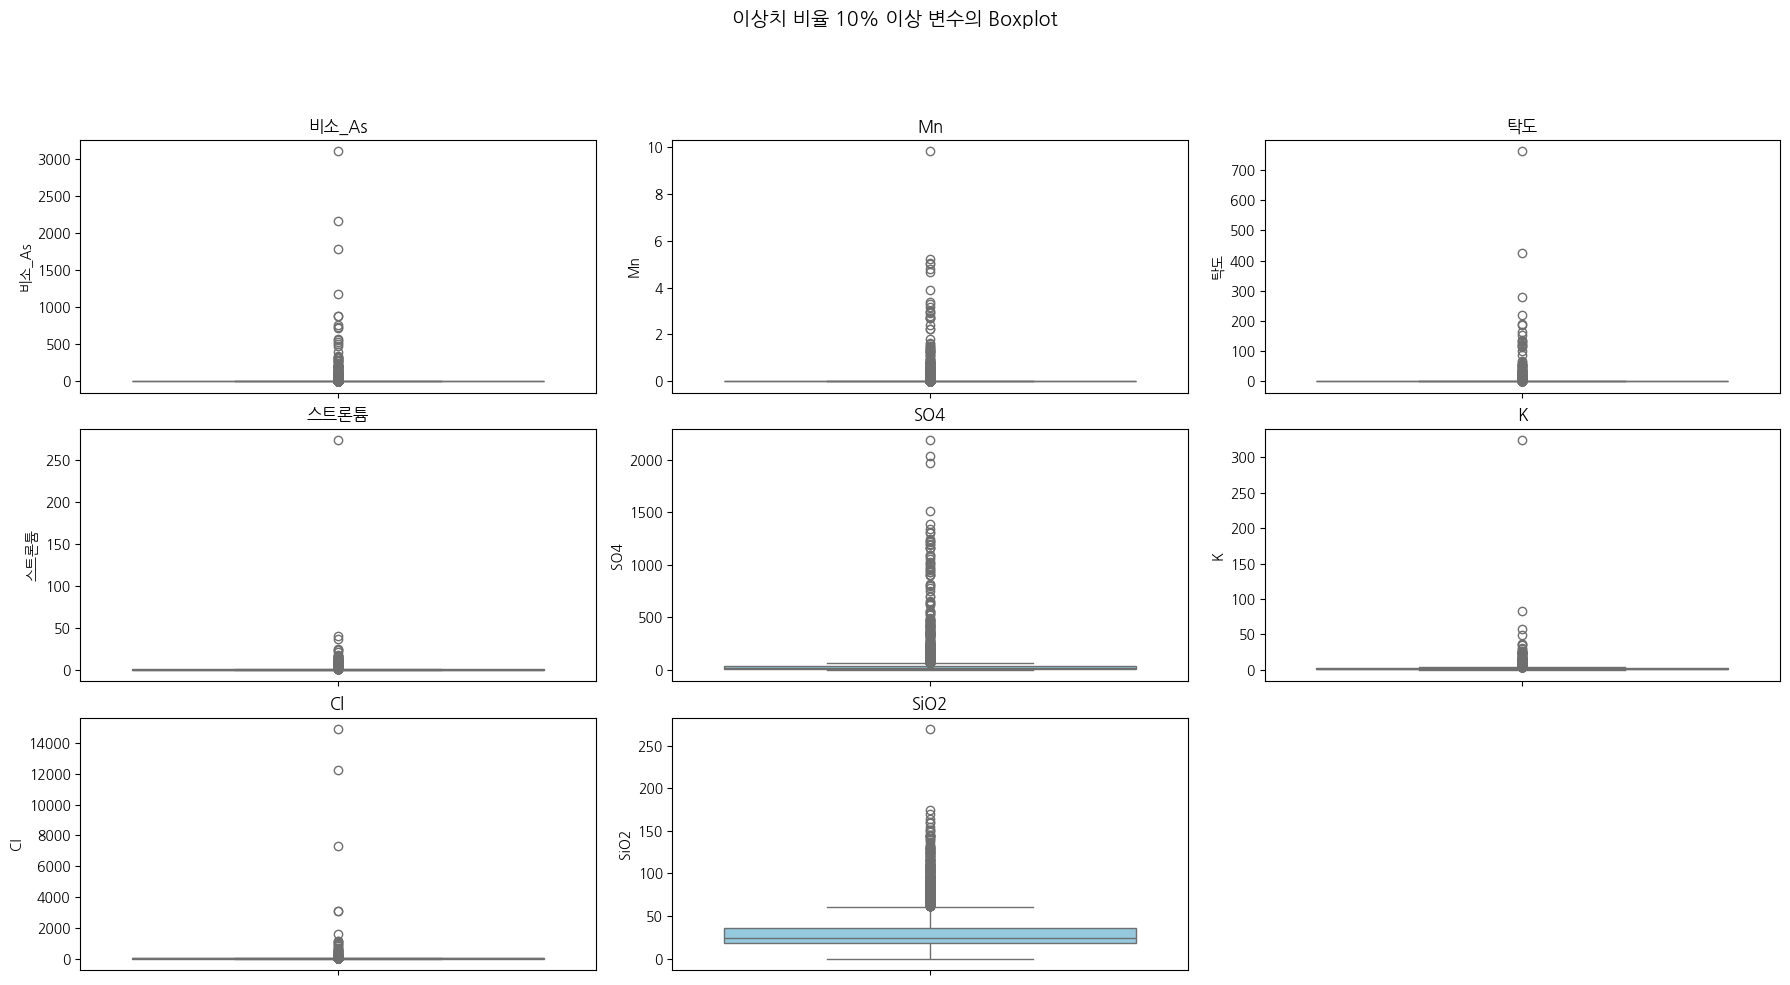

In [ ]:
# 이상치 비율 10% 이상 변수
top_cols = outlier_df[outlier_df['이상치 비율(%)'] >= 10]['변수명'].tolist()

# Boxplot 시각화
plt.figure(figsize=(18, 10))
for i, col in enumerate(top_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_filtered_gyeongnam[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("이상치 비율 10% 이상 변수의 Boxplot", fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()

<이상치 10% 이상인 물질리스트>
- 비소_As
- Mn
- 탁도
- 스트론튬
- SO4
- K
- Cl
- SiO2

### 모델링

In [ ]:
def calculate_label(row):
    scores = [
        get_pH_score(row['pH']),
        get_DO_score(row['DO']),
        get_TDS_score(row['TDS']),
        get_EC_score(row['EC']),
        get_Temp_score(row['Temp'])
    ]
    avg_score = np.mean(scores)
    if avg_score <= 0.5:
        return 0
    elif avg_score <= 1.5:
        return 1
    else:
        return 2

In [ ]:
def preprocess_and_label(df):
    df = df.copy()

    # 기준 5개 변수
    columns_to_check = ['pH', 'DO', 'TDS', 'EC', 'Temp']

    # 모든 값이 NaN인 행 제거
    df = df.dropna(subset=columns_to_check, how='all')

    # 각 열의 평균으로 NaN 대체
    for col in columns_to_check:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mean())

    # 수질 등급 계산
    df['수질등급'] = df.apply(calculate_label, axis=1)

    return df

In [ ]:
df_filtered_gyeongnam = preprocess_and_label(df_filtered_gyeongnam)
df_filtered_gyeongnam.head()

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역,수질등급
0,2020.0,경상남도,진주시,문산읍,남강,f,16.235,7.25,364.5,3.945,...,False,False,False,False,False,False,False,False,False,0
1,2020.0,경상남도,진주시,문산읍,남강,f,17.490,7.98,1681.0,6.230,...,False,False,False,False,False,False,False,False,False,1
2,2020.0,경상남도,진주시,문산읍,남강,f,15.080,8.12,434.0,4.860,...,False,False,False,False,False,False,False,False,False,0
3,2020.0,경상남도,진주시,문산읍,남강,f,15.180,7.68,624.0,4.740,...,False,False,False,False,False,False,False,False,False,1
4,2020.0,경상남도,진주시,문산읍,남강,f,16.235,7.25,364.5,3.945,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

# 남길 변수 목록
basic_numeric_vars = ['연도', 'Temp', 'pH', 'EC', 'DO', 'TDS']
selected_substance_vars = ['비소_As', 'Mn', '탁도', '스트론튬', 'SO4', 'Cl', 'K', 'SiO2']

# 전체 수치형 변수
numeric_cols = df_filtered_gyeongnam.select_dtypes(include='number').columns.tolist()

# 최종 선택 변수: 기본 변수 + 선택한 물질 변수 중 실제 있는 컬럼만
final_vars = basic_numeric_vars + selected_substance_vars

# X, y 설정
X = df_filtered_gyeongnam[final_vars]
y = df_filtered_gyeongnam['수질등급']


# 모델 선언
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42)
lgbm_clf = lgb.LGBMClassifier(verbose=-1, random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

voting = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('gbc', gbc)],
    voting='soft'
)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ('RandomForest', rf),
    ('LogisticRegression', lr),
    ('KNN', knn),
    ('XGBoost', xgb_clf),
    ('LightGBM', lgbm_clf),
    ('GradientBoosting', gbc),
    ('SoftVoting', voting)
]

results = []

for name, model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc))

results.sort(key=lambda x: x[1], reverse=True)

print("모델 정확도 높은 순:")
for name, acc in results:
    print(f"{name}: {acc:.4f}")

모델 정확도 높은 순:
GradientBoosting: 0.9859
XGBoost: 0.9799
SoftVoting: 0.9799
LightGBM: 0.9759
RandomForest: 0.9719
KNN: 0.8594
LogisticRegression: 0.8474


- 정확도 상위 3개의 모델에 대해 하이퍼파라미터 튜닝

#### GradientBoosting

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# GridSearchCV 객체 생성
grid_gbc = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 학습
grid_gbc.fit(X_train, y_train)

# 결과 출력
print("Best Parameters:", grid_gbc.best_params_)
print("Best CV Accuracy:", grid_gbc.best_score_)

# 테스트 세트 정확도
best_gbc = grid_gbc.best_estimator_
test_acc = accuracy_score(y_test, best_gbc.predict(X_test))
print("Test Accuracy with Best Estimator:", test_acc)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Best CV Accuracy: 0.9919660961448848
Test Accuracy with Best Estimator: 0.9879518072289156


#### XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 선언
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42)

# 튜닝할 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# GridSearchCV 객체 생성 (5-폴드 교차검증)
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# 학습 및 튜닝
grid_search.fit(X_train, y_train)

# 최적 파라미터 및 최고 점수 출력
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# 최적 모델로 테스트셋 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Estimator:", test_acc)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best CV Accuracy: 0.991962317854939
Test Accuracy with Best Estimator: 0.9799196787148594


#### SoftVoting

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 개별 모델 선언
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

# Soft Voting 모델 선언
voting = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('gbc', gbc)],
    voting='soft'
)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10],
    'lr__C': [0.1, 1.0],
    'gbc__n_estimators': [100, 200],
    'gbc__learning_rate': [0.05, 0.1]
}

# GridSearchCV 실행
grid_search = GridSearchCV(
    estimator=voting,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 결과 출력
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# 테스트 정확도 평가
best_soft = grid_search.best_estimator_
y_pred = best_soft.predict(X_test)
print("Test Accuracy with Best Estimator:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'gbc__learning_rate': 0.1, 'gbc__n_estimators': 200, 'lr__C': 1.0, 'rf__max_depth': None, 'rf__n_estimators': 100}
Best CV Accuracy: 0.9909598115892747
Test Accuracy with Best Estimator: 0.9819277108433735


#### 피처 중요도 확인

- Gradient Boosting의 성능이 가장 좋으므로 해당 피처 중요도를 확인

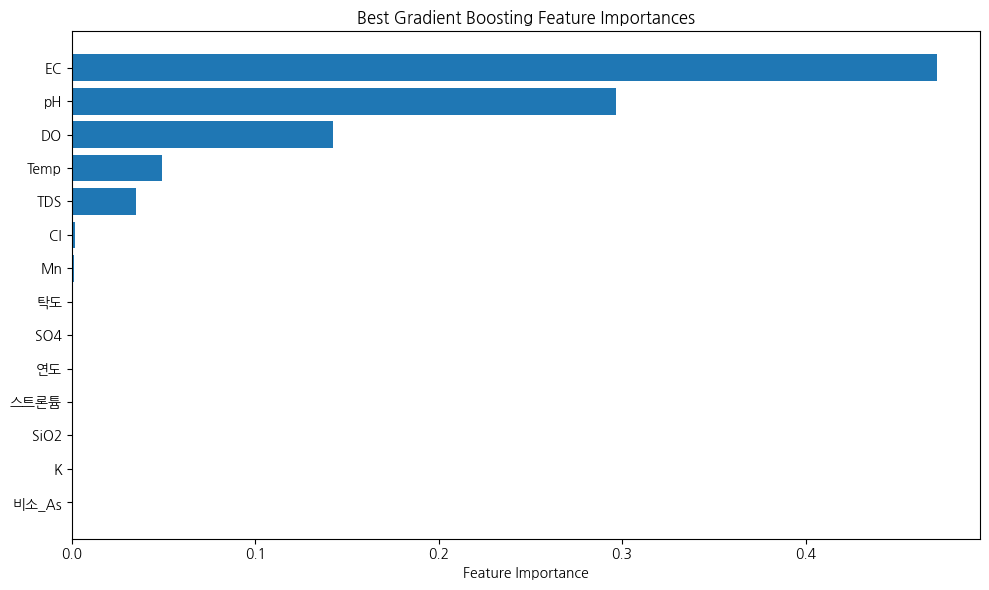

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 중요도 추출 및 정렬
importances = best_gbc.feature_importances_
features = np.array(X.columns)

sorted_idx = np.argsort(importances)[::-1]
sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("Best Gradient Boosting Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### [해석]

1. 상위 주요 변수: EC, pH, DO, Temp, TDS

해석:

- 경상남도는 해안선이 길고 농경지 및 공업지역이 많아, 염분 및 산업폐수 유입 가능성이 높음, 해수면 상승과 염해의 영향으로 EC가 높아질 수 있음
- 산성비, 산업단지 인근 폐수 등으로 인한 pH 변동
- 농경지에서 배출되는 오염수의 영향으로 DO 감소가 우려됨, 남강 등 주요 하천에서 수질 개선이 필요함
- 계절별 온도 변화가 크고 공업지역 온배출로 수온 상승
- 농업용수 및 공업용수 영향으로 TDS가 높아질 수 있어 지하수 및 하천 오염이 우려됨

2. 중간 주요 변수: Cl, Mn, 탁도, SO4, 연도

해석:

- 해안 인접 지역 해수 침입 및 농경지 염류 침투의 영향을 받음, 농작물 피해 및 수질 악화가 우려됨
- Mn은 지하수에서 자연적으로 용출되지만, 농도가 과다하면 수질 및 건강에 영향을 끼침
- 경남은 강수량이 많아 홍수 발생 시 토사 유입 가능성이 높음
- 산업단지 폐수 및 화석연료 연소 부산물에서 SO4가 유입될 수 있음

3. 하위 주요 변수: 스트론튬, SiO2, K, 비소_As

해석:

- 전체적으로 수질에 미치는 영향이 매우 적음
- 스트론튬은 경남 화강암 지질 일부 지역 지하수에 미미하게 존재
- SiO2는 자연 지질 침출물로 경남 토양과 지질 특성이 반영됨, 그러나 수질에는 적은 영향
- K는 농업용 비료 성분으로 사용됨
- 비소_As는 경남 일부 산업단지 및 광산 주변에 대한 모니터링이 필요하지만 일반적으로 낮은 농도 유지



### [정책 제안]

1. 배경 및 필요성

경상남도는 농경지와 하천이 밀접하게 연결되어 있어 농업활동에서 발생하는 오염 물질이 수질에 직접적인 영향을 미친다. EC는 수질 내 염류 농도의 핵심 지표이나, 현재 토양 EC 측정 데이터가 부족하여 효율적인 관리에 한계가 있다. 또한, pH의 급격한 변동은 수생태계에 부정적 영향을 미치므로, 하천으로 유입되는 산성/알칼리성 물질을 완충하는 관리 체계를 구축할 필요가 있다.

2. 정책 제안:

2-1. 농경지 토양 EC 상시 모니터링 시스템 구축

- 목표: 농경지 토양 내 EC 값을 실시간으로 모니터링하여, 농업 활동이 수질 EC에 미치는 영향을 분석하고, 체계적인 수질 관리 정책 수립
- 내용: 농경지에 EC 센서를 설치하고, 수집된 EC 데이터와 수질 EC 데이터를 통합 분석하여 상관관계 도출
- 추진 방안: 지자체 및 농업 기관과 협력하여 데이터 공유 플랫폼 구축

2-2. pH 리셋존 구축 사업

- 목표: 농경지에서 배출되는 산성/알칼리성 물질이 하천으로 유입되기 전에 자연 기반 완충구역을 통해 pH를 적정 수준으로 조정하여 수질 안정화 및 생태계 보호를 실현
- 내용: 하천 인접 농경지 경계에 식생대, 완충 자갈층 등으로 구성된 ‘pH 리셋존’ 조성
- 추진 방안: 지속적인 pH 모니터링과 생태계 변화 관찰

3. 기대 효과

- 농경지 토양 EC 및 하천 EC 간 상관관계 분석을 통해 오염원 관리의 과학적 근거 확보
- 농업활동에 따른 수질 변화 원인 규명 및 맞춤형 비료 사용 및 배수 관리 정책 수립 가능
- pH 리셋존을 통한 자연 기반 완충 효과로 하천 수질 안정화 및 수생태계 건강 증진

# **제주도**

In [ ]:
sido_dfs['제주도']
# csv로 저장
sido_dfs['제주도'].to_csv('제주도.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_jeju = pd.read_csv('제주도.csv')
df_jeju.head()

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Temp,pH,EC,DO,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2018.0,제주도,제주도,-,제주서해,b,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2018.0,제주도,제주도,-,제주동해,b,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,2018.0,제주도,제주도,-,제주동해,b,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,2018.0,제주도,제주도,-,제주동해,b,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,2018.0,제주도,제주도,-,제주동해,b,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


null 값 상위 30% 칼럼 모두 제외

In [ ]:
numeric_df2 = df_jeju.select_dtypes(include=['number'])

# 전체 행 수 기준으로 30% 이상 결측치가 있는 컬럼 찾기
threshold2 = len(df_jeju) * 0.3

# 수치형 컬럼 중 결측치 수가 30% 이상인 컬럼 이름 추출
cols_to_drop2 = numeric_df2.columns[numeric_df2.isnull().sum() >= threshold2]

# 원본 df_jeju에서 해당 컬럼 제거
df_filtered_jeju = df_jeju.drop(columns=cols_to_drop2)

30% 제외한 컬럼에서 수치형 변수의 null 값은 중앙값으로 대체

In [ ]:
# 수치형 컬럼만 선택
numeric_cols2 = df_filtered_jeju.select_dtypes(include=['number']).columns

# 수치형 컬럼의 null 값을 해당 컬럼의 중앙값으로 대체
df_filtered_jeju[numeric_cols2] = df_filtered_jeju[numeric_cols2].fillna(df_filtered_jeju[numeric_cols2].median())

df_filtered_jeju.head()

,연도,시도,시군구,읍면동,MW_NAME,수문지질_상세,Ca,Mg,Na,K,...,구분_철원지역,구분_청송지역,구분_청양지역,구분_통영거제지역,구분_하동지역,구분_함안지역,구분_함평지역,구분_합천지역,구분_화순지역,구분_화천지역
0,2018.0,제주도,제주도,-,제주서해,b,8.16,3.36,12.92,3.98,...,False,False,False,False,False,False,False,False,False,False
1,2018.0,제주도,제주도,-,제주동해,b,8.07,7.05,8.96,2.32,...,False,False,False,False,False,False,False,False,False,False
2,2018.0,제주도,제주도,-,제주동해,b,5.36,3.66,6.22,1.77,...,False,False,False,False,False,False,False,False,False,False
3,2018.0,제주도,제주도,-,제주동해,b,4.69,3.23,5.36,1.58,...,False,False,False,False,False,False,False,False,False,False
4,2018.0,제주도,제주도,-,제주동해,b,4.36,3.12,5.98,1.83,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# csv로 저장
df_filtered_jeju.to_csv('df_filtered_jeju.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_filtered_jeju.describe()

,연도,Ca,Mg,Na,K,HCO3,Cl,SO4,NO3,F,...,사염화탄소,과망간산칼륨소비량,벤젠_Benzene,테트라클로로에틸렌,1_2_디브로모_3_클로로프로판,스트론튬,인산염인,아질산이온,브롬,이산화질소
count,270.0,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,...,270.0,270.000000,270.0,270.0,270.0,270.000000,270.000000,270.000000,270.000000,270.0
mean,2018.0,12.235296,12.021630,39.701481,4.332037,59.988889,63.514444,9.477778,13.653152,0.005815,...,0.0,1.234815,0.0,0.0,0.0,0.005256,0.001111,0.008148,0.372630,0.0
std,0.0,24.802904,43.003546,236.713391,9.425189,23.654492,445.386418,53.241449,23.346260,0.034283,...,0.0,1.808255,0.0,0.0,0.0,0.010150,0.010502,0.082752,2.179146,0.0
min,2018.0,2.410000,1.690000,3.650000,0.930000,1.200000,2.500000,0.000000,0.026000,0.000000,...,0.0,0.900000,0.0,0.0,0.0,0.001000,0.000000,0.000000,0.000000,0.0
25%,2018.0,5.907500,4.155000,7.670000,2.342500,46.400000,5.400000,0.000000,2.460500,0.000000,...,0.0,0.900000,0.0,0.0,0.0,0.002000,0.000000,0.000000,0.040000,0.0
50%,2018.0,7.480000,5.755000,10.010000,3.020000,56.100000,7.300000,2.000000,6.319500,0.000000,...,0.0,0.900000,0.0,0.0,0.0,0.003000,0.000000,0.000000,0.060000,0.0
75%,2018.0,10.287500,8.330000,16.550000,4.020000,68.825000,15.300000,5.000000,13.363000,0.000000,...,0.0,1.200000,0.0,0.0,0.0,0.005000,0.000000,0.000000,0.120000,0.0
max,2018.0,296.720000,574.960000,3384.860000,135.670000,198.900000,6249.100000,727.000000,203.063000,0.290000,...,0.0,26.300000,0.0,0.0,0.0,0.126000,0.100000,1.200000,25.690000,0.0


### 이상치

In [ ]:
# 전체 수치형 변수에서 이상치 탐지
numeric_cols2 = df_filtered_jeju.select_dtypes(include='number').columns

outlier_summary = []

for col in numeric_cols2:
    outliers, lower, upper = detect_outliers_iqr(df_filtered_jeju, col)
    outlier_count = len(outliers)
    total_count = df_filtered_jeju[col].count()
    outlier_ratio = outlier_count / total_count if total_count != 0 else 0
    outlier_summary.append({
        '변수명10': col,
        '전체값 개수': total_count,
        '이상치 개수': outlier_count,
        '이상치 비율(%)': round(outlier_ratio * 100, 2)
    })

# DataFrame으로 정리
outlier_df2 = pd.DataFrame(outlier_summary).sort_values(by='이상치 비율(%)', ascending=False)
outlier_df2.head(20)

,변수명10,전체값 개수,이상치 개수,이상치 비율(%)
26,암모니아성질소_NH3_N,270,49,18.15
29,톨루엔_Toluene,270,48,17.78
1,Ca,270,32,11.85
2,Mg,270,29,10.74
3,Na,270,29,10.74
8,NO3,270,28,10.37
15,NO3_N,270,28,10.37
54,브롬,270,27,10.00
43,아연_Zn,270,27,10.00
13,CO3,270,26,9.63


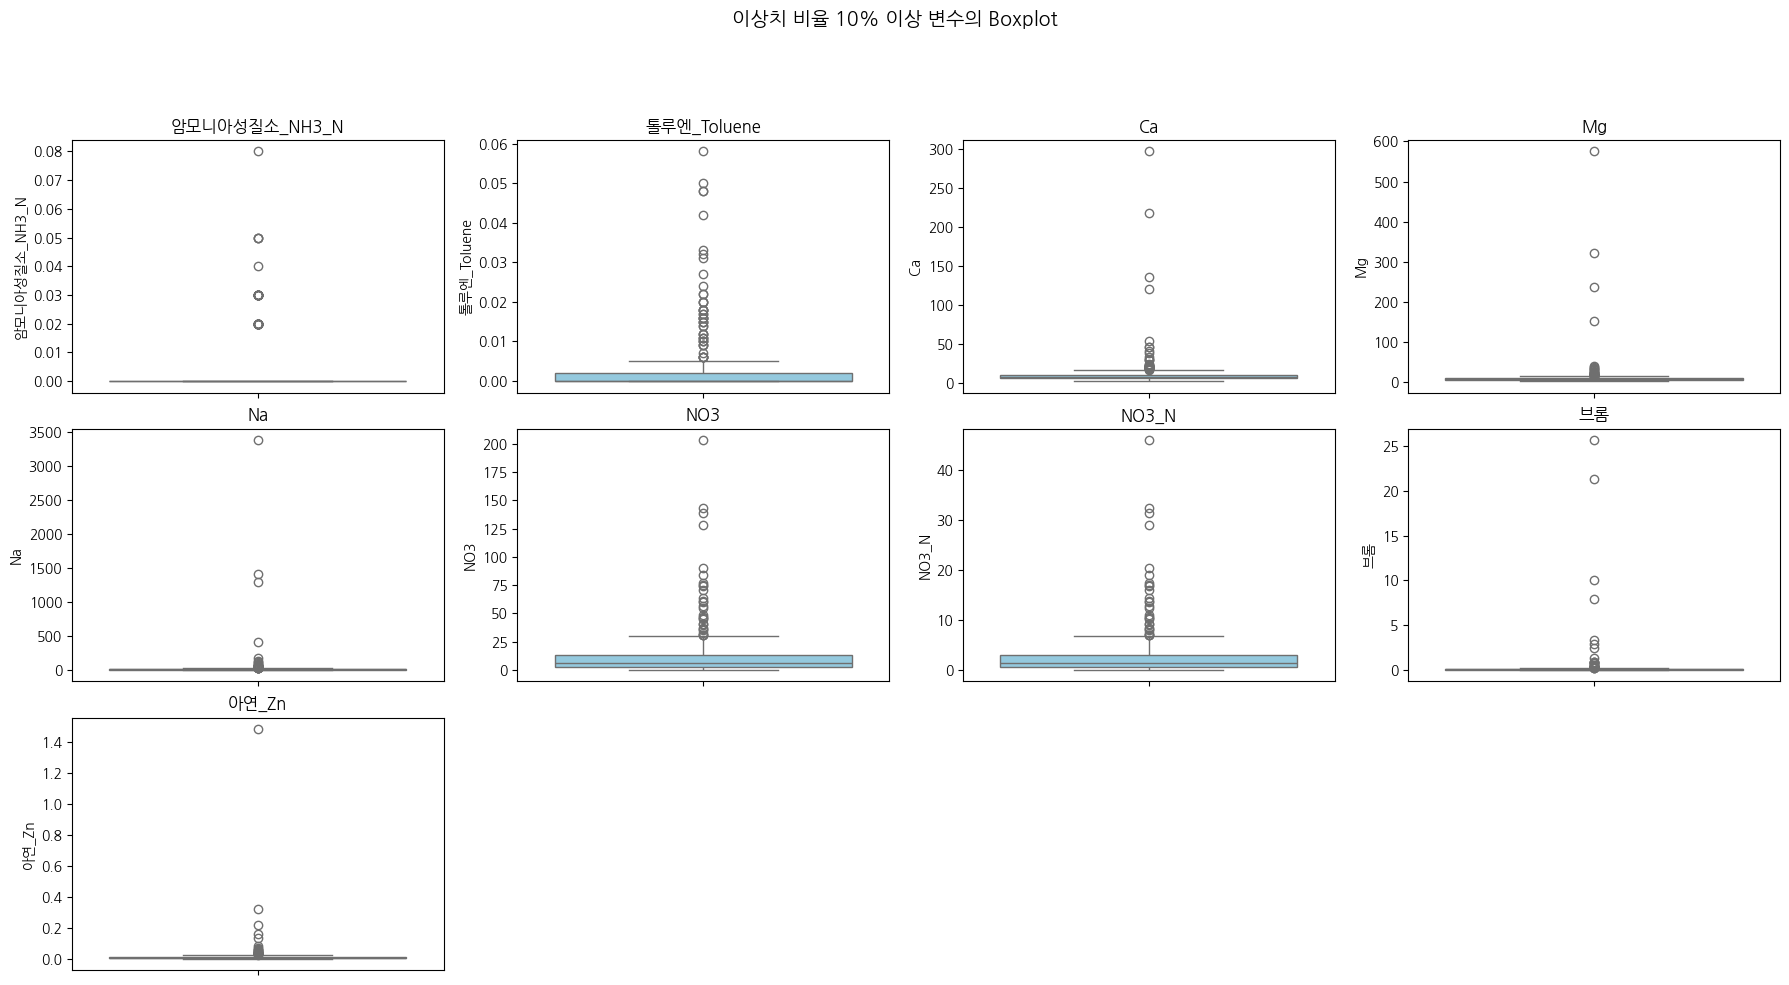

In [ ]:
# 이상치 비율 10% 이상 변수
top_cols2 = outlier_df2[outlier_df2['이상치 비율(%)'] >= 10]['변수명10'].tolist()

# Boxplot 시각화
plt.figure(figsize=(18, 10))
for i, col in enumerate(top_cols2, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_filtered_jeju[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("이상치 비율 10% 이상 변수의 Boxplot", fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()

<이상치 10% 이상인 물질리스트>
- 암모니아성질소_NH3_N
- 톨루엔_Toluene
- Ca
- Mg
- Na
- NO3
- NO3_N
- 브롬
- 아연_Zn

### 모델링

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import numpy as np

# 타겟 변수 리스트
target_cols = ['암모니아성질소_NH3_N', '톨루엔_Toluene', 'Ca', 'Na', 'Mg', 'NO3_N', 'NO3', '아연_Zn', '브롬']

# X, y 분리
X = df_filtered_jeju.select_dtypes(include='number').drop(columns=target_cols)
y = df_filtered_jeju[target_cols]

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
models = {
    "DecisionTree": MultiOutputRegressor(DecisionTreeRegressor(random_state=42)),
    "RandomForest": MultiOutputRegressor(RandomForestRegressor(random_state=42)),
    "GradientBoosting": MultiOutputRegressor(GradientBoostingRegressor(random_state=42)),
    "XGBoost": MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', random_state=42)),
    "LightGBM": MultiOutputRegressor(lgb.LGBMRegressor(random_state=42)),
}

# 개별 모델 학습 및 평가 결과 저장용
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmses = []
    r2s = []
    for i, col in enumerate(target_cols):
        rmse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
        r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
        rmses.append(rmse)
        r2s.append(r2)
    results[name] = {"RMSE_mean": np.mean(rmses), "R2_mean": np.mean(r2s)}

# Voting Regressor 생성 (개별 모델들을 모아서 앙상블)
voting = VotingRegressor([
    ('dt', models["DecisionTree"].estimator),
    ('rf', models["RandomForest"].estimator),
    ('xgb', models["XGBoost"].estimator)
])

voting_multi = MultiOutputRegressor(voting)
voting_multi.fit(X_train, y_train)
y_pred_voting = voting_multi.predict(X_test)

rmses_voting = []
r2s_voting = []
for i, col in enumerate(target_cols):
    rmse = mean_squared_error(y_test.iloc[:, i], y_pred_voting[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred_voting[:, i])
    rmses_voting.append(rmse)
    r2s_voting.append(r2)
results["VotingRegressor"] = {"RMSE_mean": np.mean(rmses_voting), "R2_mean": np.mean(r2s_voting)}

# RMSE 오름차순 정렬 후 출력
print("\n=== 모델별 평균 점수 (RMSE 오름차순) ===")
for model_name, scores in sorted(results.items(), key=lambda x: x[1]['RMSE_mean']):
    print(f"{model_name} - 평균 RMSE: {scores['RMSE_mean']:.4f}, 평균 R2: {scores['R2_mean']:.4f}")



=== 모델별 평균 점수 (RMSE 오름차순) ===
XGBoost - 평균 RMSE: 10.2788, 평균 R2: -2.4121
GradientBoosting - 평균 RMSE: 10.6117, 평균 R2: -0.2854
VotingRegressor - 평균 RMSE: 17.0760, 평균 R2: -1.2549
DecisionTree - 평균 RMSE: 22.4171, 평균 R2: -4.4690
RandomForest - 평균 RMSE: 37.5919, 평균 R2: -0.0167
LightGBM - 평균 RMSE: 1133.1128, 평균 R2: -4.9626


- RMSE와 R2 score를 종합적으로 고려했을 때, Gradient Boosting/XGBoost/Random Forest 순으로 성능이 좋다고 판단

#### GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 하이퍼파라미터 그리드 정의
param_grid = {
    'estimator__n_estimators': [100, 200],
    'estimator__learning_rate': [0.05, 0.1, 0.2],
    'estimator__max_depth': [3, 5, 7],
    'estimator__subsample': [0.8, 1.0]
}

# 기본 모델
gbr = GradientBoostingRegressor(random_state=42)
multi_gbr = MultiOutputRegressor(gbr)

# GridSearchCV 적용
grid_search = GridSearchCV(
    estimator=multi_gbr,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# 학습
grid_search.fit(X_train, y_train)

# 예측
y_pred = grid_search.predict(X_test)

# 평가
rmses = [mean_squared_error(y_test.iloc[:, i], y_pred[:, i]) for i in range(len(target_cols))]
r2s = [r2_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(len(target_cols))]

# 출력
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"평균 RMSE: {np.mean(rmses):.4f}")
print(f"평균 R²: {np.mean(r2s):.4f}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 200, 'estimator__subsample': 0.8}
평균 RMSE: 40.5842
평균 R²: 0.0235


- 튜닝 전 성능이 더 좋음

#### XGBoost

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

# xgboost에 맞는 하이퍼파라미터 그리드
param_grid = {
    'estimator__n_estimators': [100, 200],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
    'estimator__subsample': [0.7, 0.8, 1.0],
}

# 기본 XGBRegressor 모델
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# MultiOutputRegressor wrapping
multi_xgb = MultiOutputRegressor(xgb_reg)

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=multi_xgb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# 학습
grid_search.fit(X_train, y_train)

# 예측
y_pred = grid_search.predict(X_test)

# 평가
rmses = [mean_squared_error(y_test.iloc[:, i], y_pred[:, i]) for i in range(len(target_cols))]
r2s = [r2_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(len(target_cols))]

# 결과 출력
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"평균 RMSE: {np.mean(rmses):.4f}")
print(f"평균 R²: {np.mean(r2s):.4f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits

Best Parameters: {'estimator__learning_rate': 0.05, 'estimator__max_depth': 7, 'estimator__n_estimators': 100, 'estimator__subsample': 0.7}
평균 RMSE: 11.2701
평균 R²: -2.6327


- 튜닝 전이 성능이 더 좋음

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 하이퍼파라미터 그리드 정의 (RandomForest에 맞게)
param_grid = {
    'estimator__n_estimators': [100, 200],
    'estimator__max_depth': [5, 10, None],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [2, 4],
    'estimator__max_features': ['sqrt', 'log2']
}

# 기본 모델
rf = RandomForestRegressor(random_state=42)
multi_rf = MultiOutputRegressor(rf)

# GridSearchCV 적용
grid_search_rf = GridSearchCV(
    estimator=multi_rf,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# 학습
grid_search_rf.fit(X_train, y_train)

# 예측
y_pred_rf = grid_search_rf.predict(X_test)

# 평가
rmses = [mean_squared_error(y_test.iloc[:, i], y_pred_rf[:, i]) for i in range(len(target_cols))]
r2s = [r2_score(y_test.iloc[:, i], y_pred_rf[:, i]) for i in range(len(target_cols))]

# 출력
print(f"\nBest Parameters for RandomForest: {grid_search_rf.best_params_}")
print(f"평균 RMSE: {np.mean(rmses):.4f}")
print(f"평균 R²: {np.mean(r2s):.4f}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits

Best Parameters for RandomForest: {'estimator__max_depth': 10, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 100}
평균 RMSE: 24.7701
평균 R²: 0.3429


#### 피처 중요도 확인

- Gradient Boosting의 성능이 가장 좋으므로 해당 피처 중요도를 확인

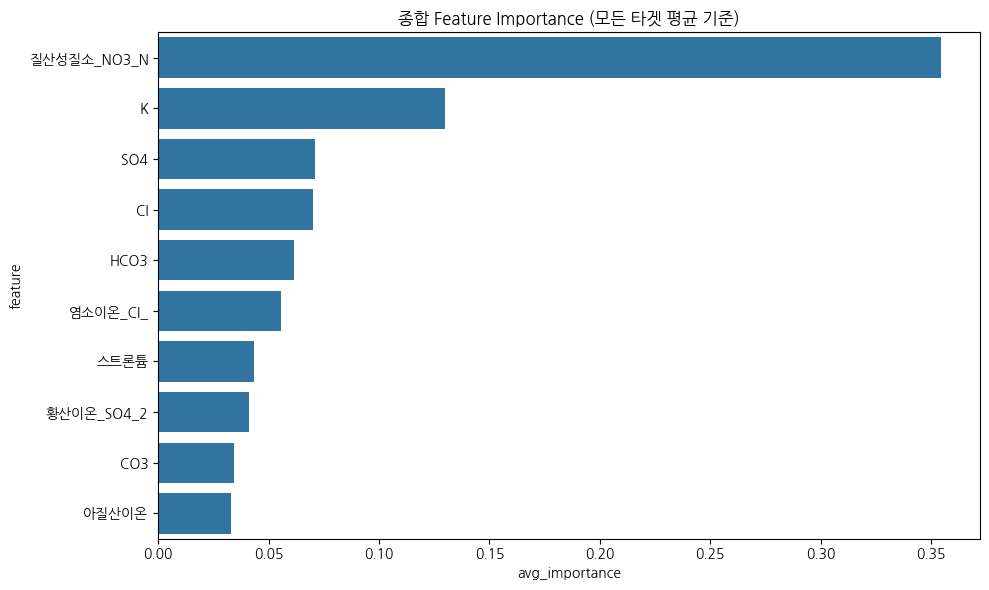

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

multi_gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
multi_gbr.fit(X_train, y_train)

# 모든 타겟에 대해 feature importance 평균내기
importances_all = []

for model in multi_gbr.estimators_:
    importances_all.append(model.feature_importances_)

# 평균 중요도 계산
avg_importance = np.mean(importances_all, axis=0)

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'avg_importance': avg_importance
}).sort_values(by='avg_importance', ascending=False)

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='avg_importance', y='feature')
plt.title("종합 Feature Importance (모든 타겟 평균 기준)")
plt.tight_layout()
plt.show()

### [해석]

1. 상위 주요 변수: 질산성질소_NO3_N, K, SO4, Cl

해석:

- 질산성질소는 주로 질소 비료 또는 축산 분뇨에서 유래하는데, 제주도는 화산암 지층으로 인해 지표 오염원이 지하수로 빠르게 침투하기 때문에 질산성질소 농도가 급증할 위험이 있음
- 밭농사 중심 농업으로 인해 칼륨 비료 사용량이 많음, 칼륨 과다 시 수질로 쉽게 이동
- 황산염은 토양에서 잘 용해되어 지하수로 유입될 가능성이 높음
- 축산 분뇨에 염소이온이 다량 포함되어 있기 때문에 Cl이 오염원으로 작용할 수 있음

2. 중간 주요 변수: HCO3, 염소이온_Cl_, 스트론튬

해석:

- 용암 기반의 탄산염 풍화 작용으로 인해 일부 HCO3 유입 가능
- 스트론튬은 제주도의 화산암 또는 퇴적암 기반 지층에서 자연 용출

3. 하위 주요 변수: 황산이온_SO4_2, CO3, 아질산이온

해석:

- 제주도는 대기의 영향으로 황산 이온 유입 가능성이 존재함, 그러나 영향은 상대적으로 미미
- CO3는 물의 pH 및 알칼리도 관련 이온으로 주로 HCO3와 함께 작용
- 아질산이온은 수질 오염 초기 징후로는 사용되나, 금방 NO3-로 전환되므로 지속적 농도가 낮음



### [정책 제안]

1. 배경 및 필요성

제주도는 화산암 기반 다공성 토양으로 구성되어 있어, 양분의 빠른 유실이 발생하기 쉬운 환경이다. 농경지에서 주요 양이온, 음이온 성분이 지하수로 직접 유입되며, 수질 오염의 잠재적 요인이 되고 있다. 따라서, 제주도 특성에 맞춘 토양 내 양분 보유력(보비력) 향상 정책이 필요하다.

2. 정책 제안:

2-1. 질산성질소 예측 기반 사전 경고 시스템 구축

- 목표: 농업 활동으로 인해 증가하는 질산성질소 농도를 사전에 예측하고 고위험 시점을 미리 알려줌으로써, 비료 관리 및 지하수 보호를 사전적으로 수행
- 내용: 토양, 비료량, 작물 데이터 기반 예측 모델을 구축하고 자동 경고 시스템과 모바일 알림 기능 연동
- 추진 방안: 농가 대상 교육 및 모바일 플랫폼 연동

2-2. 보비력 강화 기반 양분 손실 저감 사업

- 목표: 칼륨, 황산이온 등 주요 양분의 손실을 억제하고, 보비력을 강화하여 작물 생산성과 지하수 보호를 동시에 달성
- 내용: 제주도 토양 특성에 맞춘 점토질 보비자재를 혼입, 유기물 중심의 완충츤 조성으로 토양 내 이온 교환 능력 강화
- 추진 방안: 국립농업과학원 및 토양 전문가 협업으로 보비 자재 표준화

3. 기대 효과

- 질산성질소 오염을 사전 예측하여 미리 제어함으로써 지하수 안전성 확보
- 주요 양분의 손실 억제로 작물 생육 안정성과 비료 비용 절감
- 토양 구조 개선을 통한 보비력 강화로 지속 가능한 농업 기반 마련
- 제주도의 고유 지질 특성을 고려한 맞춤형 정책 모델 구축